# Spatial Sampling (stratified)


In [3]:
# Load relevant R packages
inLibraries = list('rgdal','sp','rgeos','GISTools')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

In [4]:
counties <- readOGR("datasets/la_censustracts",
                      "LA_counties")

census <- readOGR("datasets/la_censustracts",
                      "LA_censustracts")


OGR data source with driver: ESRI Shapefile 
Source: "datasets/la_censustracts", layer: "LA_counties"
with 64 features
It has 22 fields
Integer64 fields read as strings:  OBJECTID TOTPOP00 FAMPOP00 RURALFARM FAMHH00 MALES00 FEMALES00 WHITE00 BLACK00 POP2000 HOUSEHOLDS HSE_UNITS BUS_COUNT 
OGR data source with driver: ESRI Shapefile 
Source: "datasets/la_censustracts", layer: "LA_censustracts"
with 1140 features
It has 50 fields
Integer64 fields read as strings:  ObjectID POP2000 POP2010 WHITE BLACK AMERI_ES ASIAN HAWN_PI HISPANIC OTHER MULT_RACE MALES FEMALES AGE_UNDER5 AGE_5_9 AGE_10_14 AGE_15_19 AGE_20_24 AGE_25_34 AGE_35_44 AGE_45_54 AGE_55_64 AGE_65_74 AGE_75_84 AGE_85_UP HOUSEHOLDS HSEHLD_1_M HSEHLD_1_F MARHH_CHD MARHH_NO_C MHH_CHILD FHH_CHILD FAMILIES HSE_UNITS VACANT OWNER_OCC RENTER_OCC 


Map the parishes. The border color of the parishes should be lightgray and the fill should be white.

In [5]:
bb <- bbox(counties)

xb_min <- bb[1, 1]
yb_min <- bb[2, 1]

bb

,min,max
x,401509.3,903957.1
y,3205151.1,3653900.2


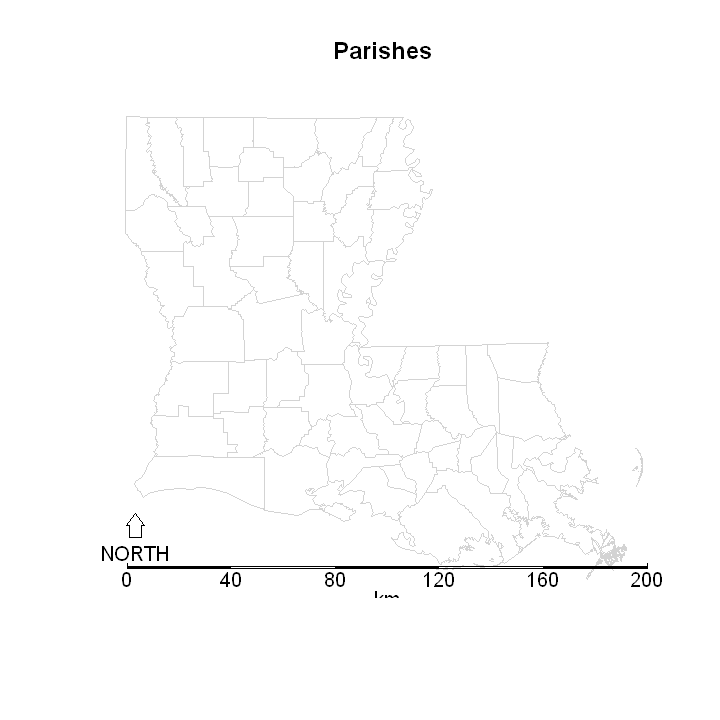

In [6]:
# parish = counties
# tracts = census


plot(counties, border = "lightgray", col = "white", main = "Parishes")

north.arrow(xb_min + 10000, yb_min + 40000, len = 6000, lab = "NORTH")

map.scale(xb_min + 255000, yb_min + 10000, len = 505000, 
          units = "km", ndiv = 5, subdiv = 40)

The spsample() function (sp library) divides an area into strata based upon breaking the area into a grid of regularly spaced/sized cells.  When only the number of samples 'n' is provided, the function computes cellsize based upon a default calculation. However, a 'cellsize' parameter can be added if desired. 

Conduct a stratified sample to obtain 200 sample points using the 'n' argument. 

Next, conduct a stratified sample using the 'cellsize' argument such that as close to 200 sample points are generated. 

Map the points obtained via specifying 'n' in green and the points obtained by specifying 'cellsize' in red.  


In [7]:
n <- 200

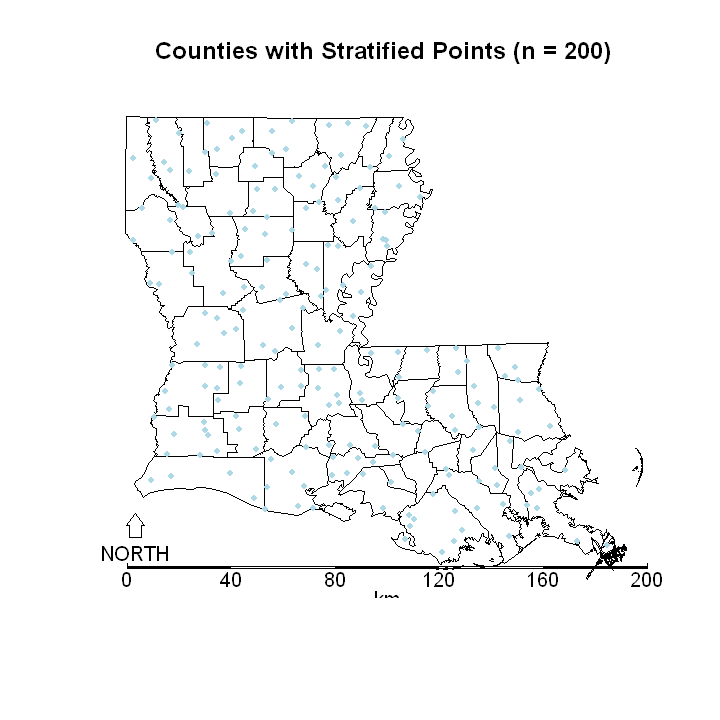

In [8]:
samp.rand <- spsample(counties, n, type = "stratified")

plot(counties, main = "Counties with Stratified Points (n = 200)")
plot(samp.rand, add = TRUE, pch = 20, col = "lightblue")

north.arrow(xb_min + 10000, yb_min + 40000, len = 6000, lab = "NORTH")

map.scale(xb_min + 255000, yb_min + 10000, len = 505000, 
          units = "km", ndiv = 5, subdiv = 40)

[1] 201

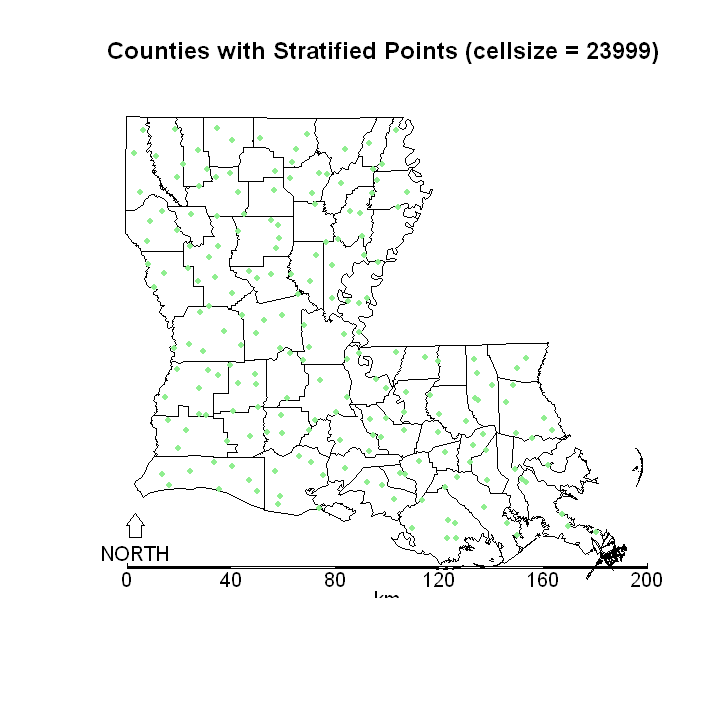

In [9]:
samp.rand.cs <- spsample(counties, type = "stratified", cellsize = 23999)
length(samp.rand.cs)

plot(counties, main = "Counties with Stratified Points (cellsize = 23999)")
plot(samp.rand.cs, add = TRUE, pch = 20, col = "lightgreen")

north.arrow(xb_min + 10000, yb_min + 40000, len = 6000, lab = "NORTH")

map.scale(xb_min + 255000, yb_min + 10000, len = 505000, 
          units = "km", ndiv = 5, subdiv = 40)

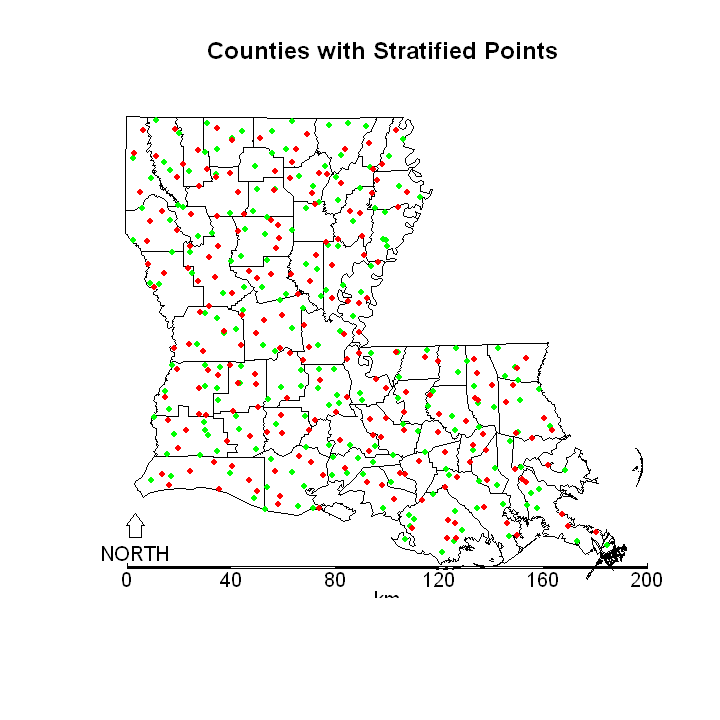

In [10]:
plot(counties, main = "Counties with Stratified Points")
plot(samp.rand, add = TRUE, col = "green", pch = 20)
plot(samp.rand.cs, add = TRUE, col = "red", pch = 20)

north.arrow(xb_min + 10000, yb_min + 40000, len = 6000, lab = "NORTH")

map.scale(xb_min + 255000, yb_min + 10000, len = 505000, 
          units = "km", ndiv = 5, subdiv = 40)

Select Iberville parish and conduct a regular stratified sample by specifying the cellsize=10000. Next, conduct a regular stratified *centric systematic* sample by specifying cellsize=10000. 

In [11]:
t(head(counties@data, 2))

,0,1
OBJECTID,1154,1155
ID,22001,22003
NAME,Acadia Parish,Allen Parish
STATE_NAME,Louisiana,Louisiana
ST_ABBREV,LA,LA
AREA,657.4433,766.0471
TOTPOP00,58861,25440
FAMPOP00,50452,18465
RURALFARM,859,337
FAMHH00,15676,5927


In [12]:
iber <- counties[counties$NAME == "Iberville Parish", ]

head(iber@data)

,OBJECTID,ID,NAME,STATE_NAME,ST_ABBREV,AREA,TOTPOP00,FAMPOP00,RURALFARM,FAMHH00,...,FEMALES00,WHITE00,BLACK00,AGGHOMEVAL,POP2000,HOUSEHOLDS,HSE_UNITS,BUS_COUNT,Genshp_Len,Genshp_Are
4,1158,22047,Iberville Parish,Louisiana,LA,652.8423,33320,26365,210,8012,...,16680,16412,16560,290565500,33320,10674,11953,953,213597.6,1689639674


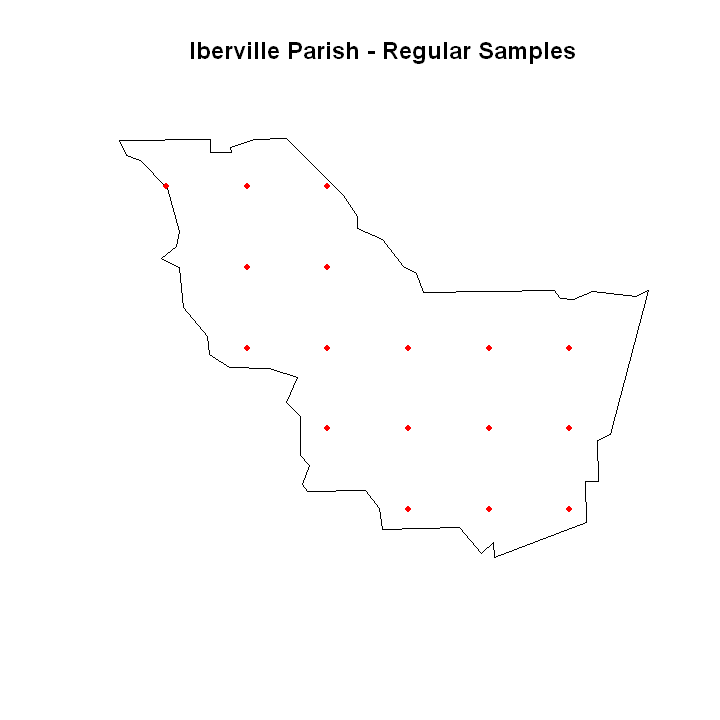

In [13]:
samp.reg <- spsample(iber, type = "regular", cellsize = 10000)

plot(iber, main = "Iberville Parish - Regular Samples")
plot(samp.reg, pch = 20, col = "red", add = TRUE)

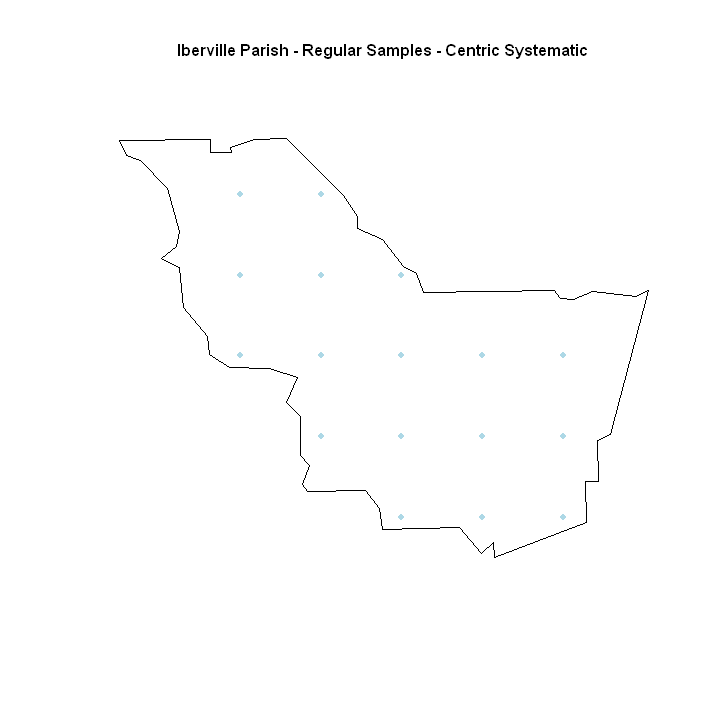

In [14]:
samp.reg.cs <- spsample(iber, type = "regular", cellsize = 10000, offset = c(0.5, 0.5))

plot(iber, 
     main = "Iberville Parish - Regular Samples - Centric Systematic", 
     cex.main = 0.8)

plot(samp.reg.cs, 
     col = "lightblue", 
     pch = 20, 
     add = TRUE)

Conduct stratified sampling using parish polygons as strata and randomly sample 5 points per strata. To do this, you'll need to iterate through parishes and randomly sample each. Be sure to map the parishes and the sampled points, as well as add a map title, a north arrow, and a scalebar.

In [15]:
getSamps <- function(id){
    
    selStrat <- counties[counties$ID == id, ]
    samp.strat <- spsample(selStrat, n = 5, type = "random", iter = 10)
    
    res <- c(selStrat, samp.strat)
    return(res)
}

In [16]:
sampStrats <- lapply(counties@data$ID, FUN = getSamps)

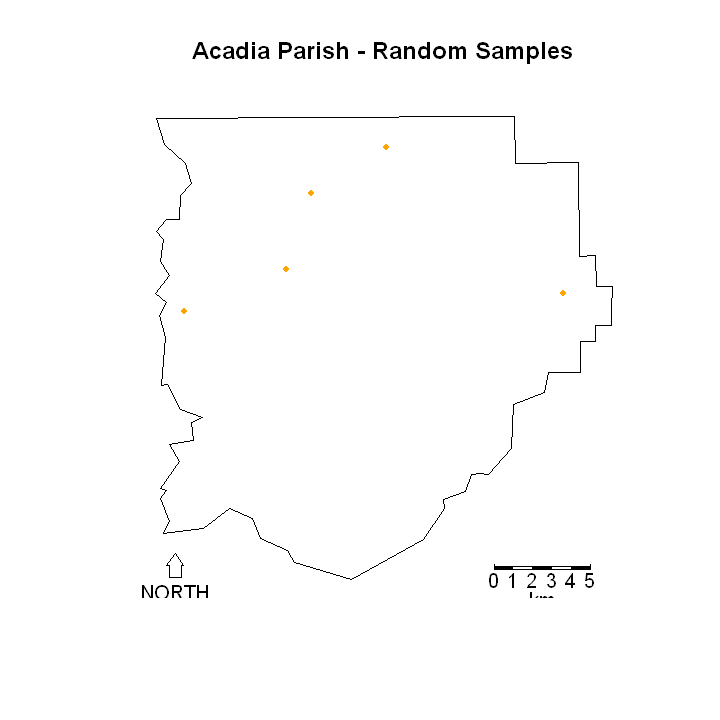

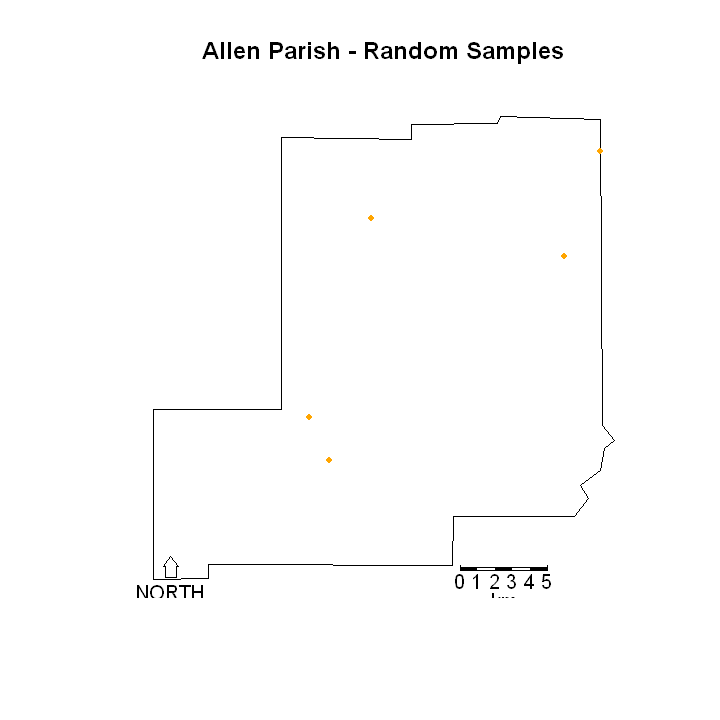

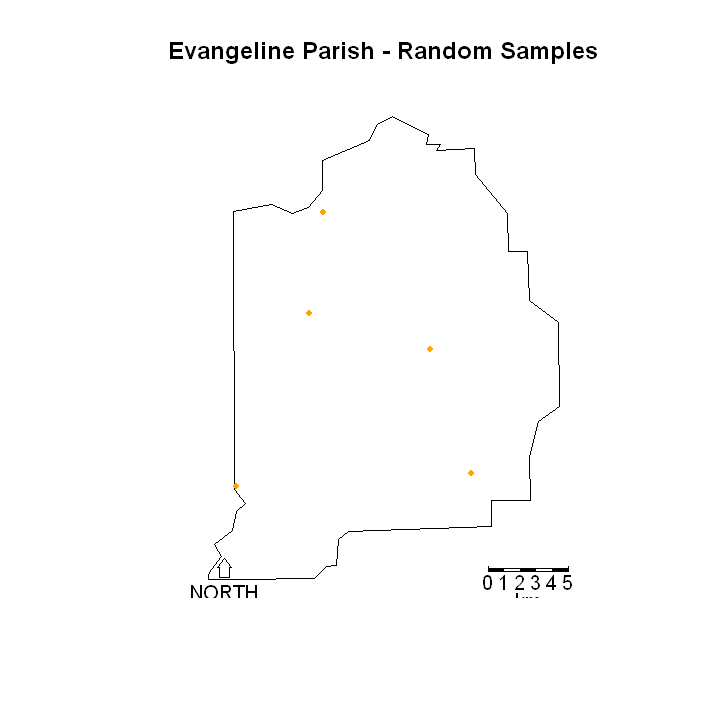

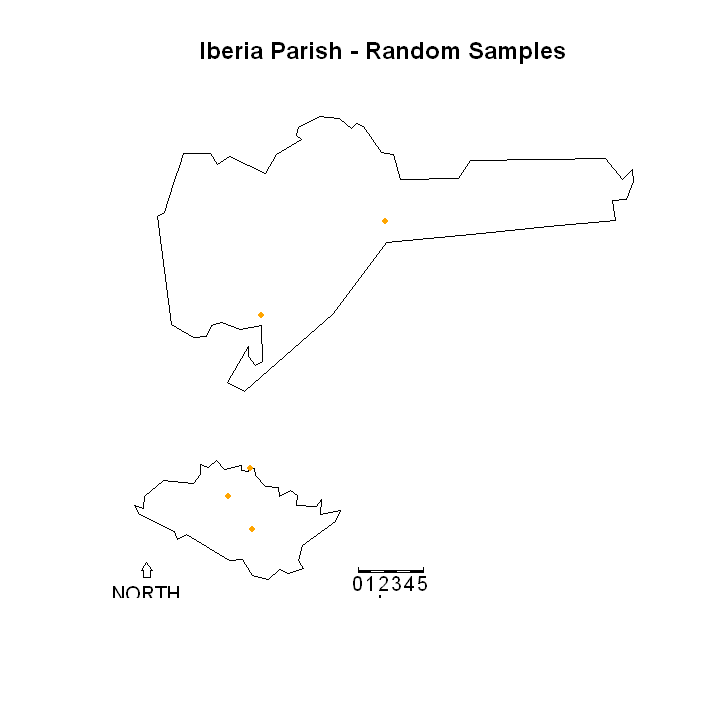

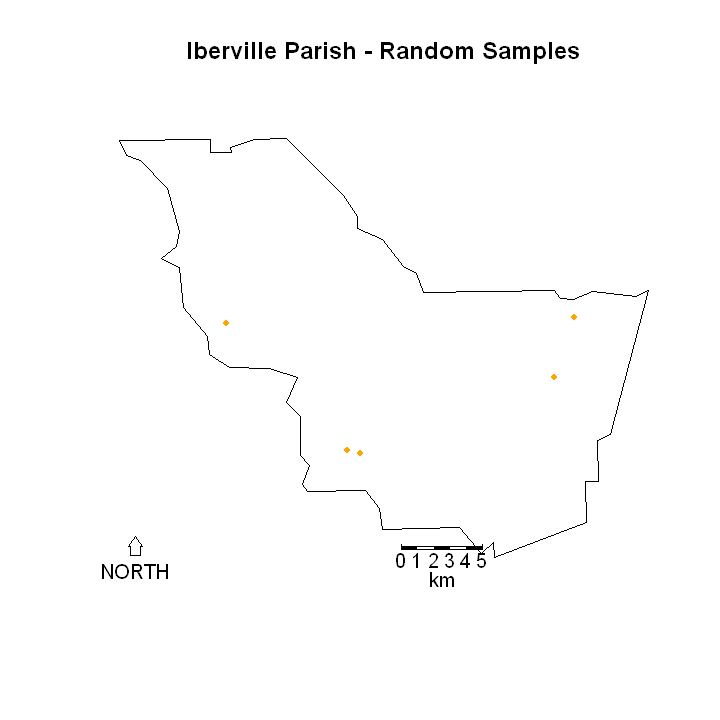

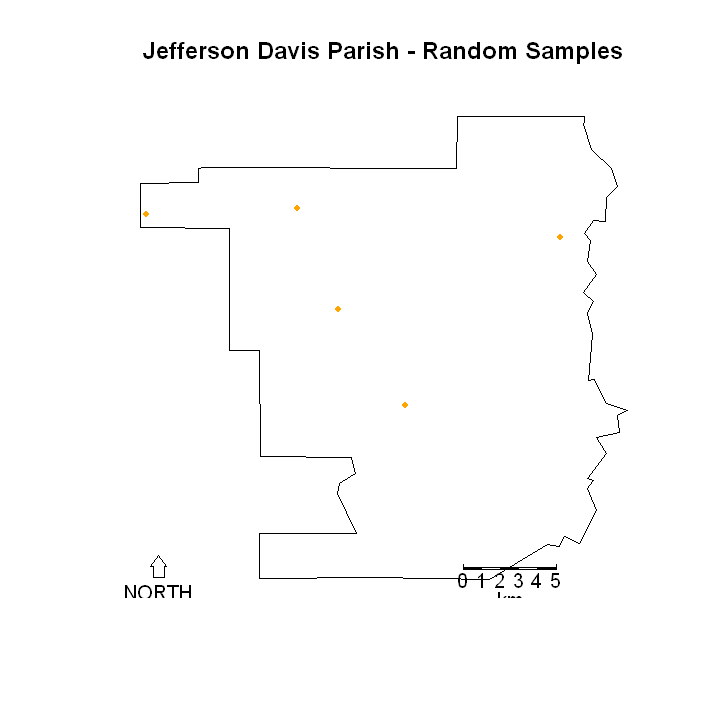

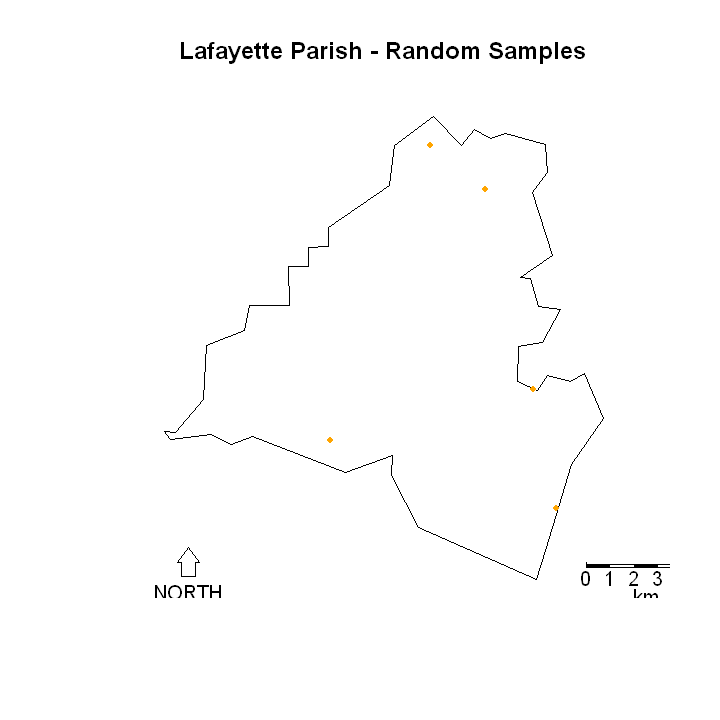

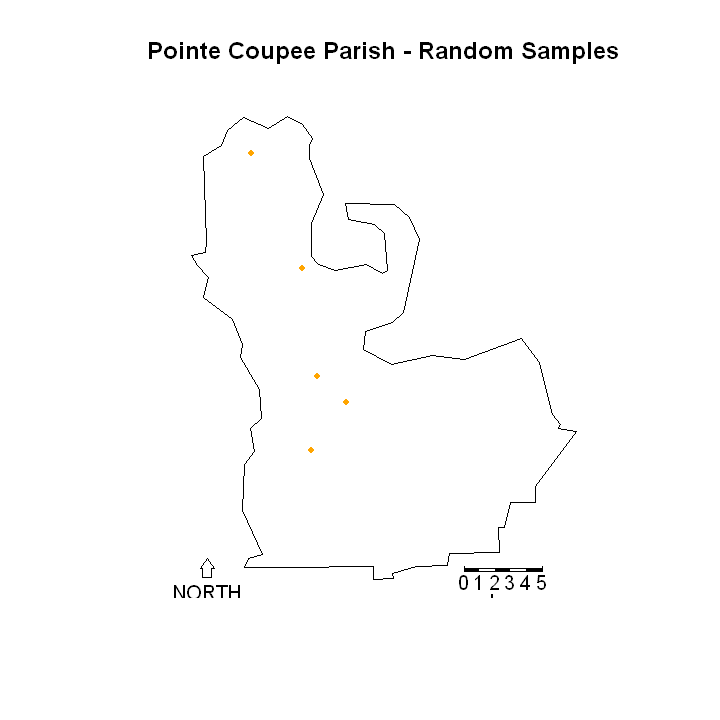

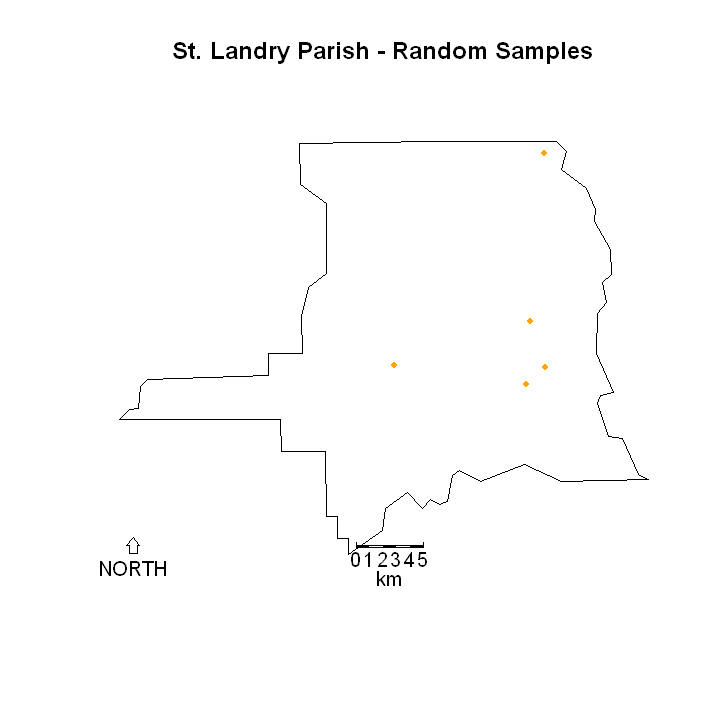

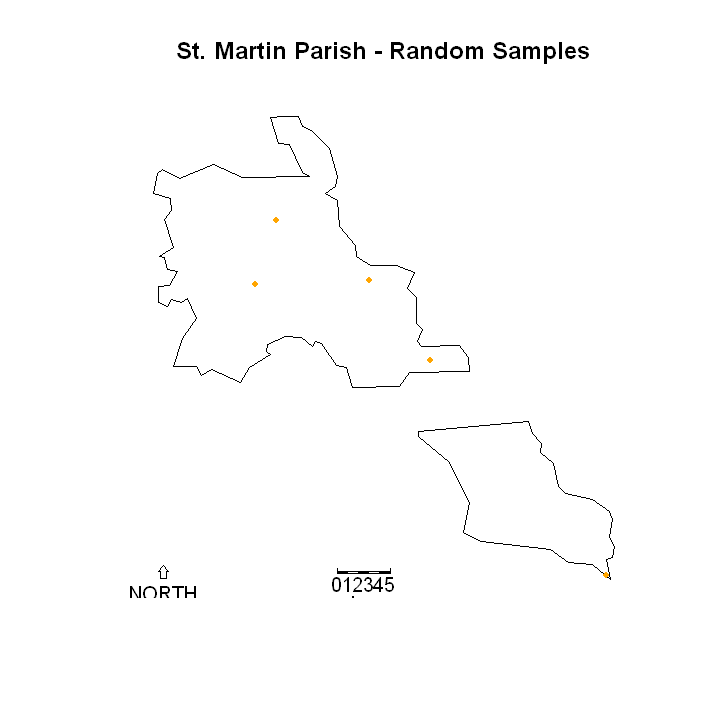

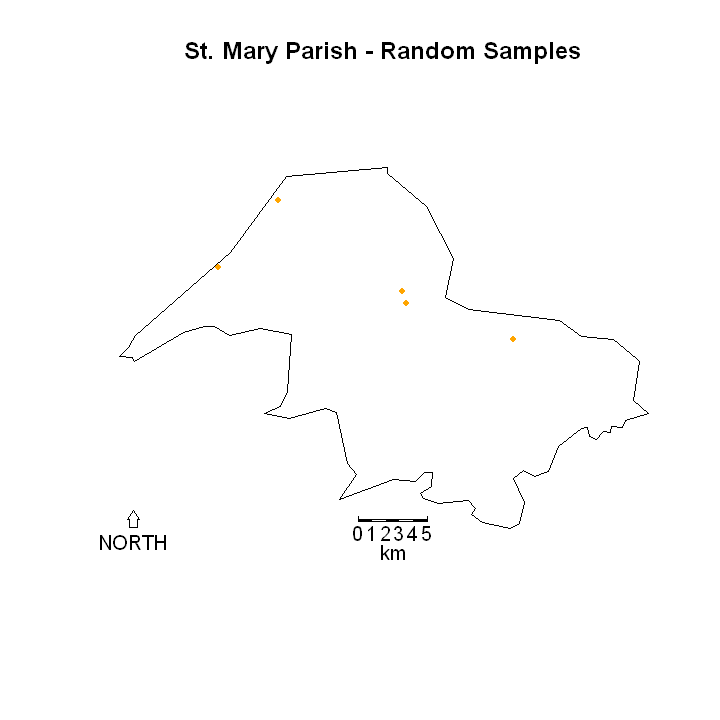

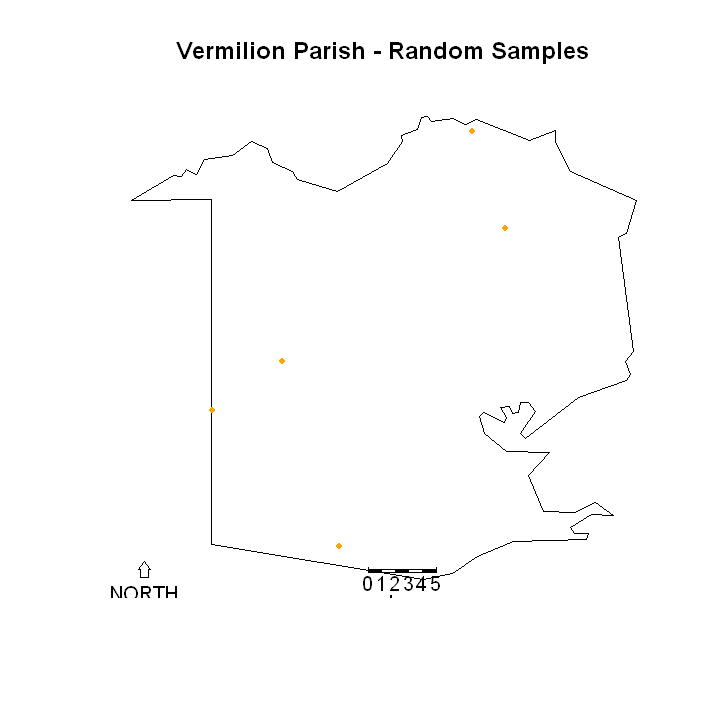

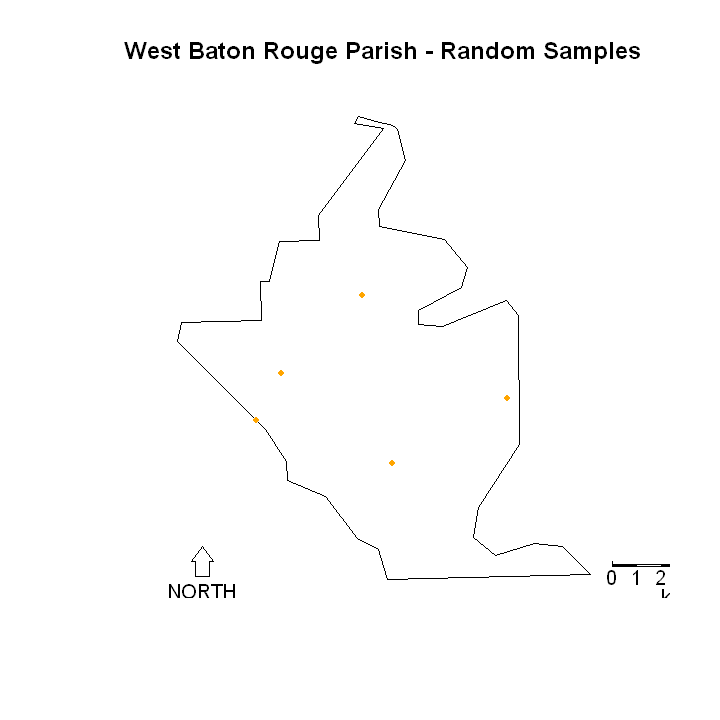

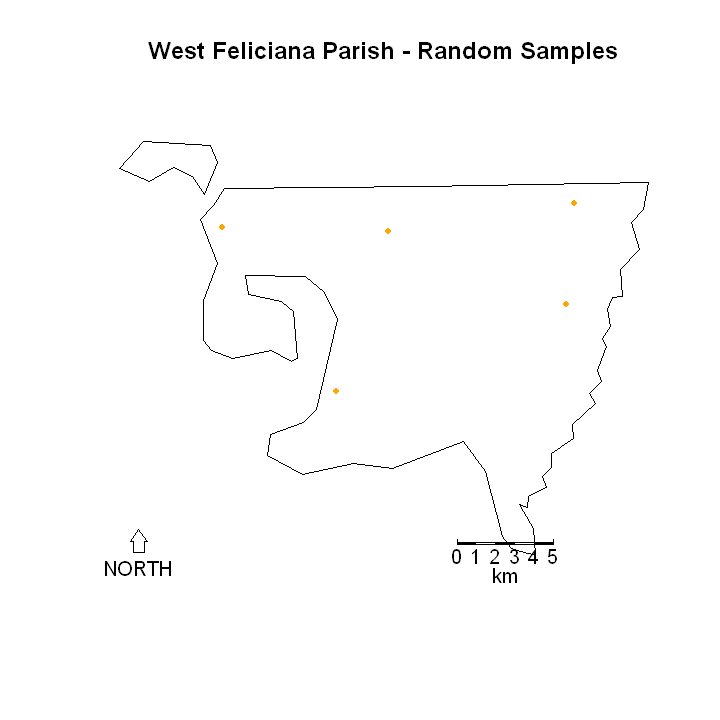

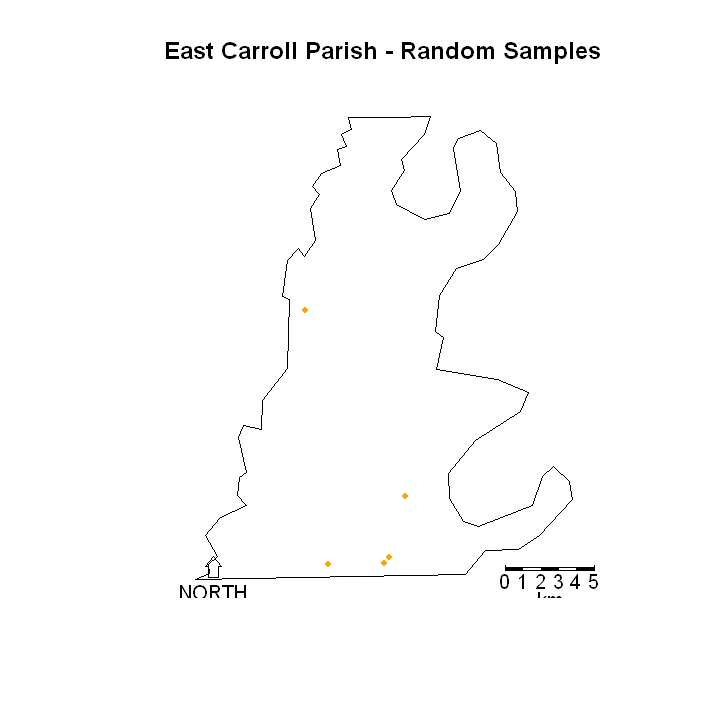

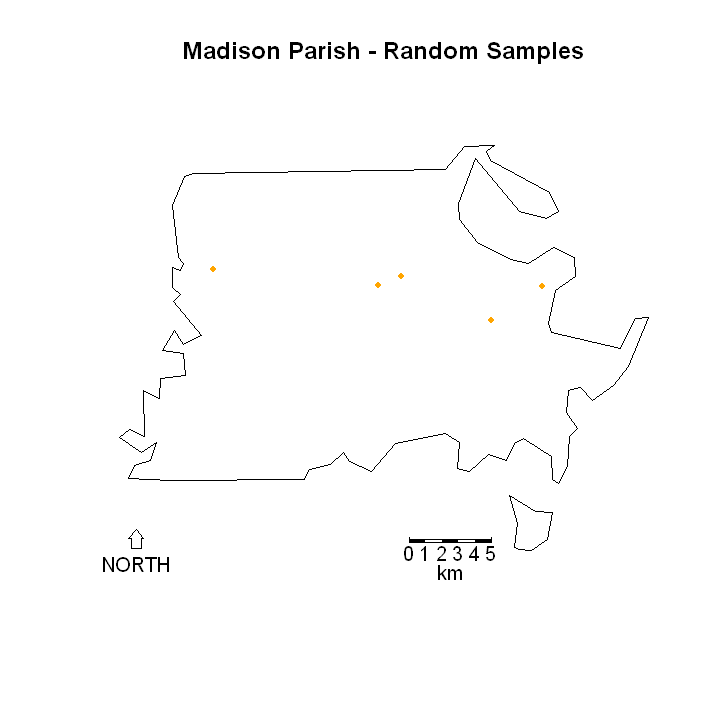

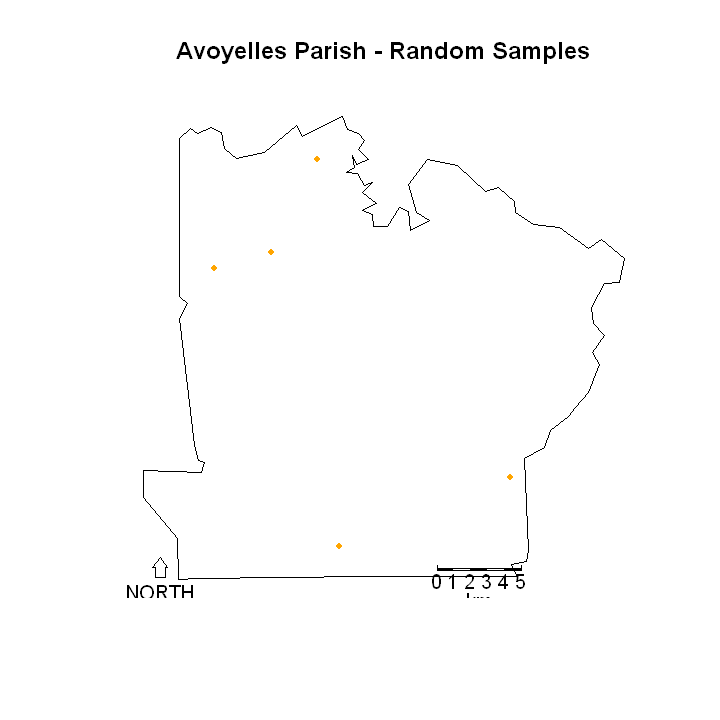

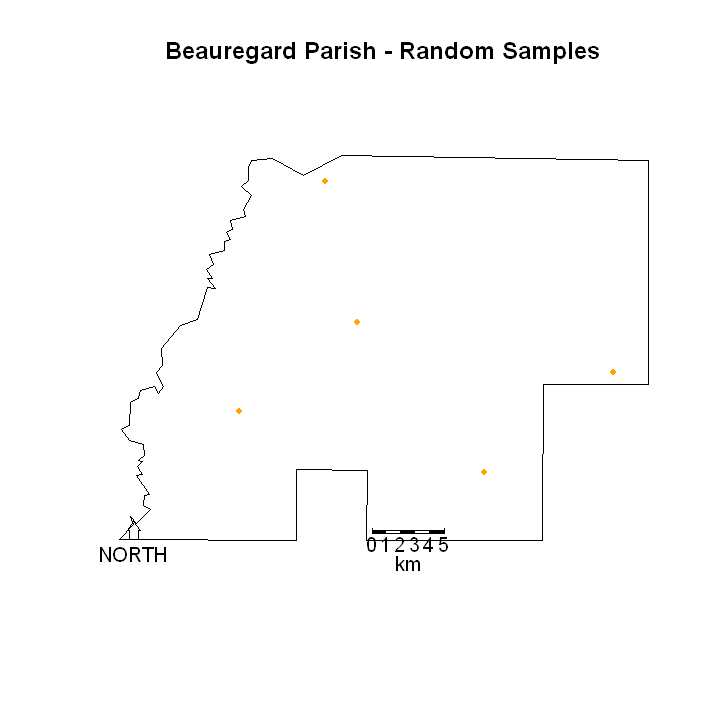

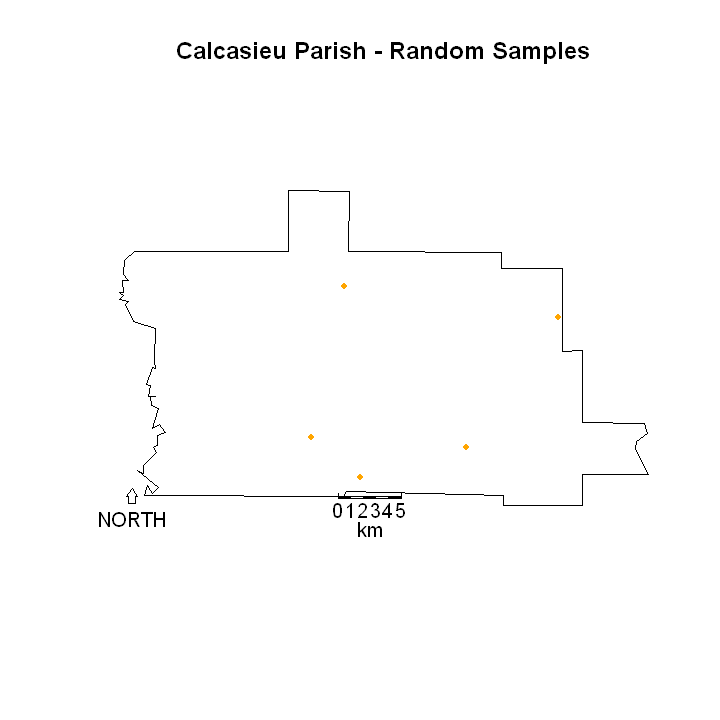

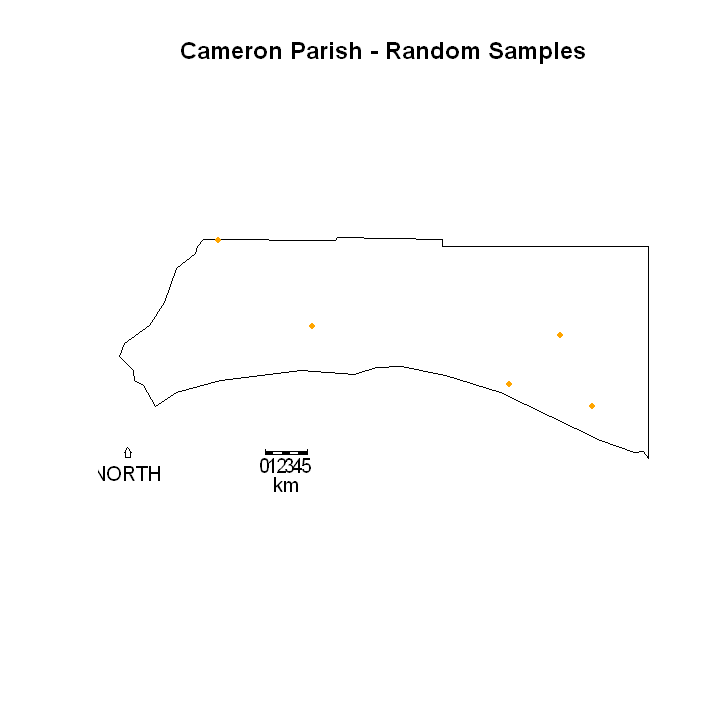

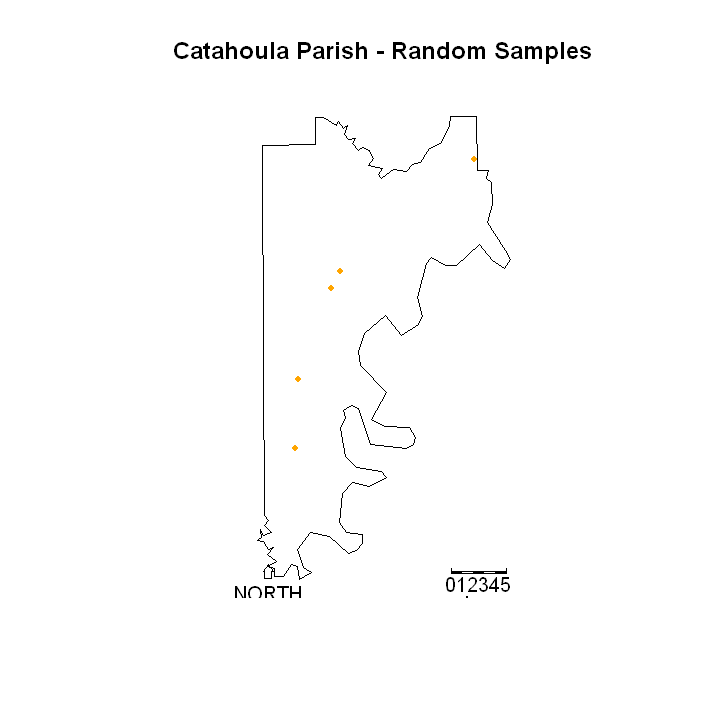

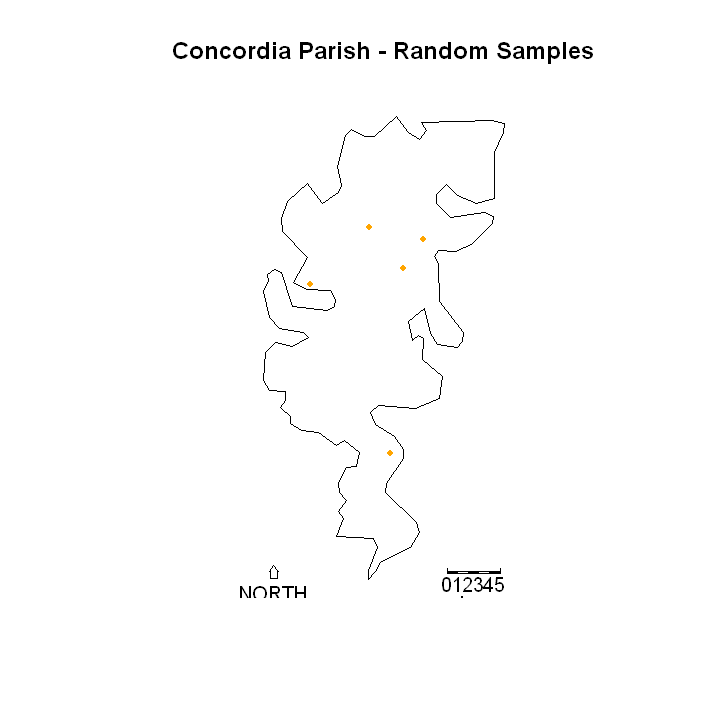

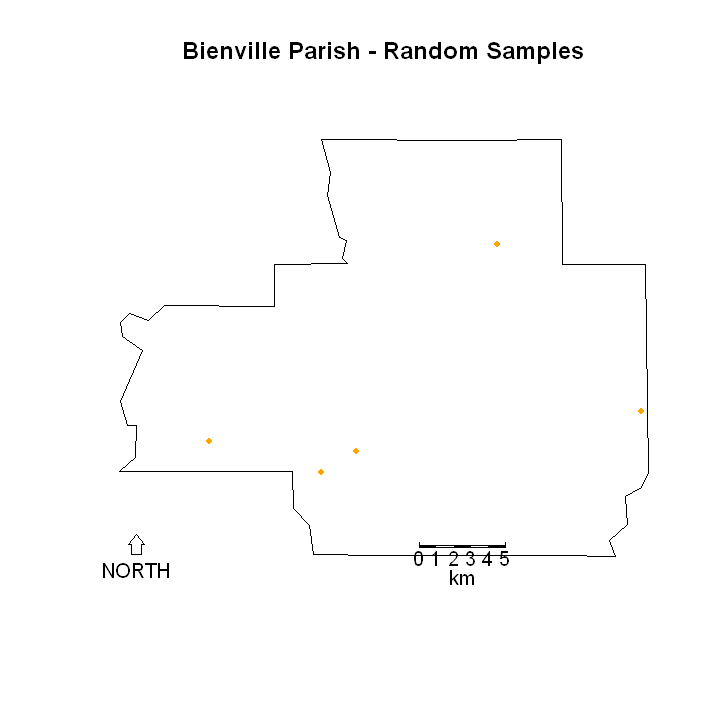

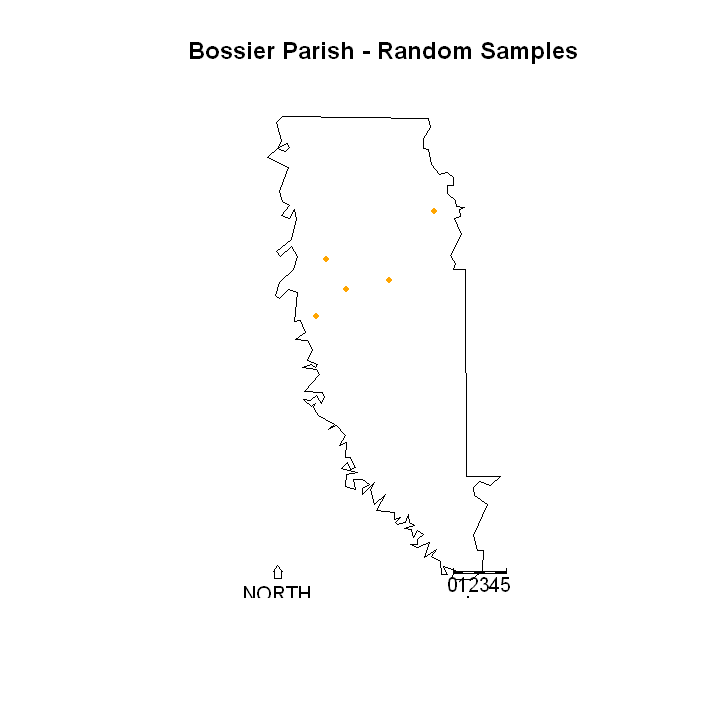

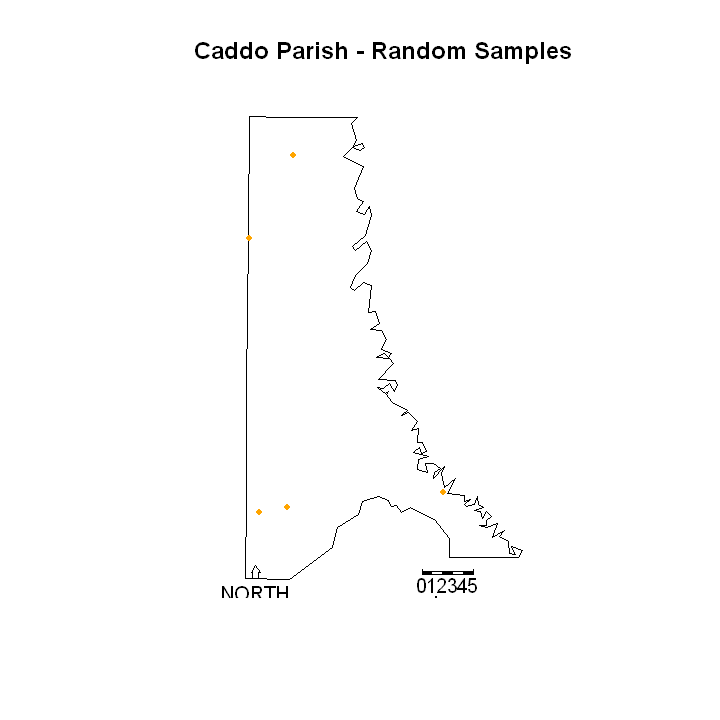

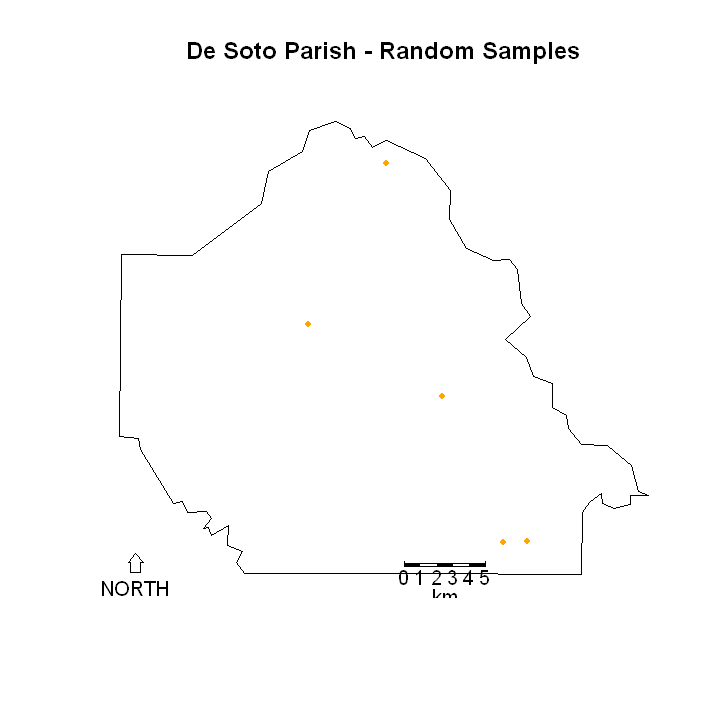

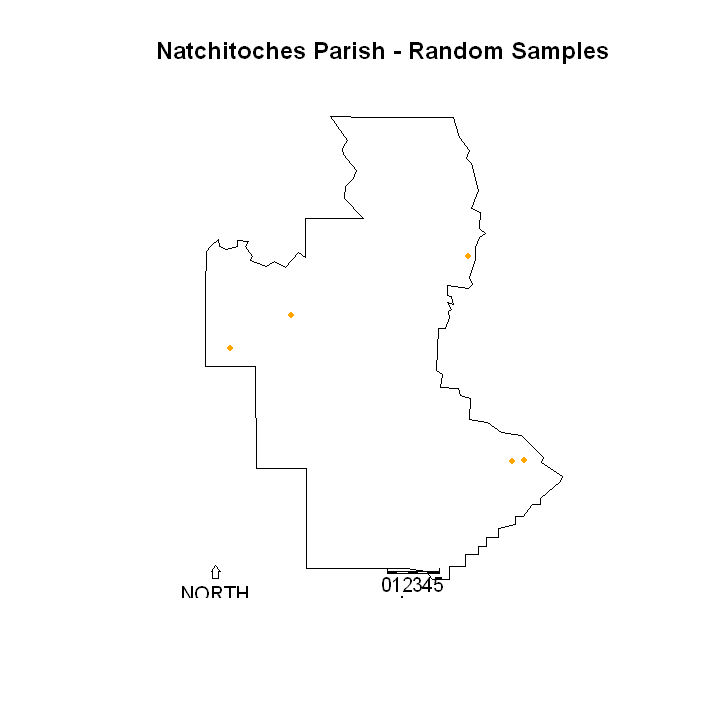

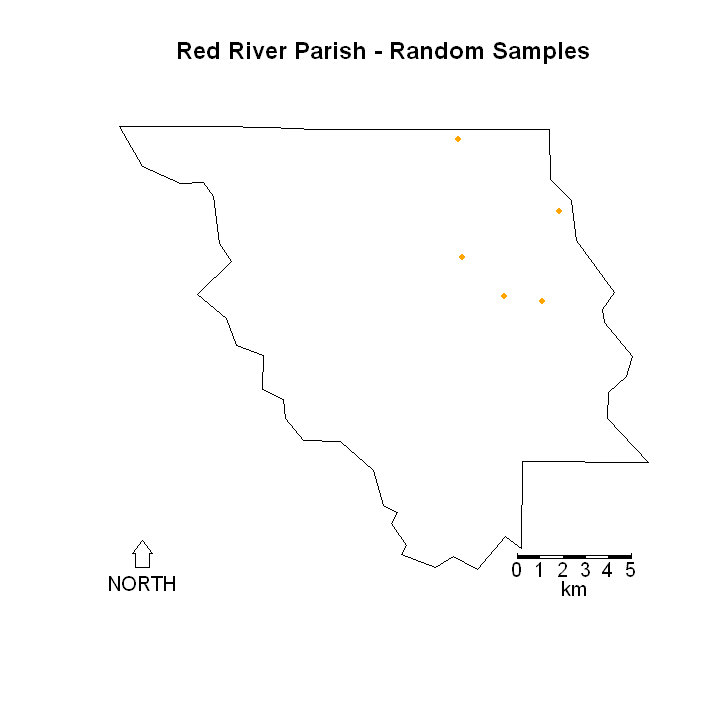

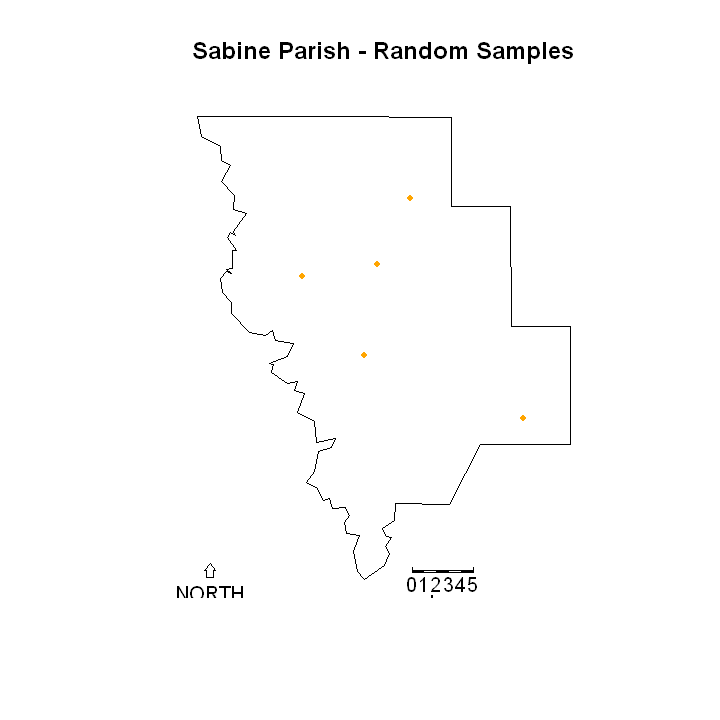

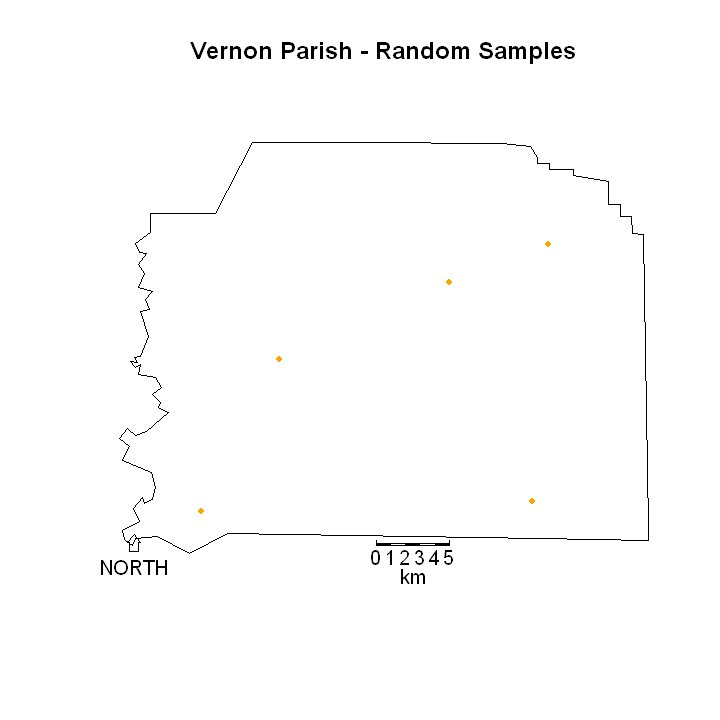

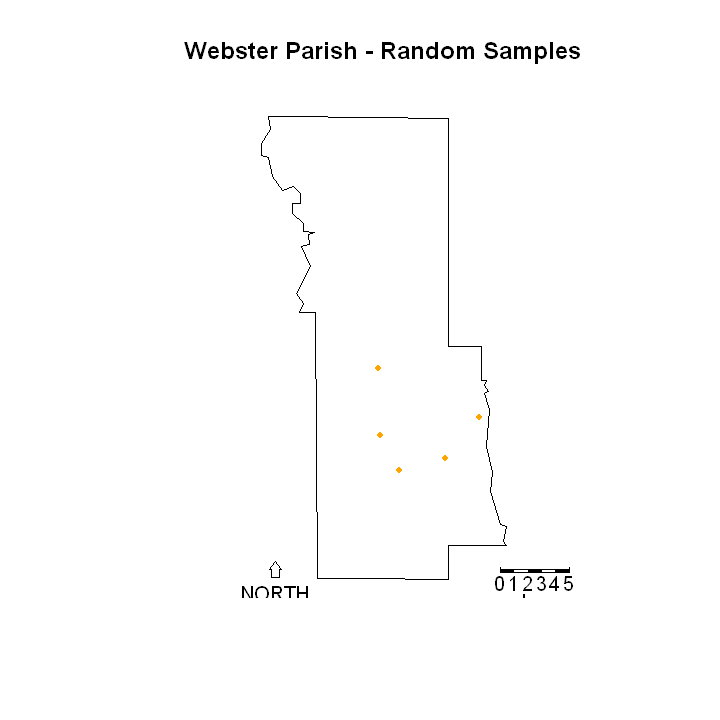

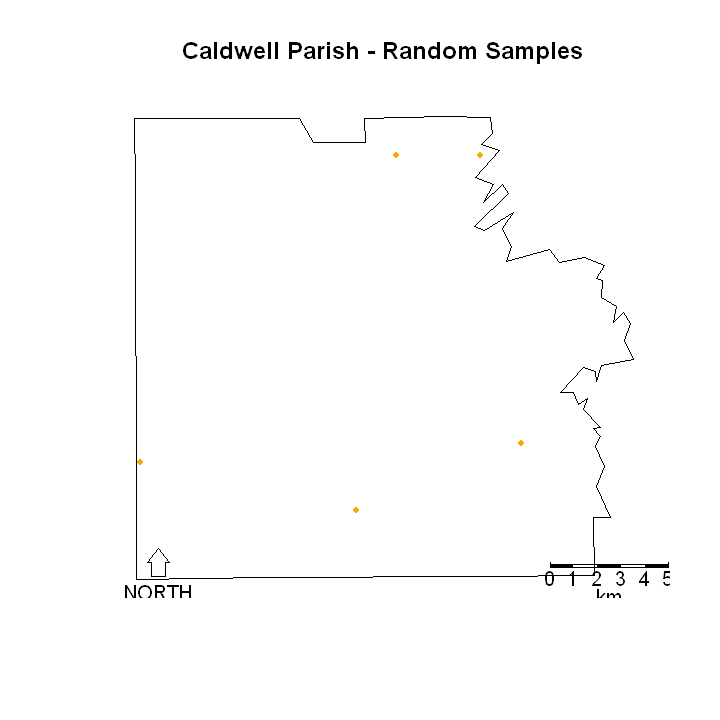

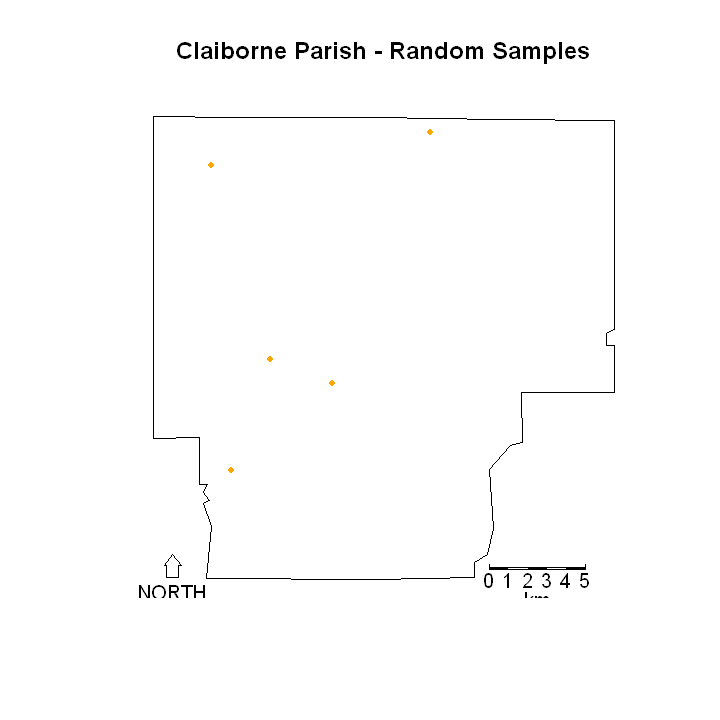

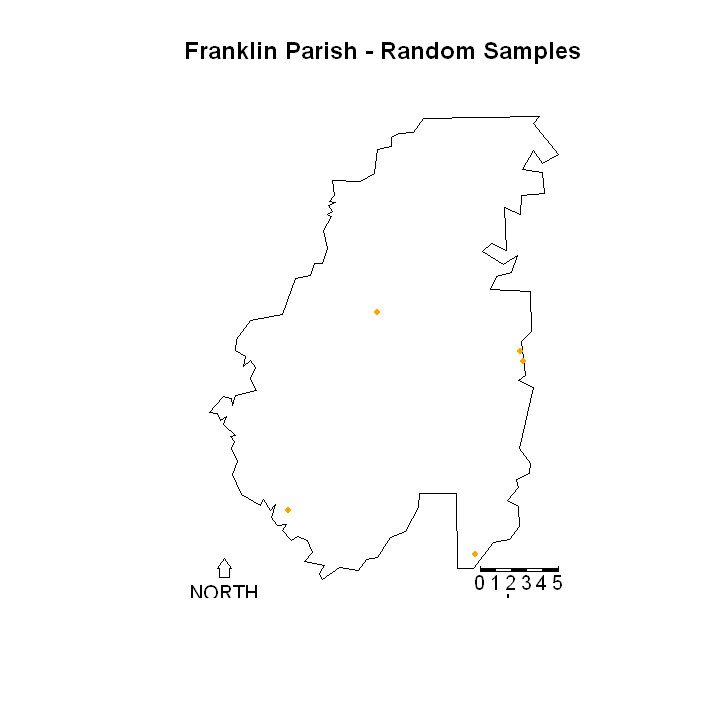

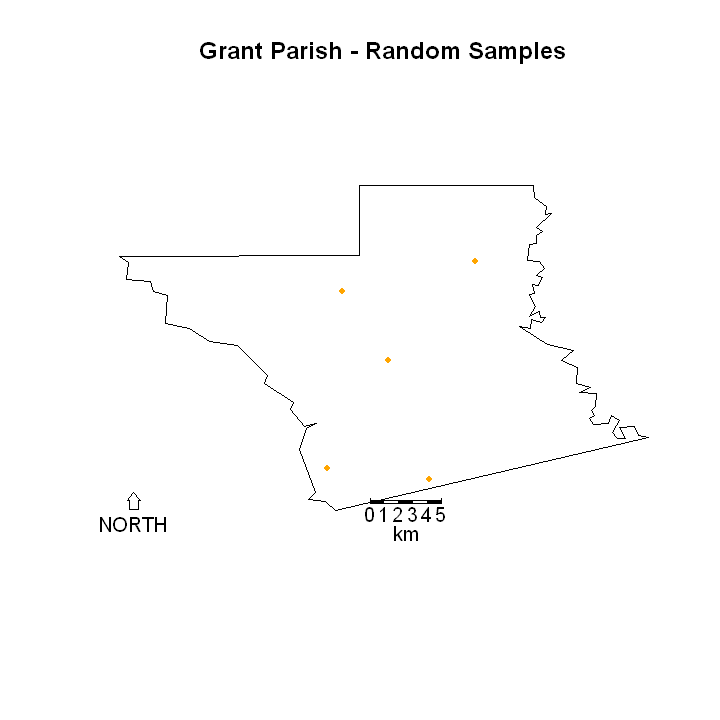

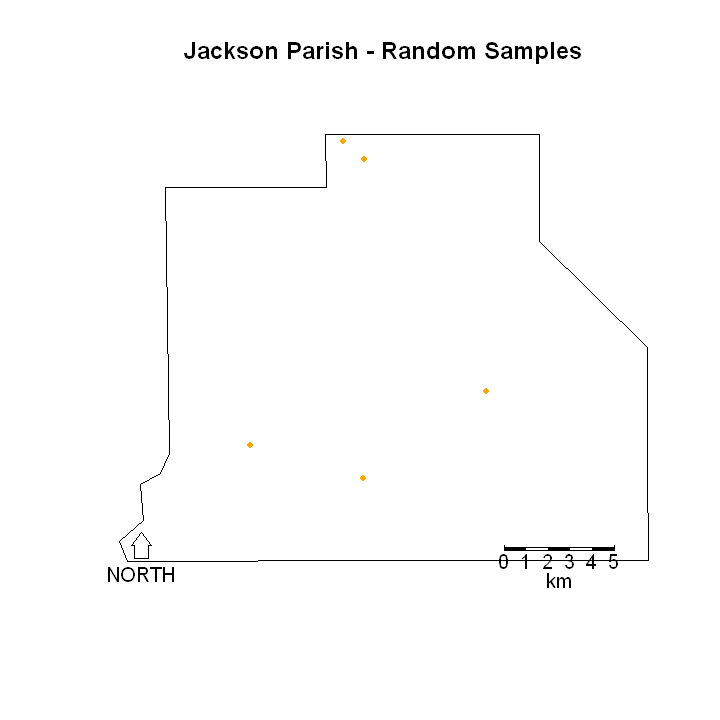

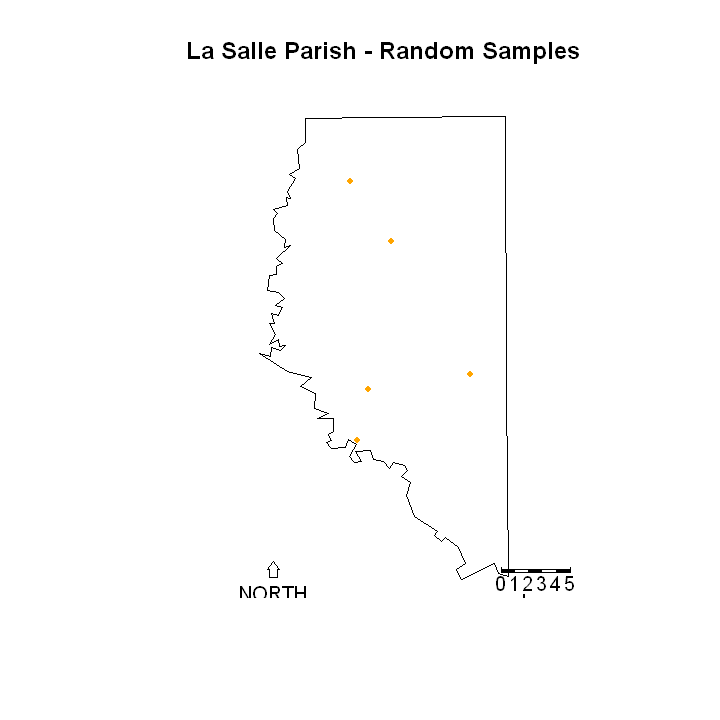

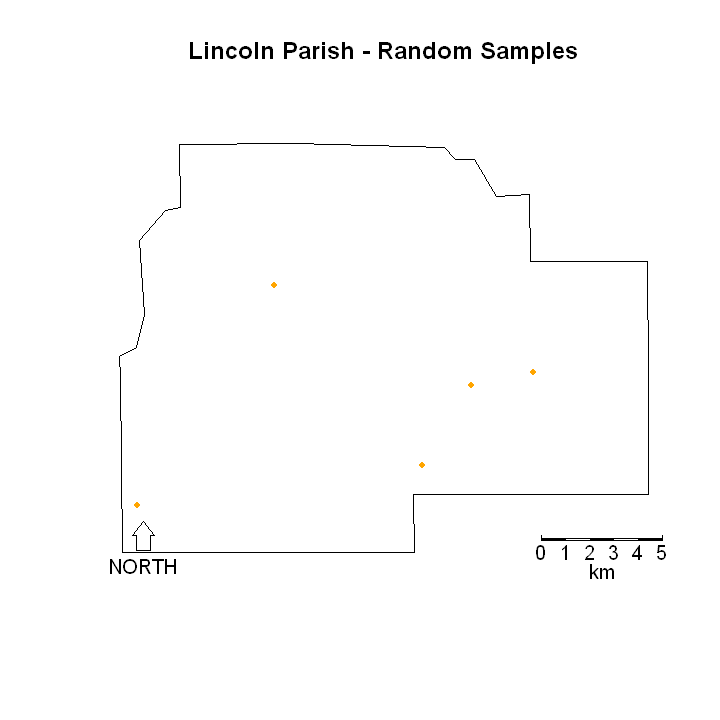

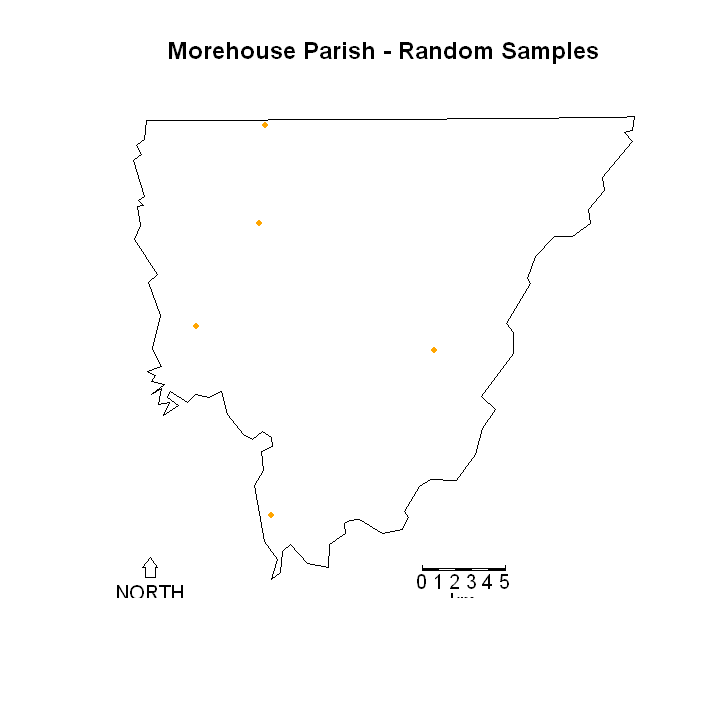

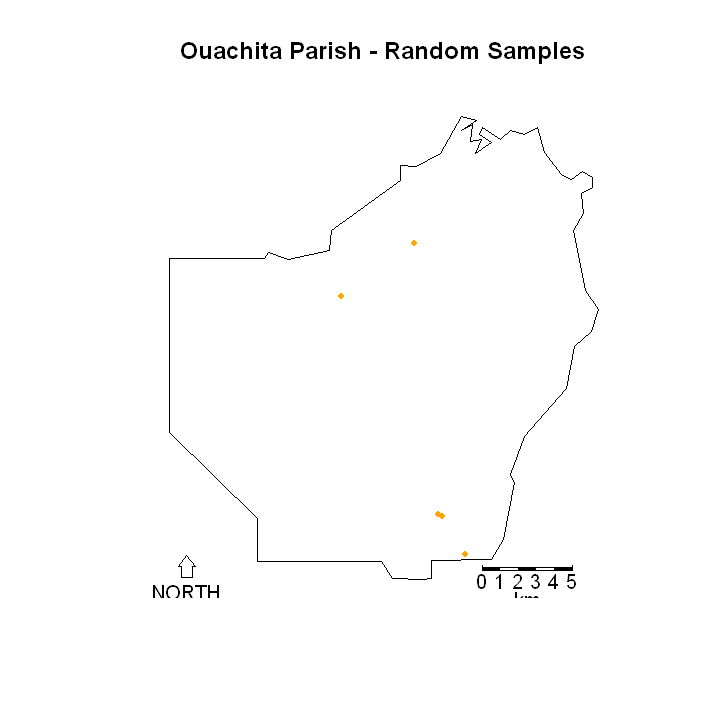

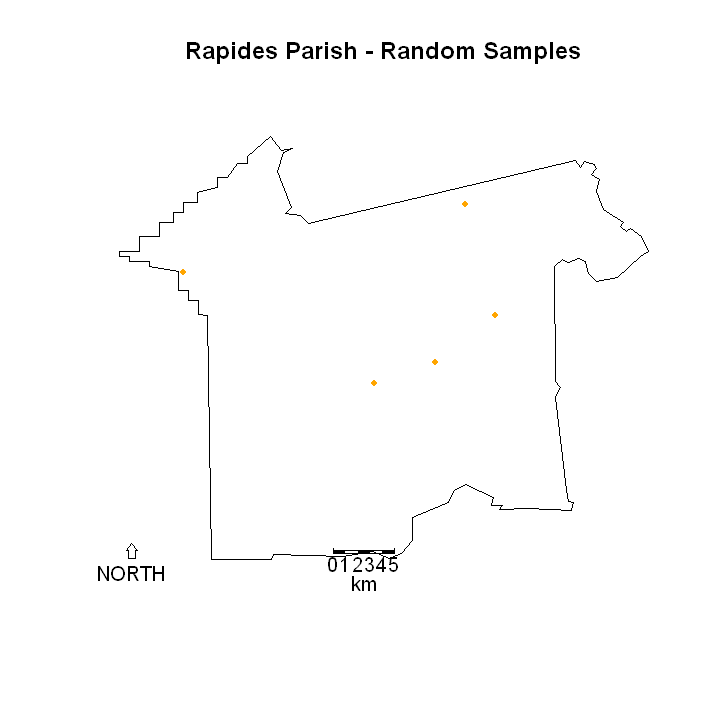

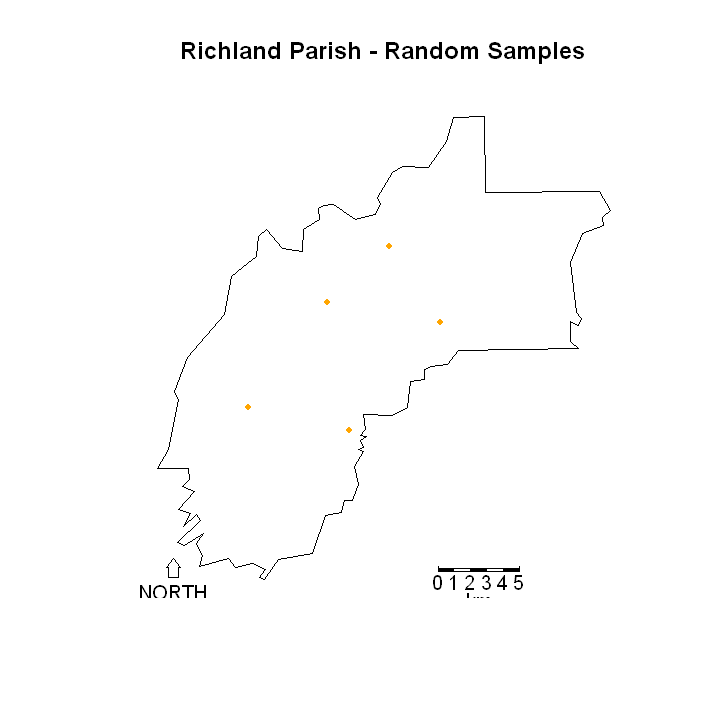

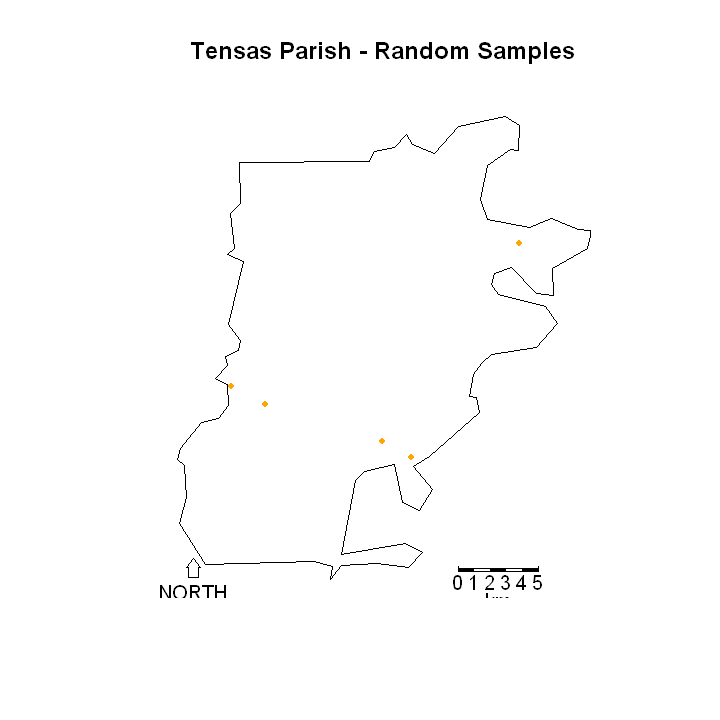

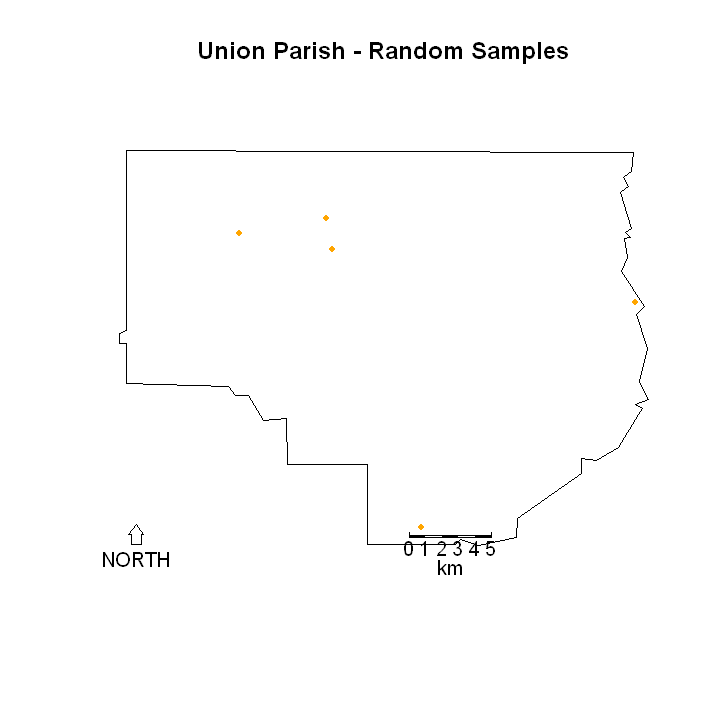

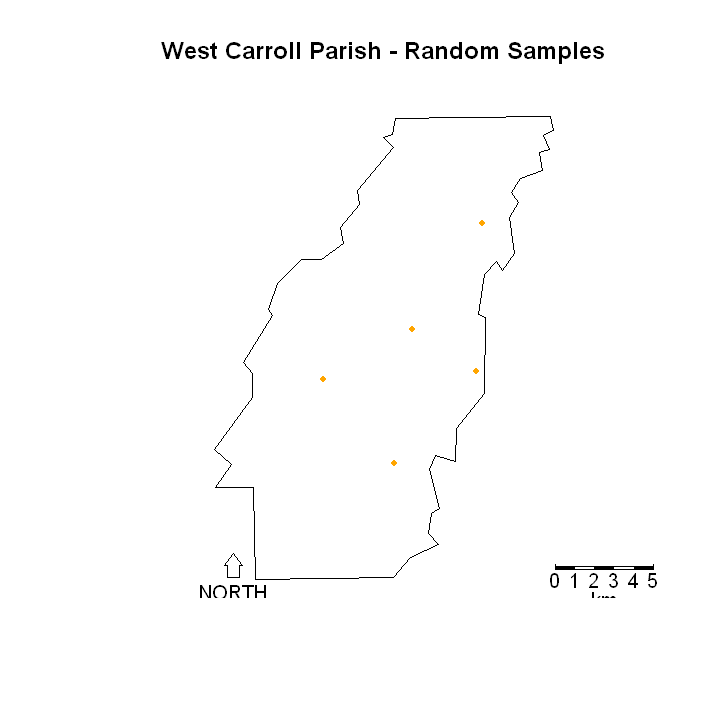

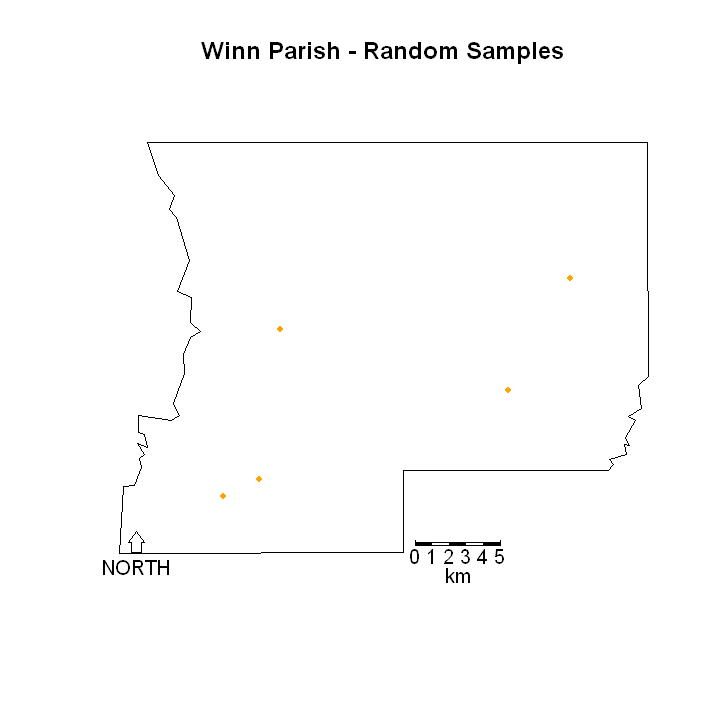

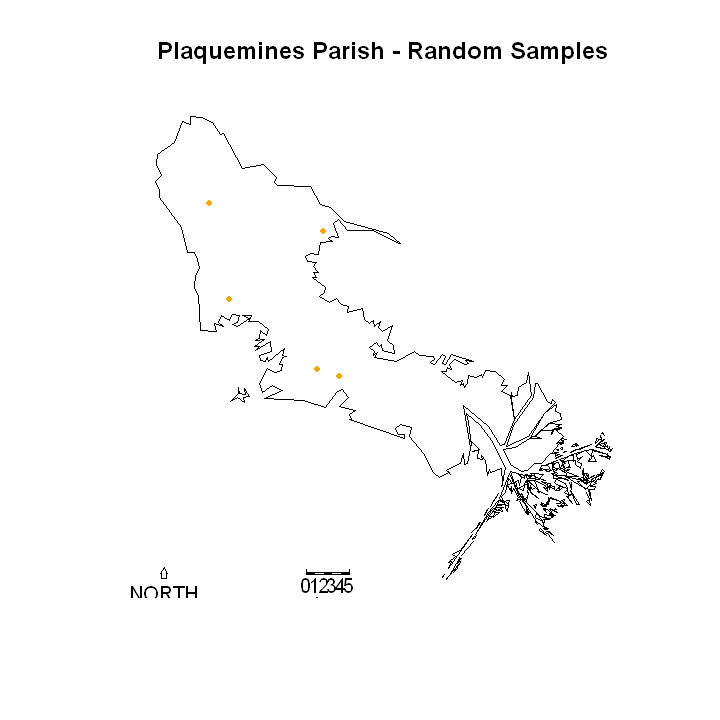

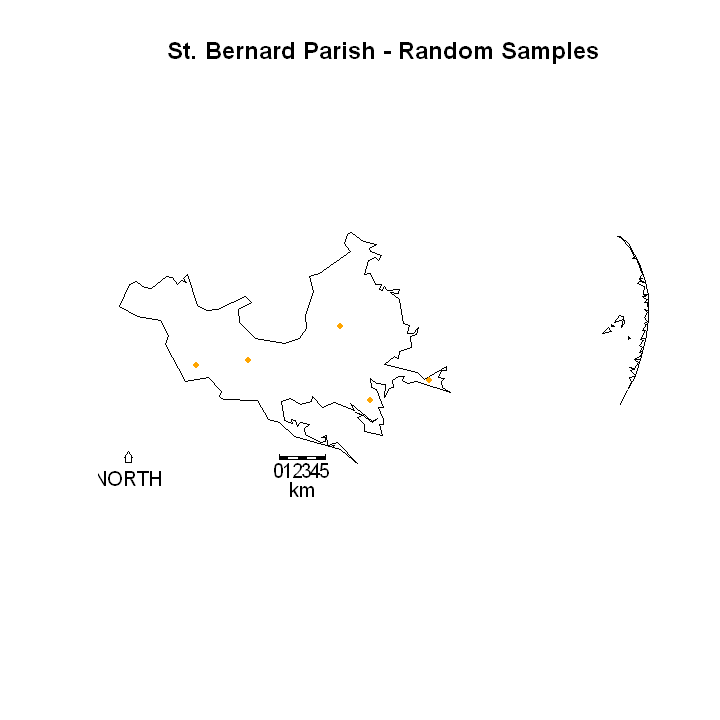

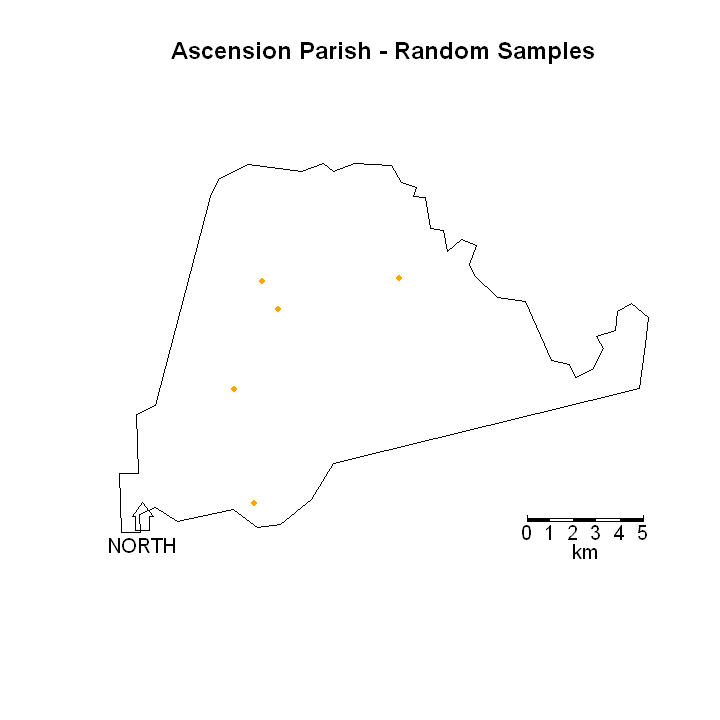

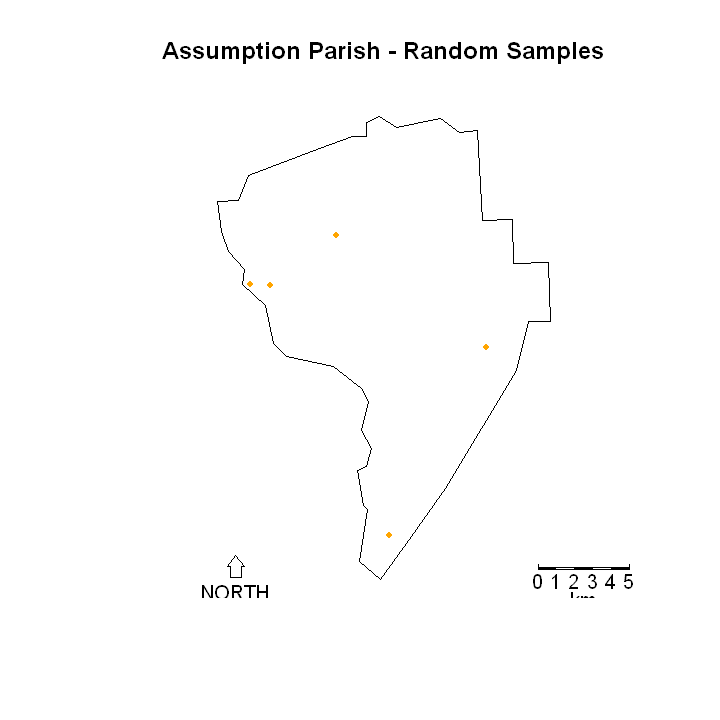

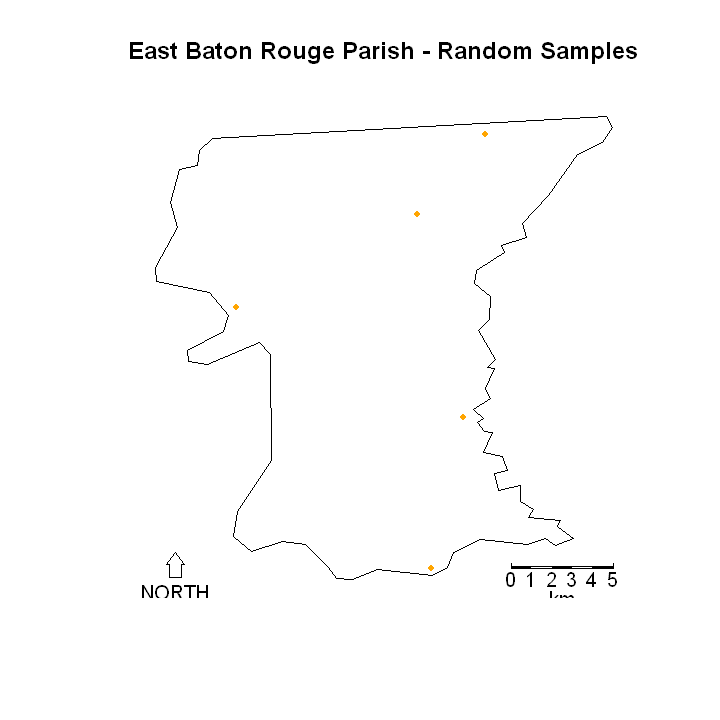

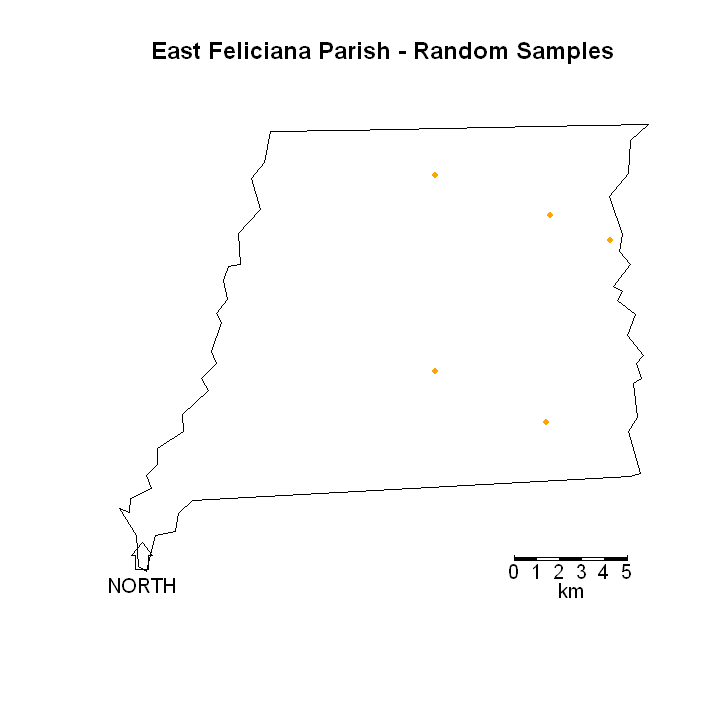

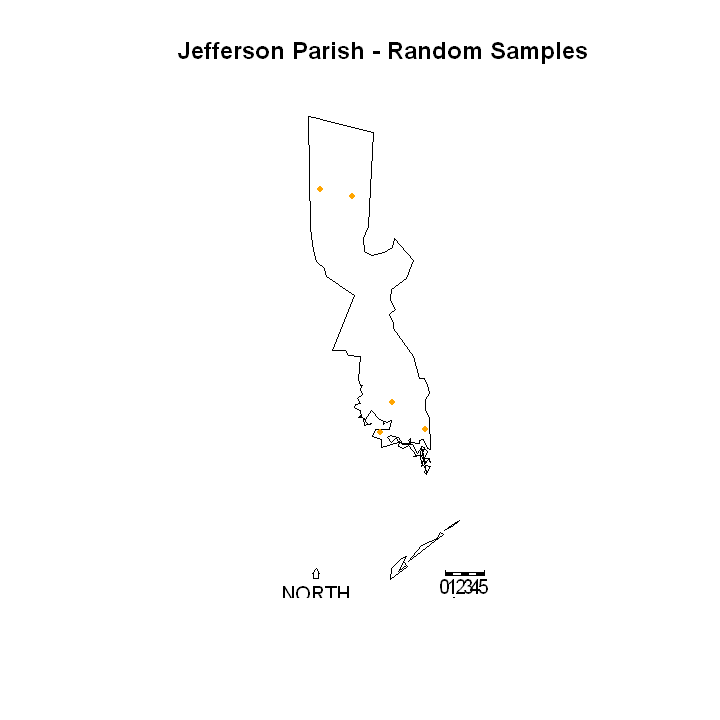

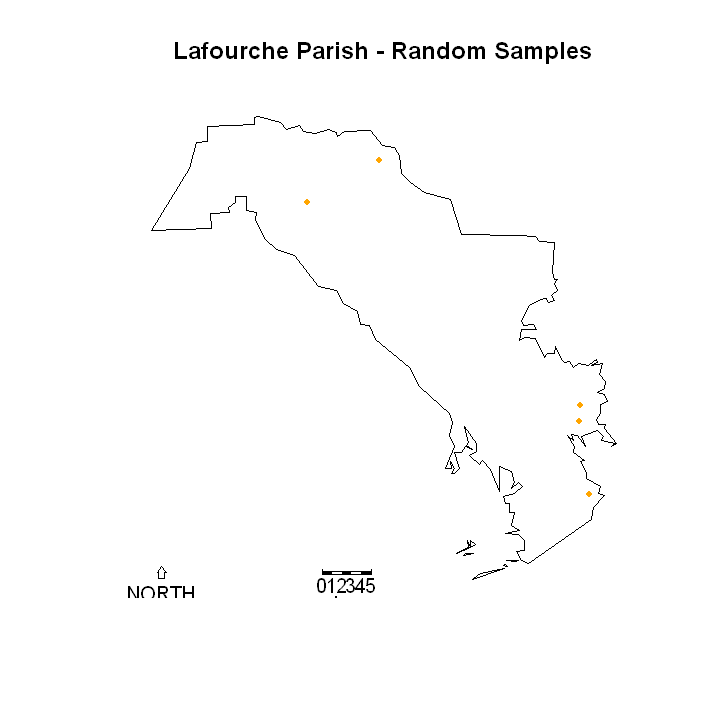

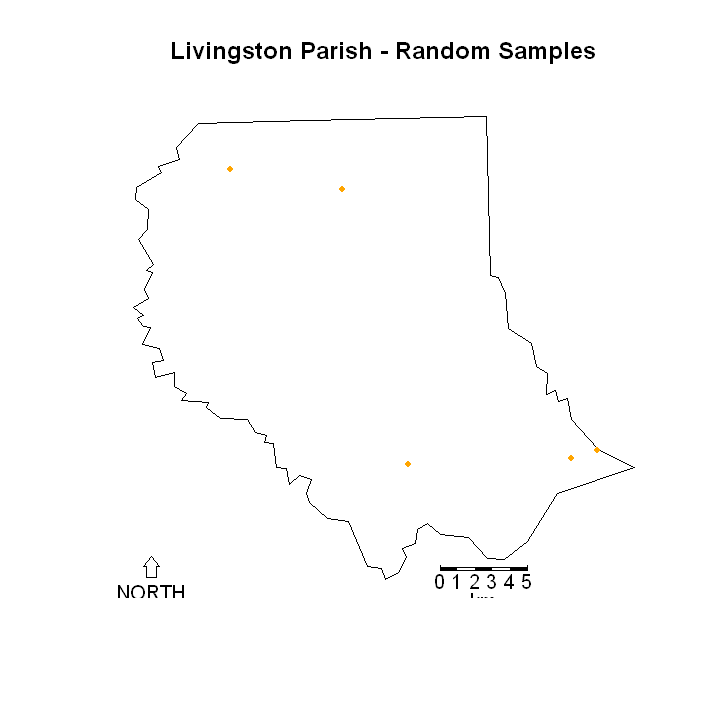

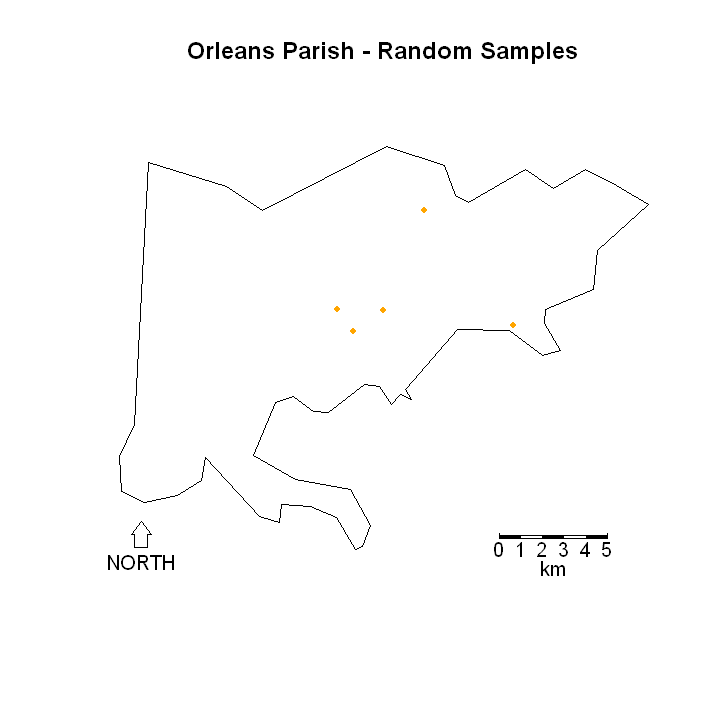

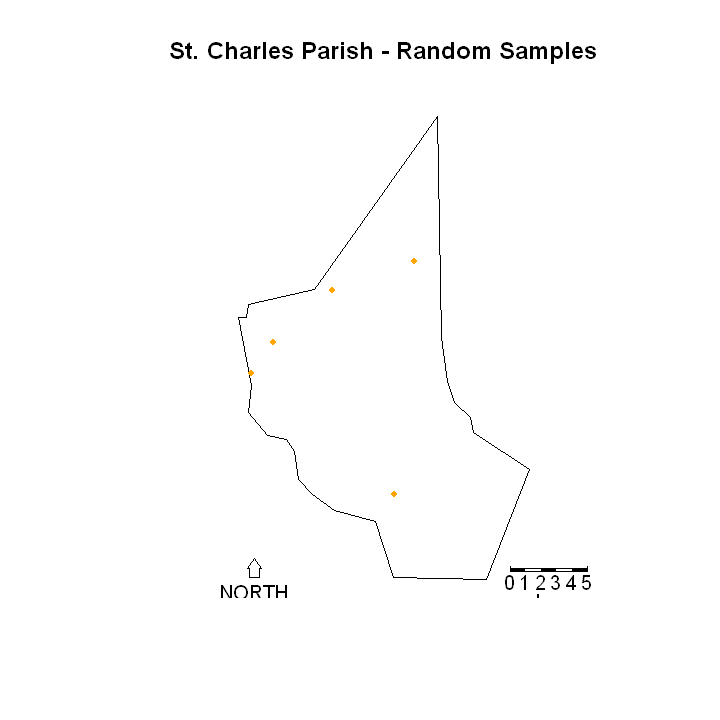

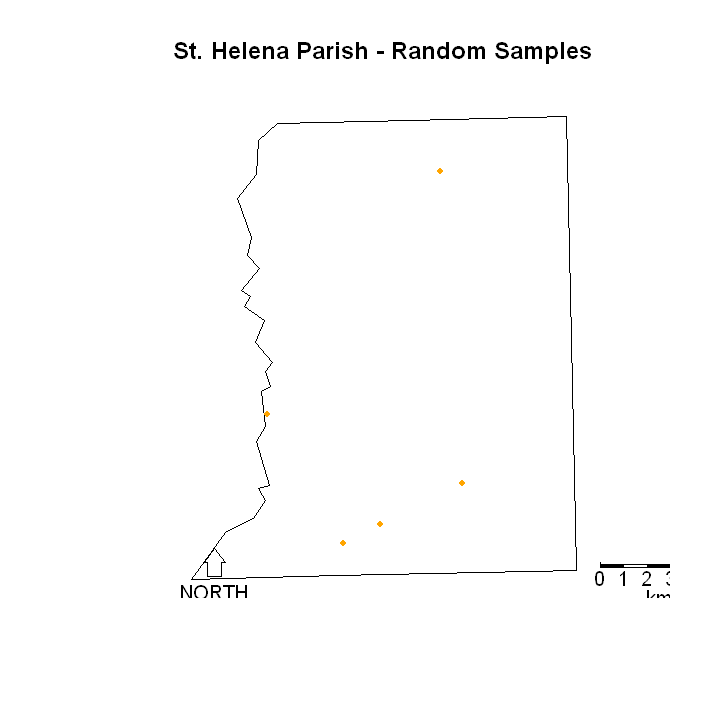

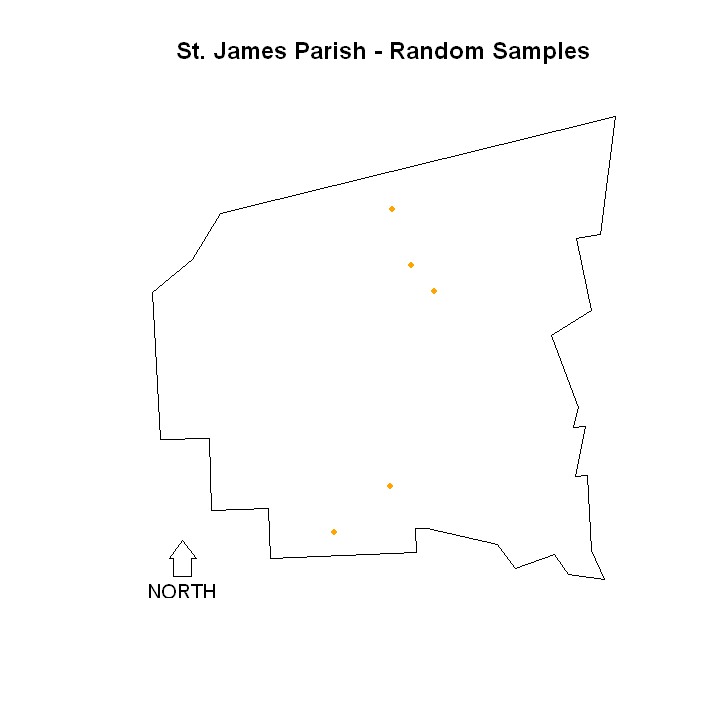

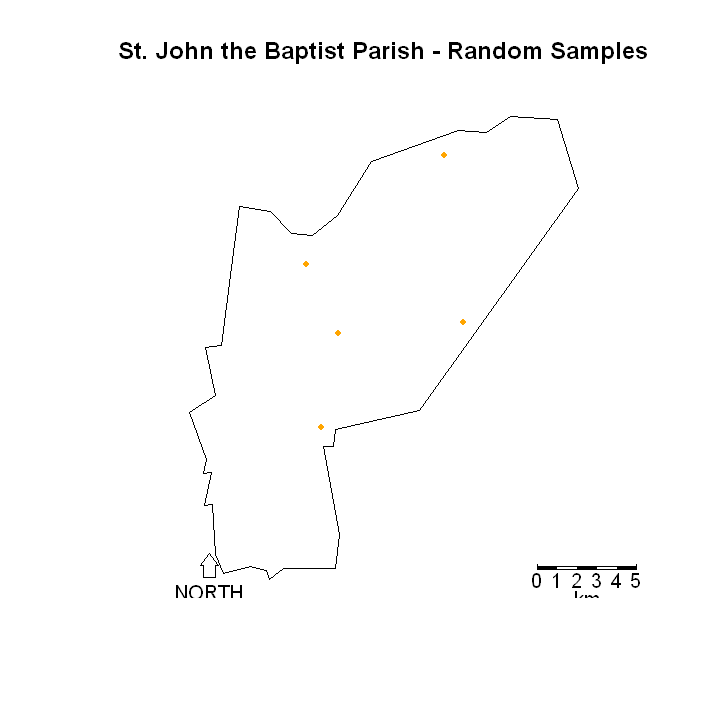

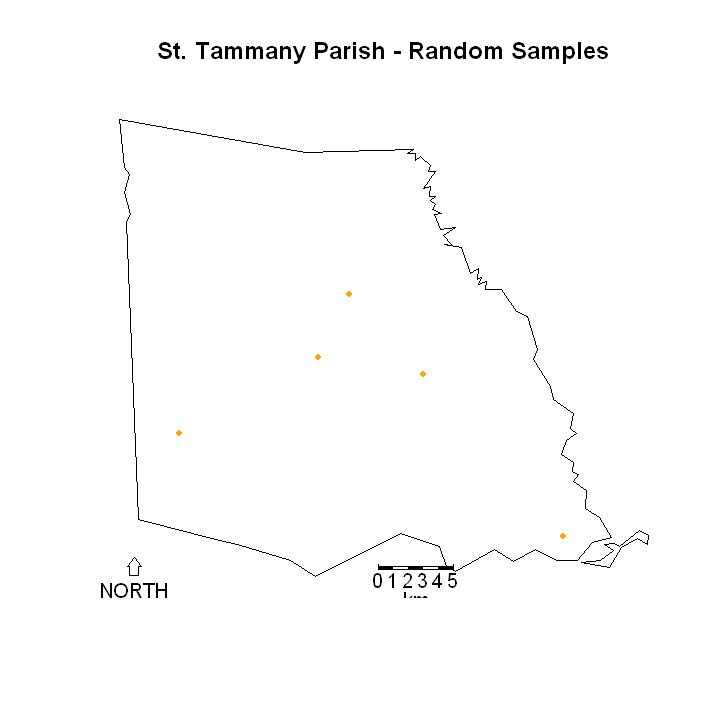

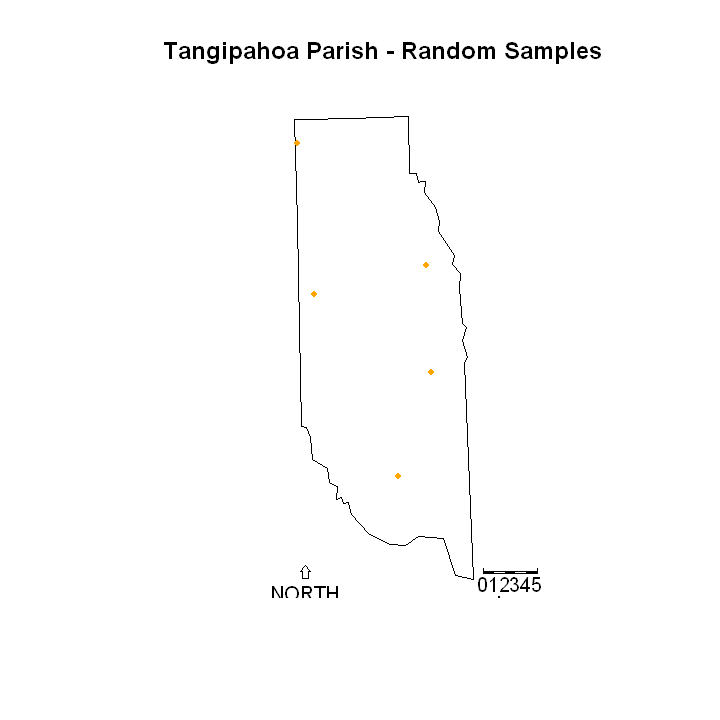

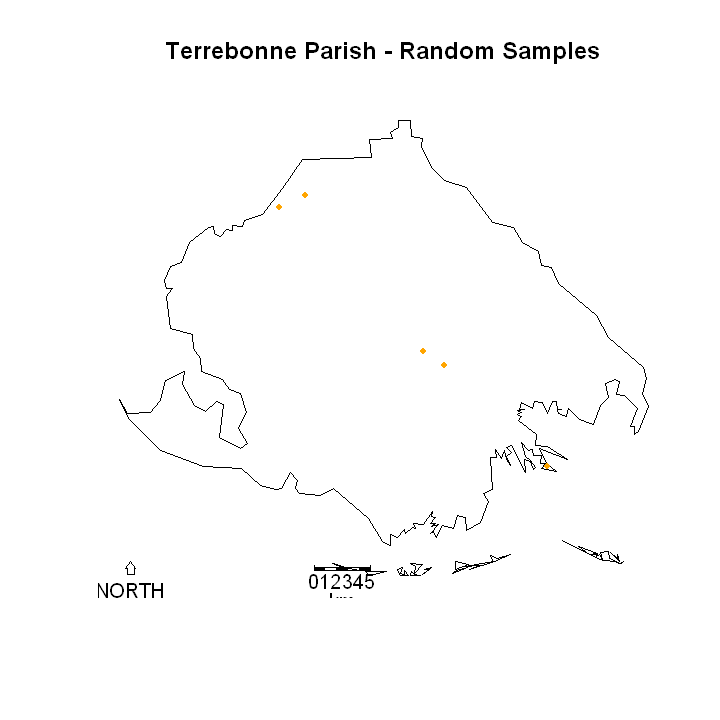

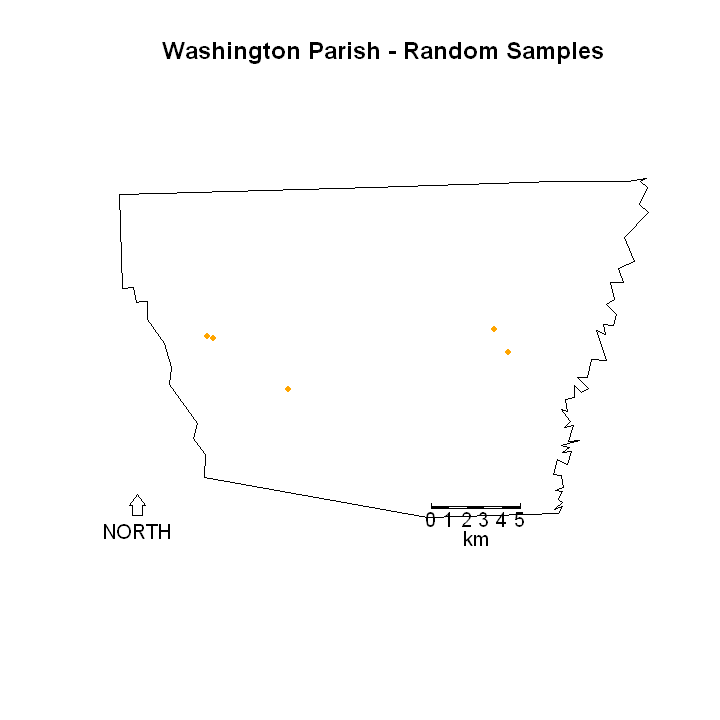

In [17]:
for (s in sampStrats){
    strat <- s[[1]]
    samps <- s[[2]]
    title <- paste(strat$NAME, "- Random Samples")
    
    plot(strat, main = title)
    plot(samps, add = TRUE, pch = 20, col = "orange")
    
    bb <- bbox(strat)
    xb_min <- bb[1, 1]
    yb_min <- bb[2, 1]
    
    north.arrow(xb_min + 2000, yb_min + 200, len = 600, lab = "NORTH")

    map.scale(xb_min + 40000, yb_min + 1000, len = 10000, 
          units = "km", ndiv = 5)
}

Conduct stratified sampling using parish polygons as strata and conduct stratified sampling (n=10) for each parish strata. To do this, you'll need to iterate through parishes and conduct a stratified sample on each. Be sure to map the parishes and the sampled points, as well as add a map title, a north arrow, and a scalebar. Finally, report the mean (mean() function) number of samples that were obtained for the set of parishes.

In [18]:
getSamps10 <- function(id){
    selStrat <- counties[counties$ID == id, ]
    samp.strat <- spsample(selStrat, n = 10, type = "stratified", iter = 10)
    
    res <- c(selStrat, samp.strat, length(samp.strat))
    return(res)
}

In [19]:
sampStrats10 <- lapply(counties@data$ID, FUN = getSamps10)

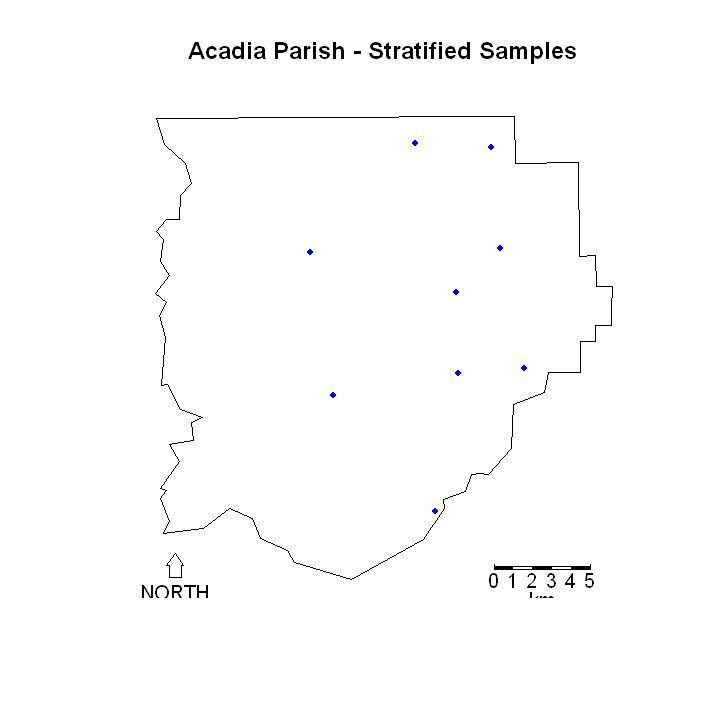

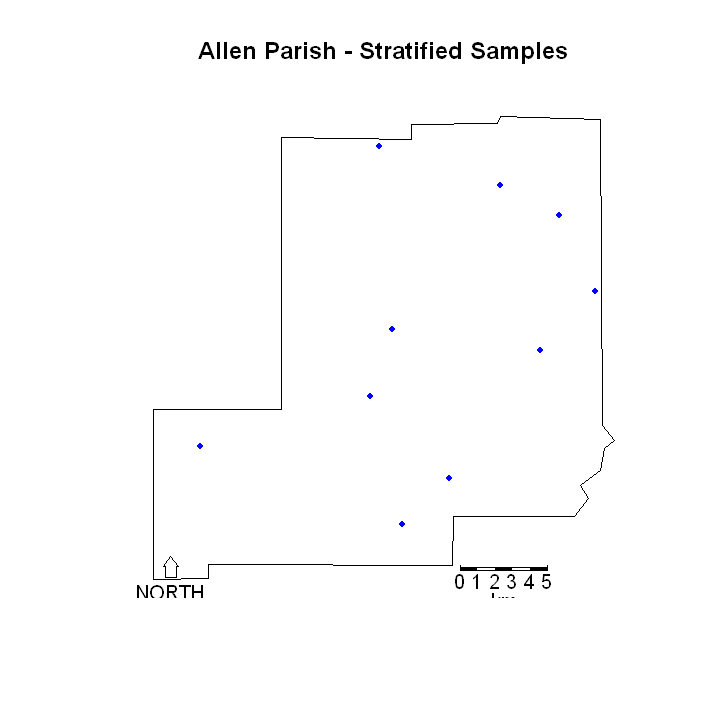

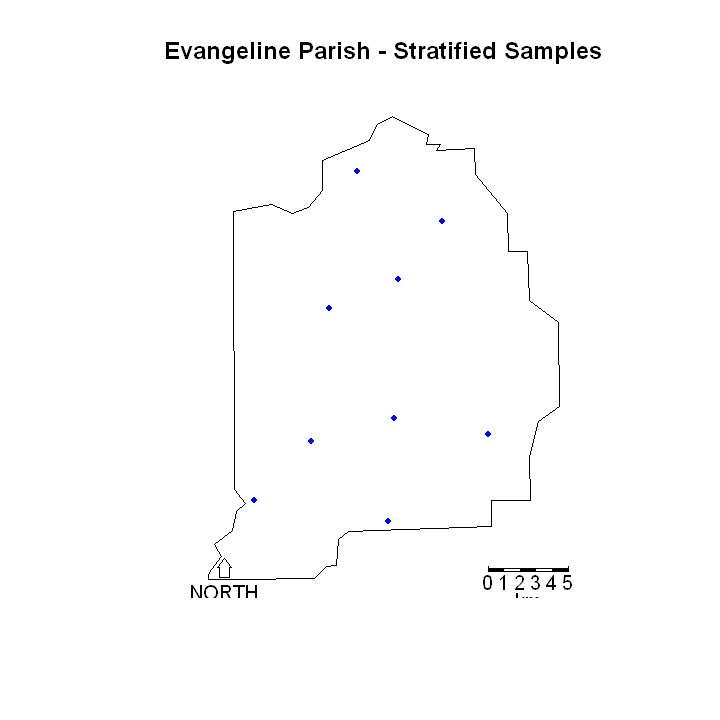

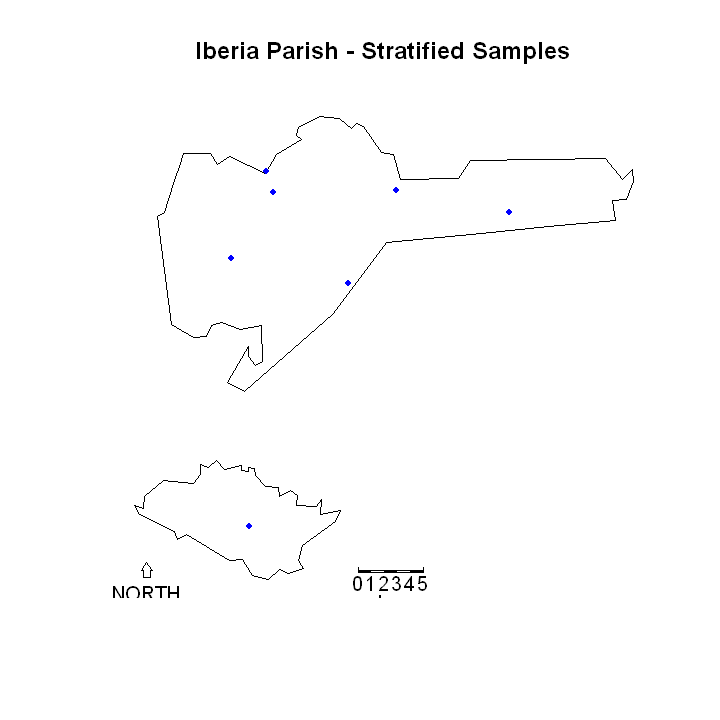

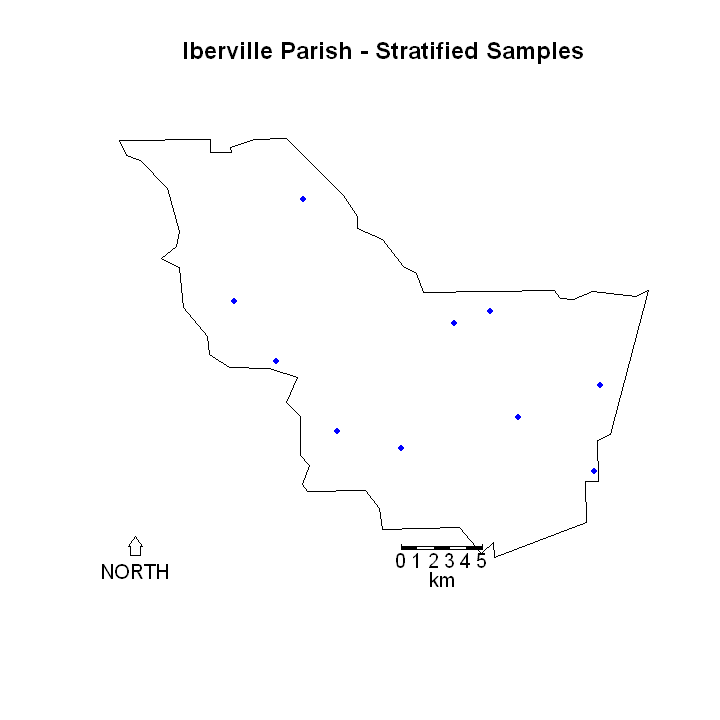

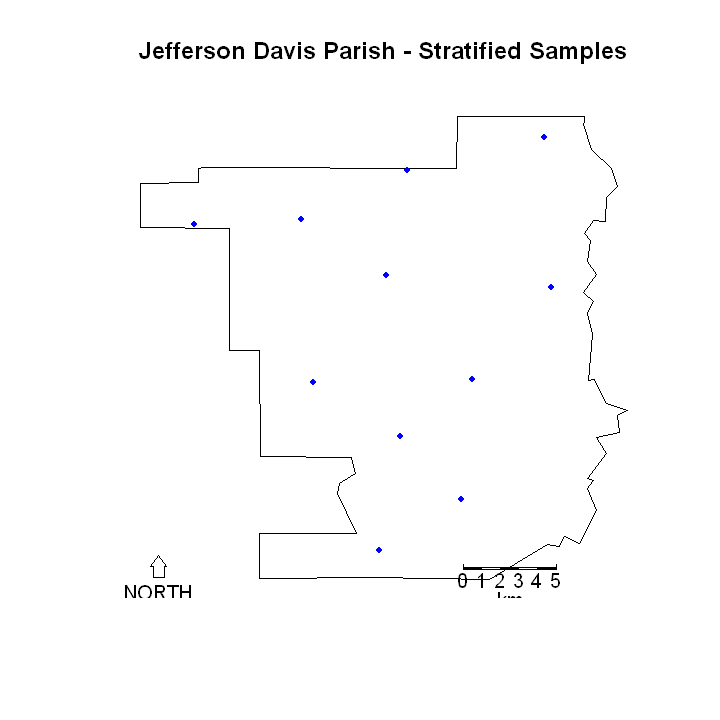

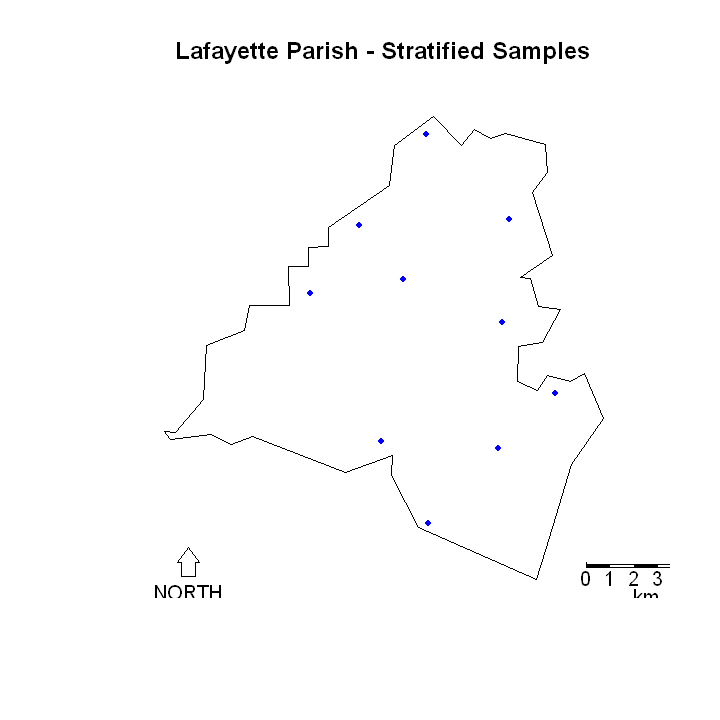

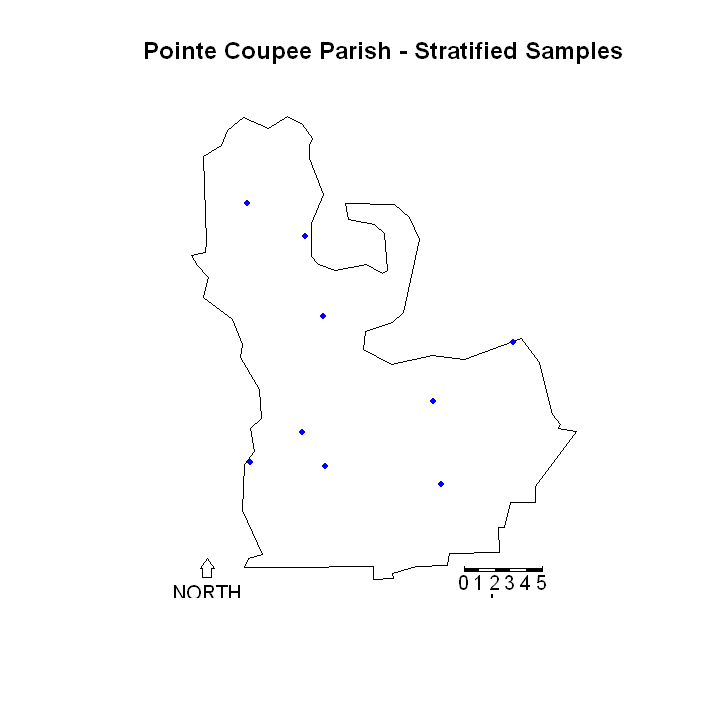

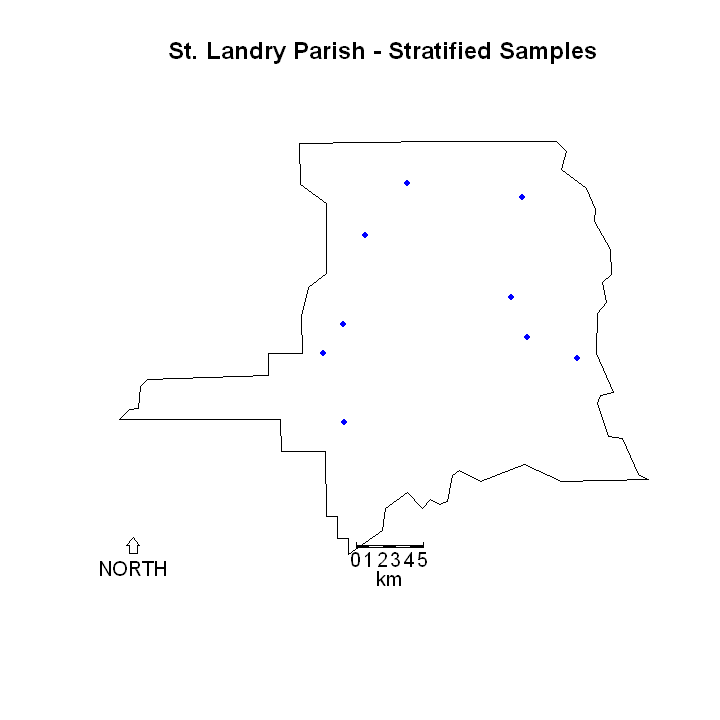

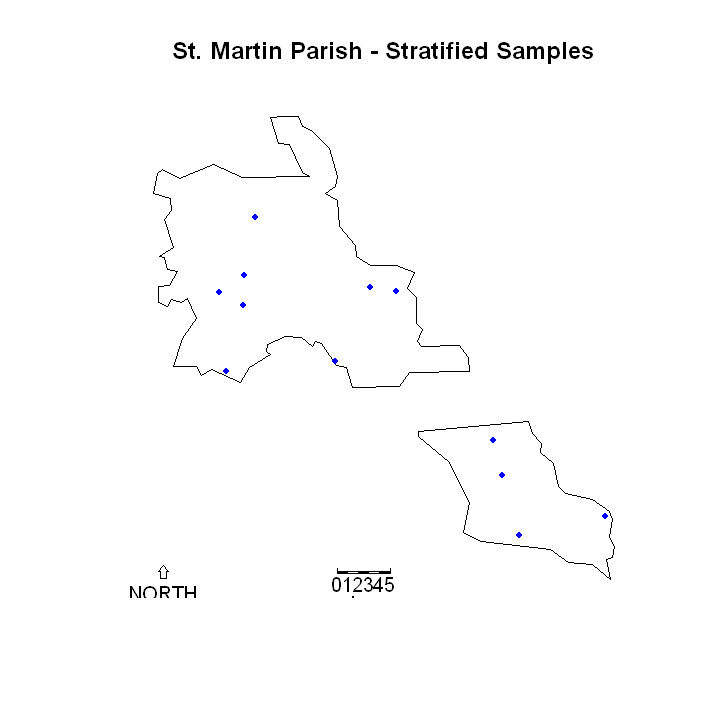

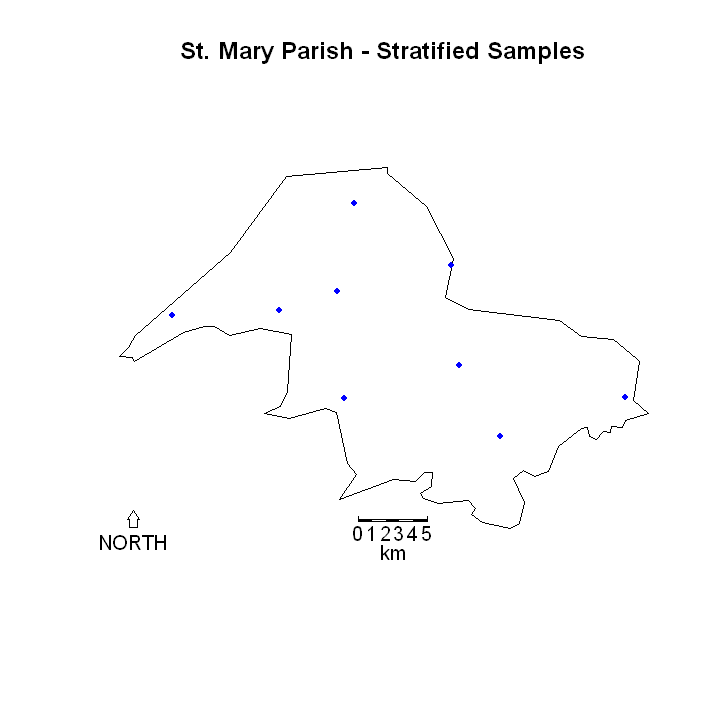

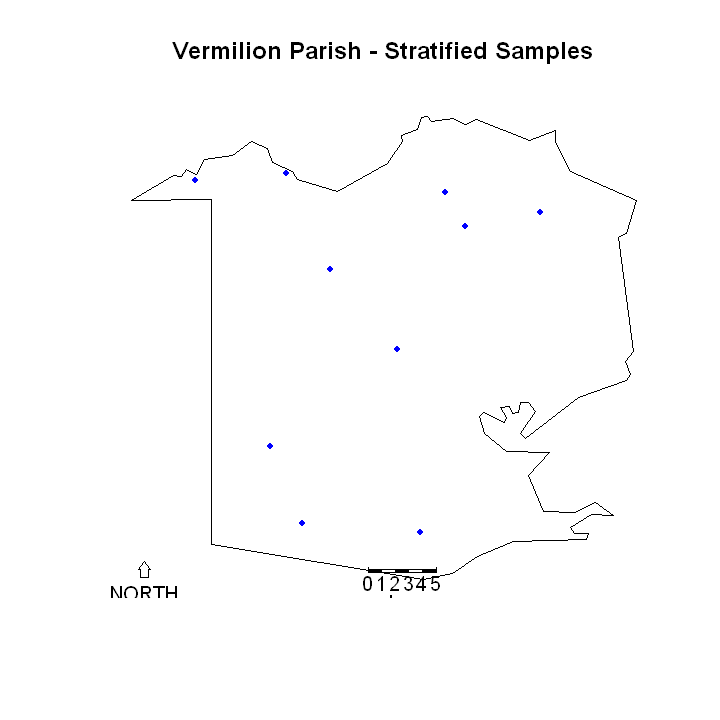

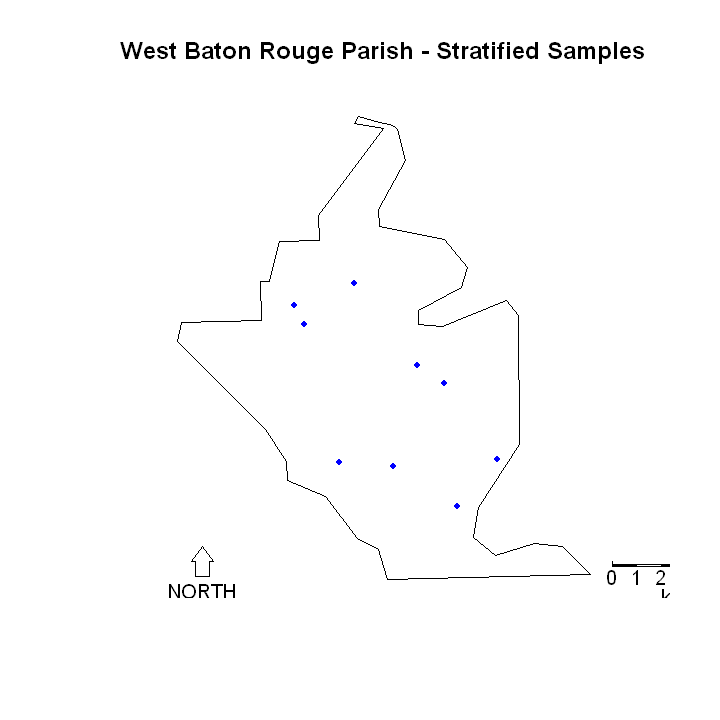

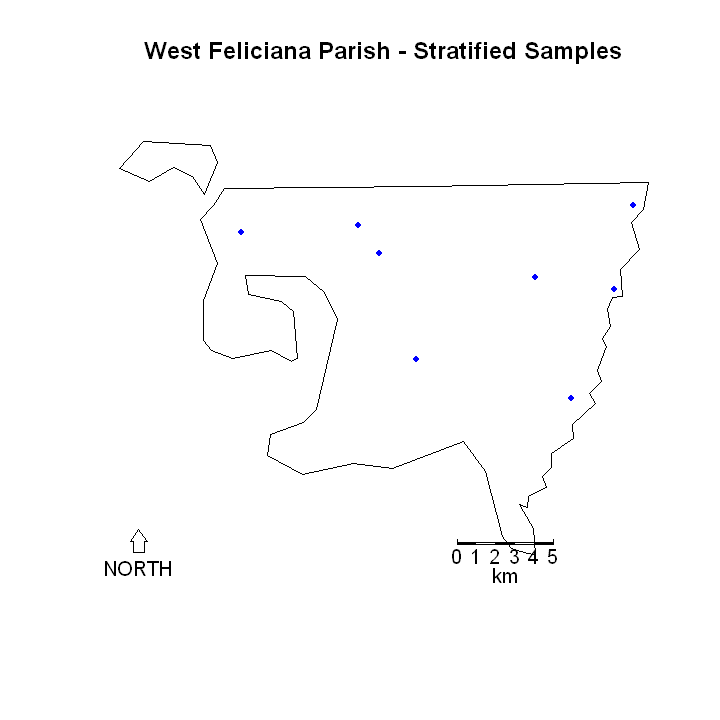

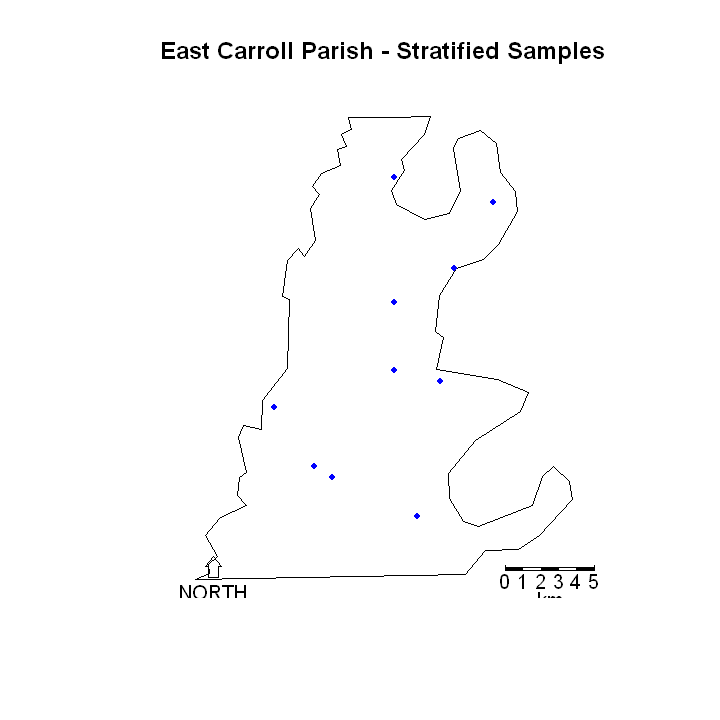

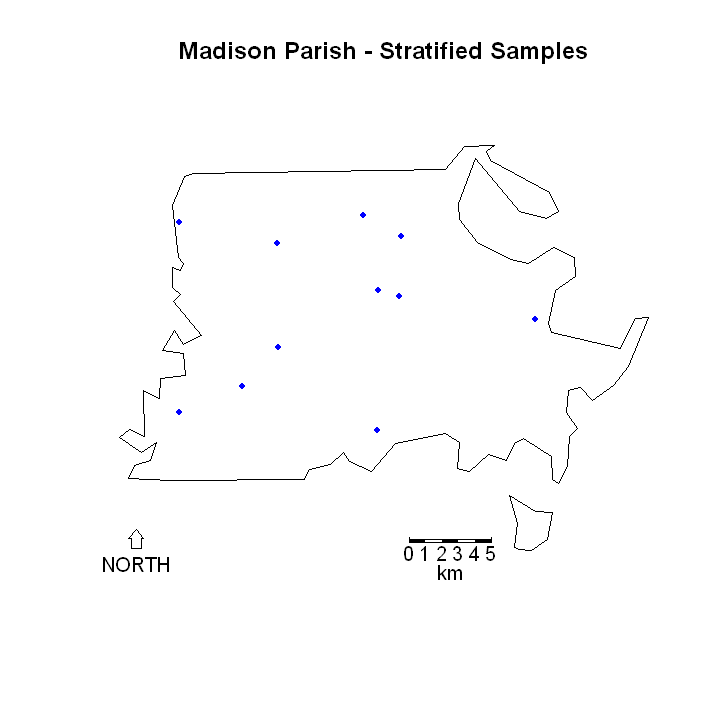

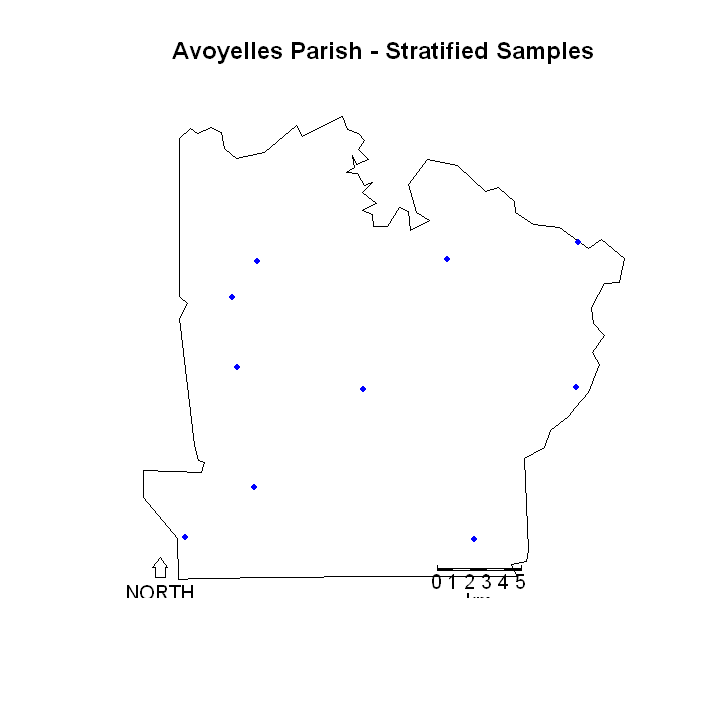

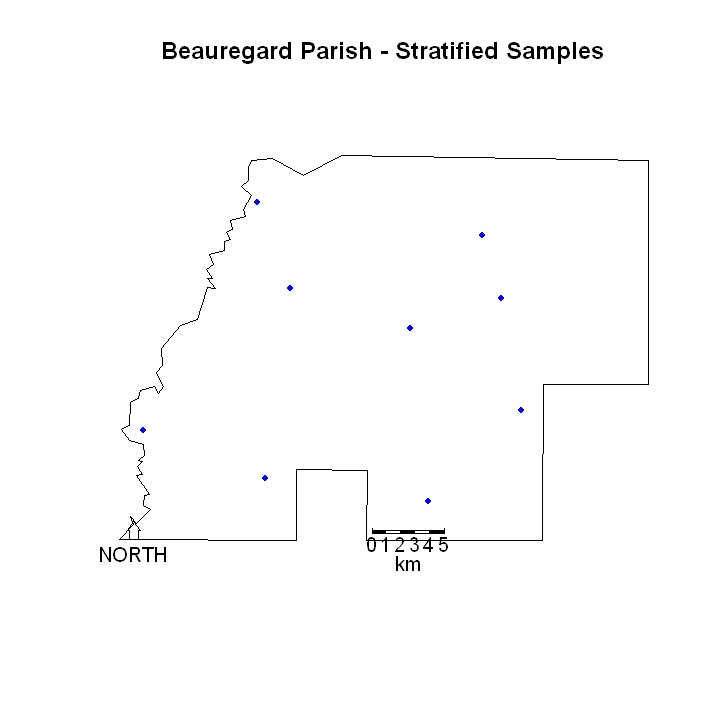

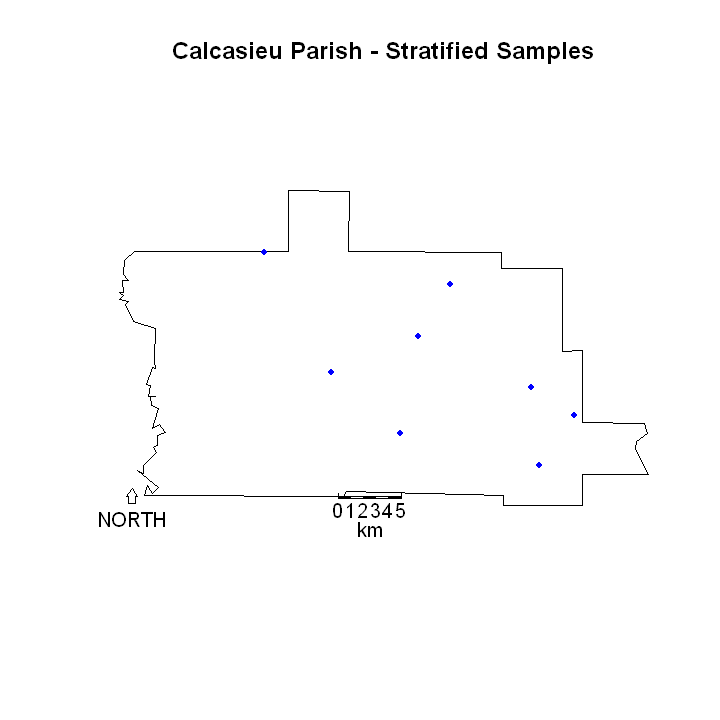

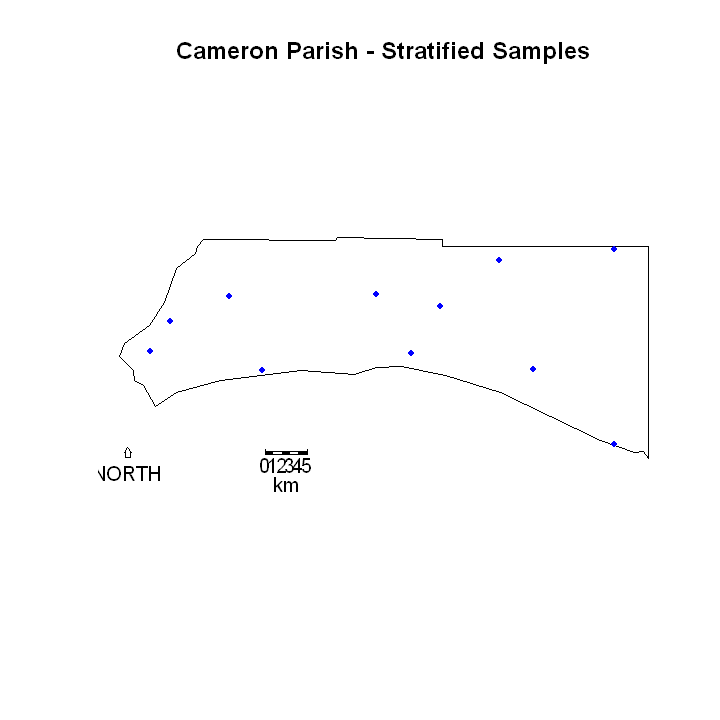

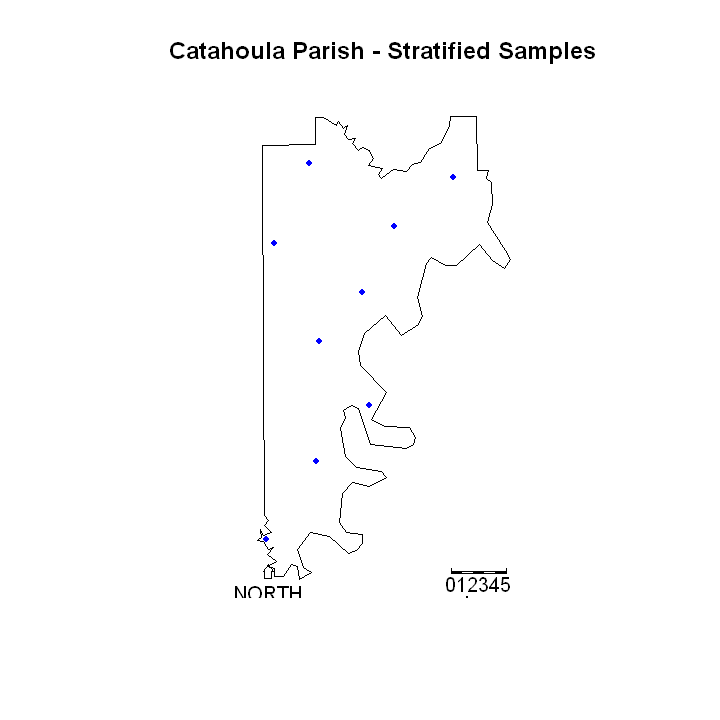

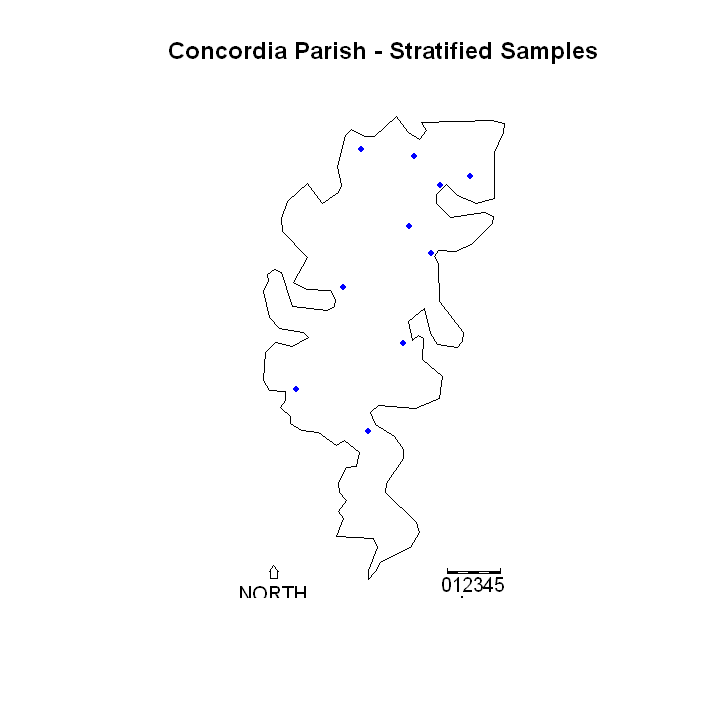

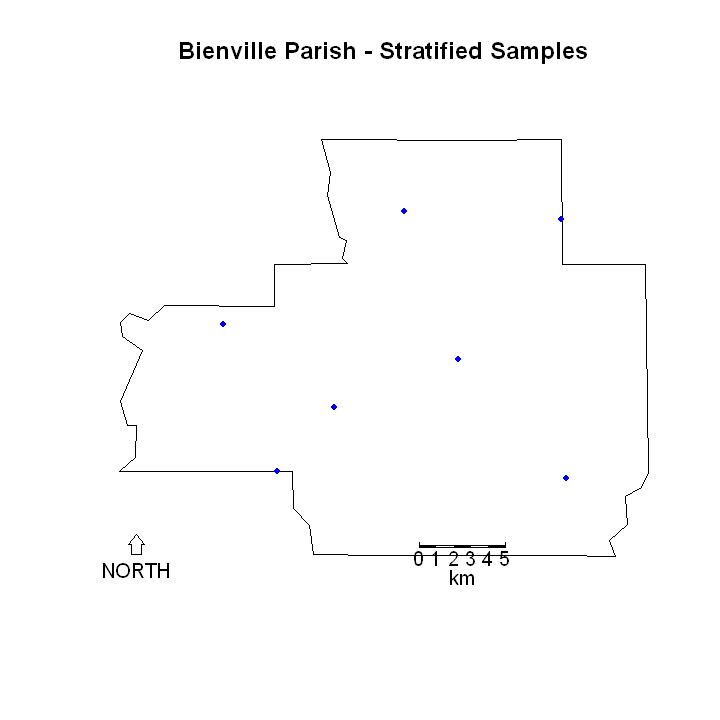

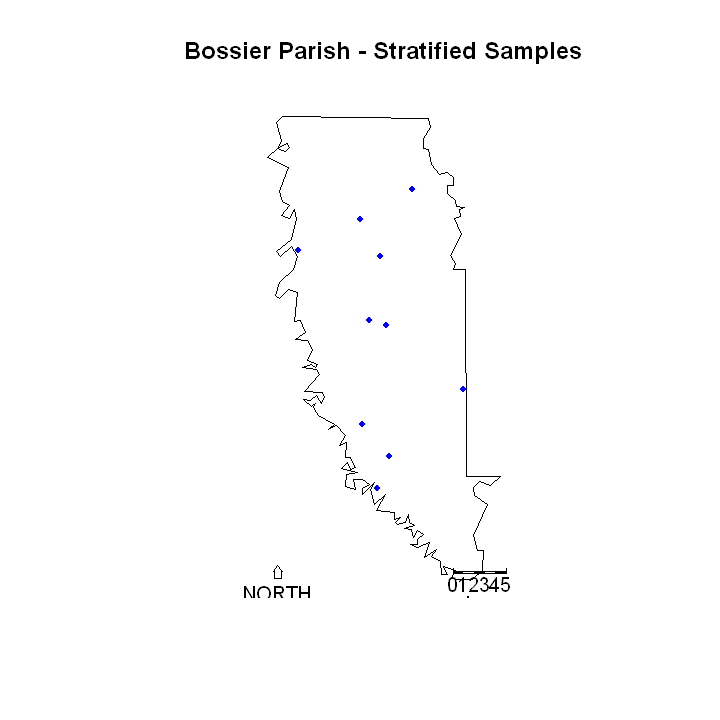

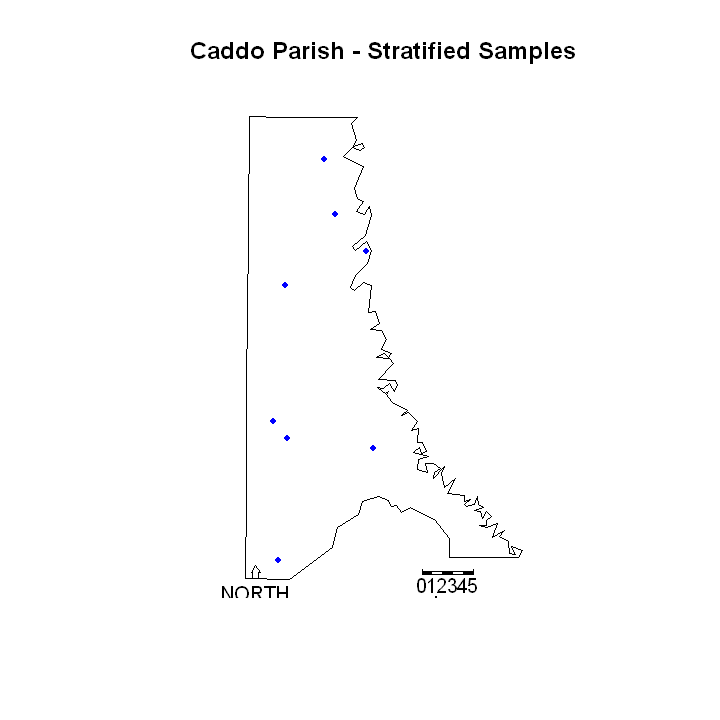

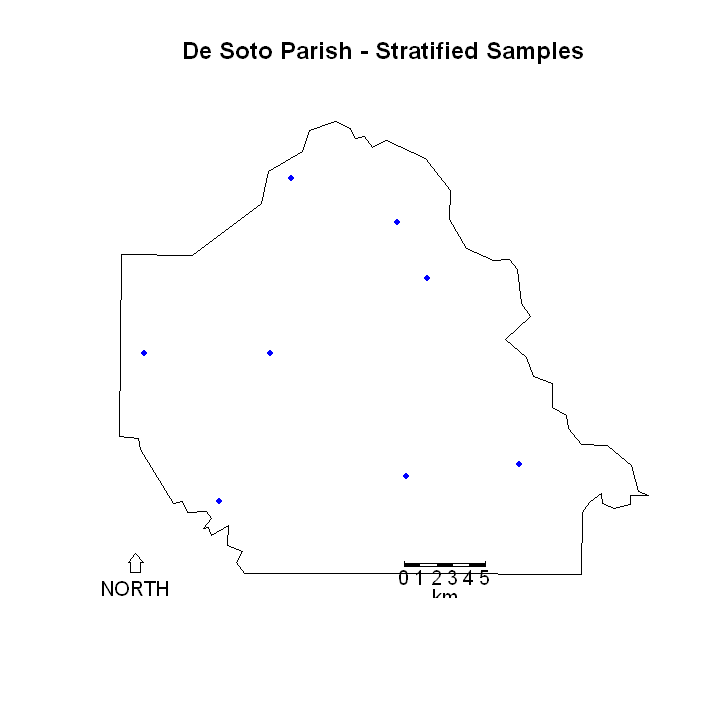

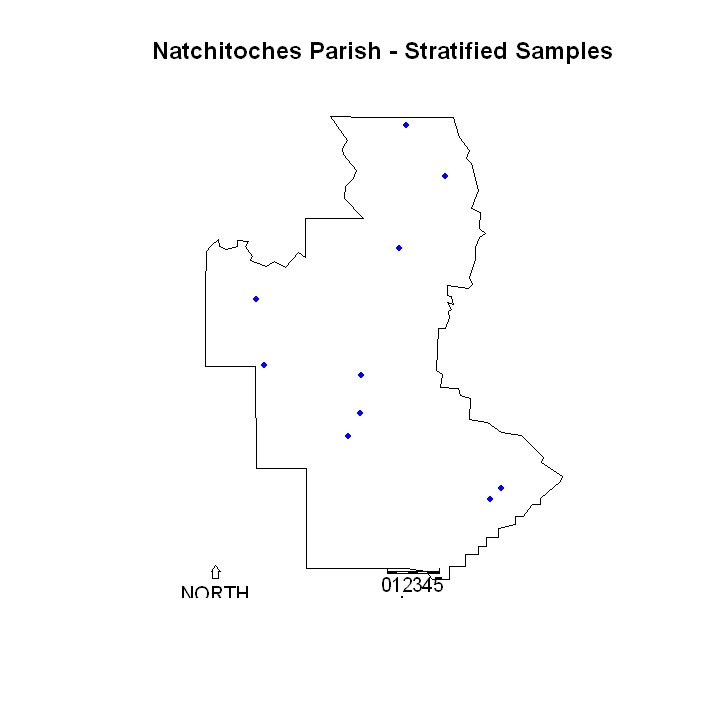

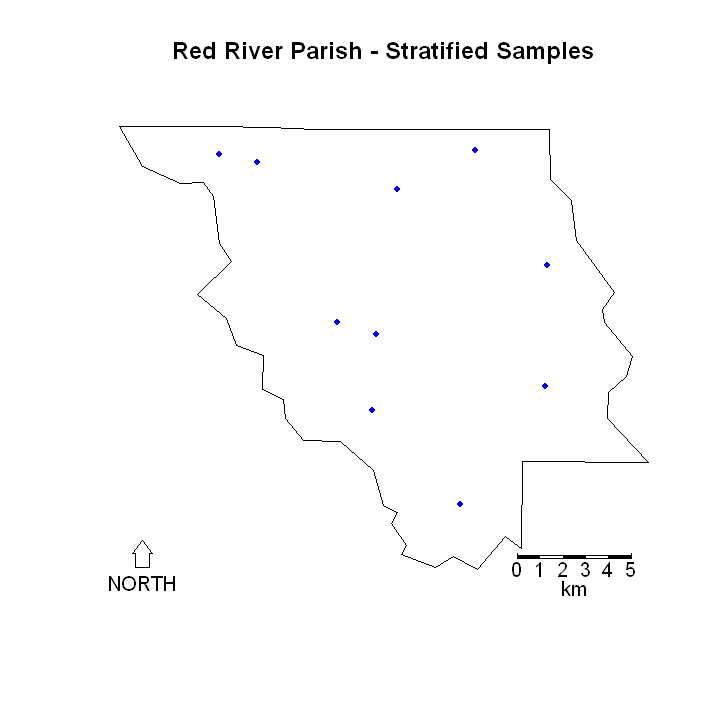

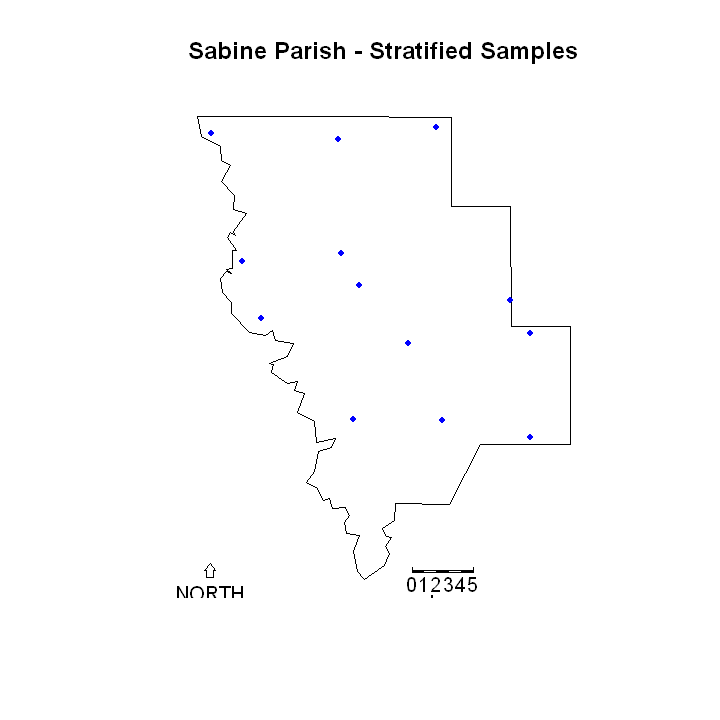

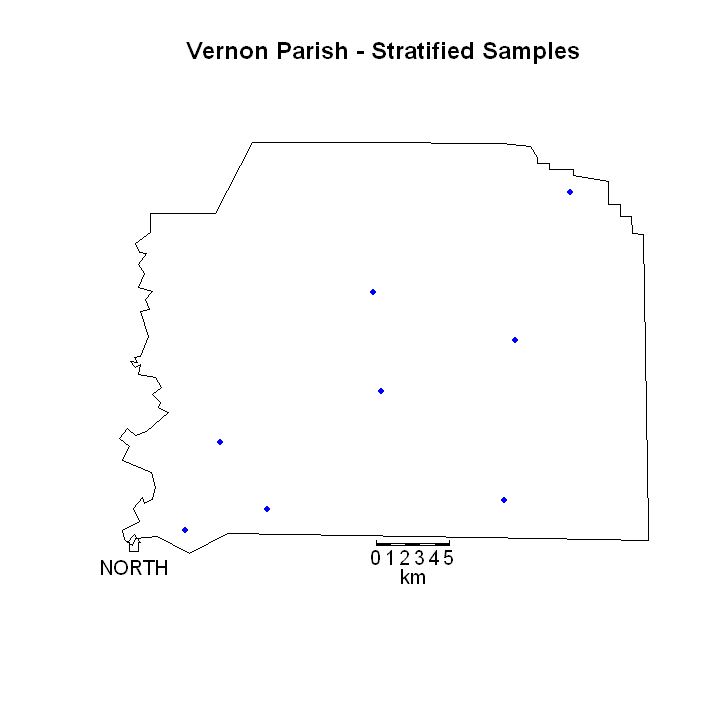

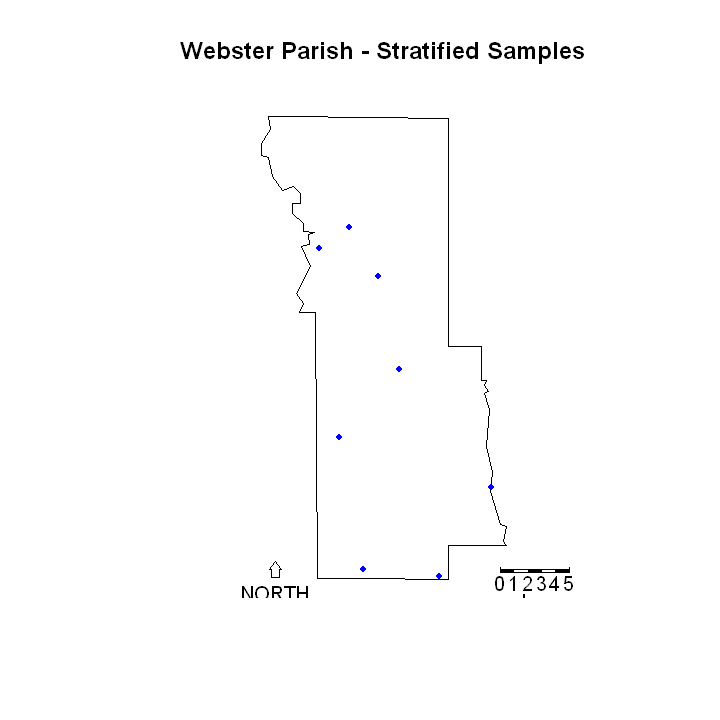

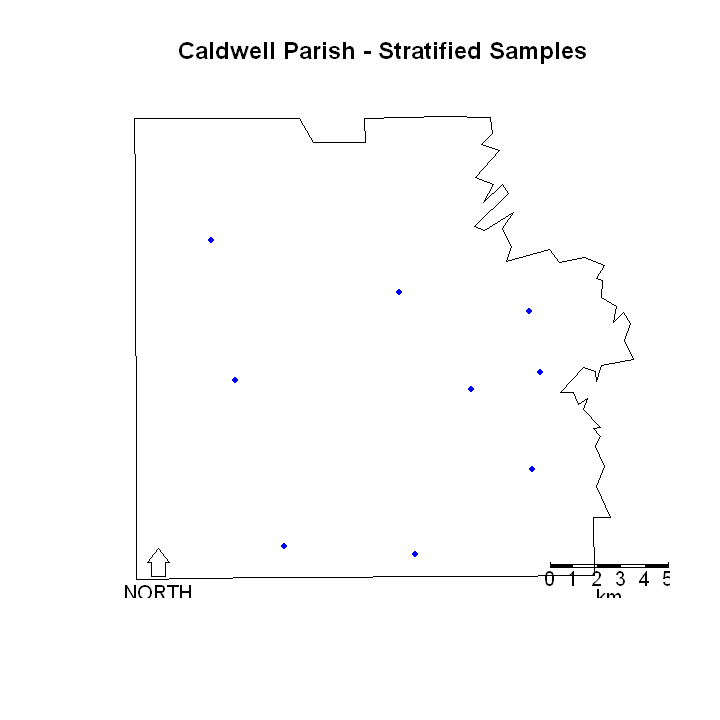

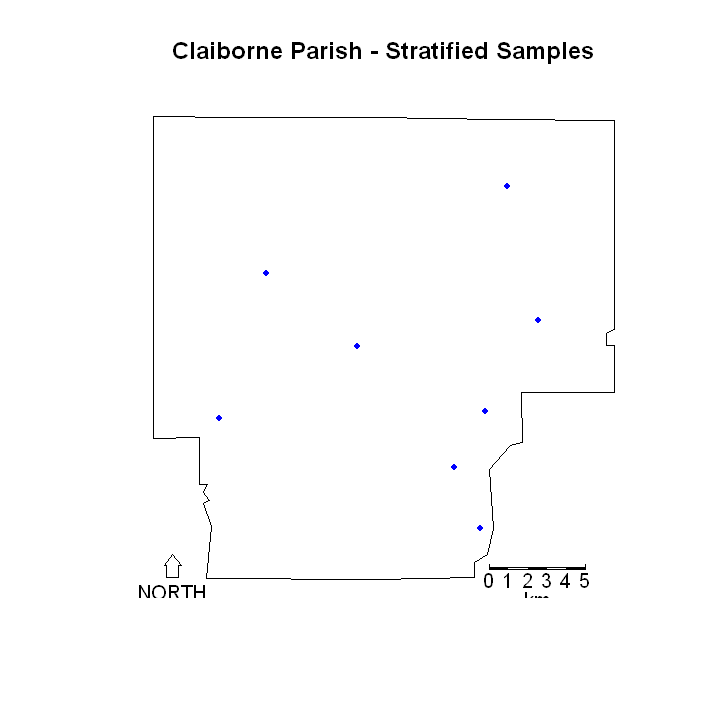

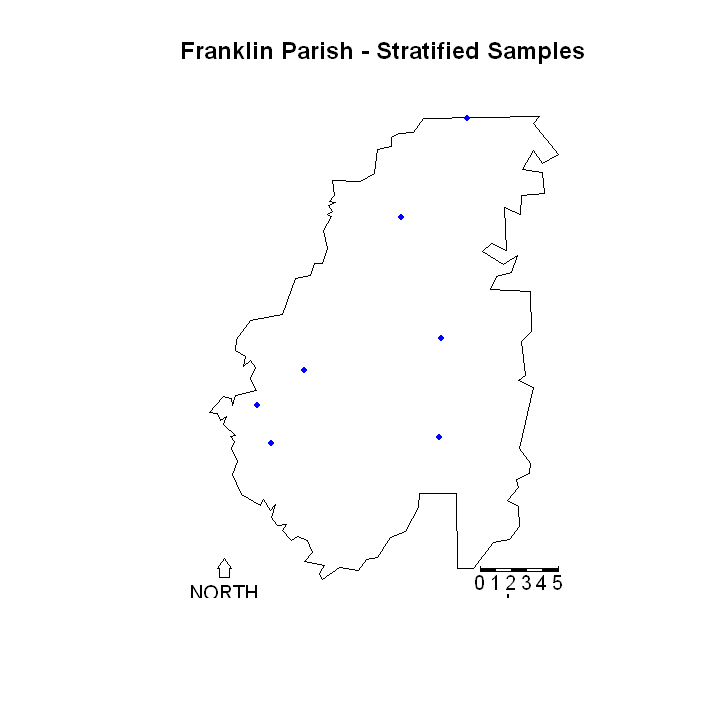

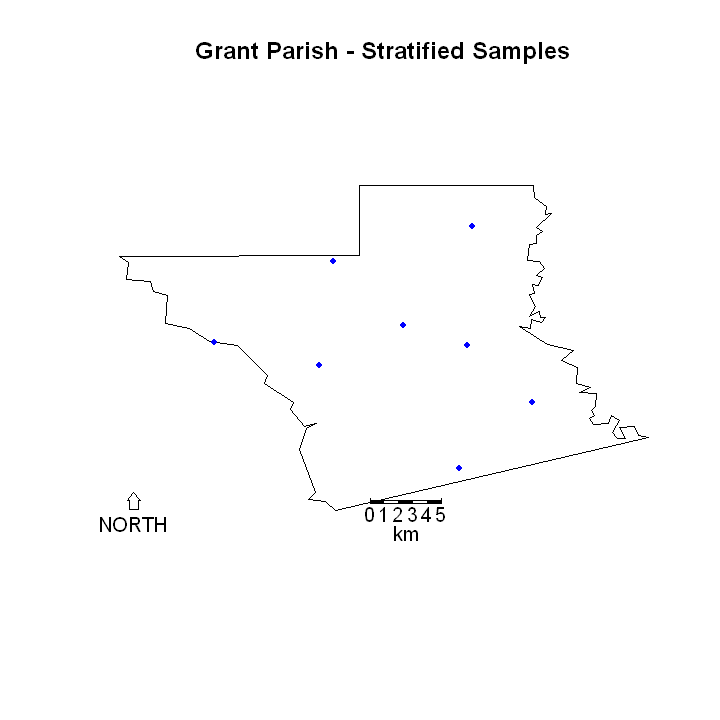

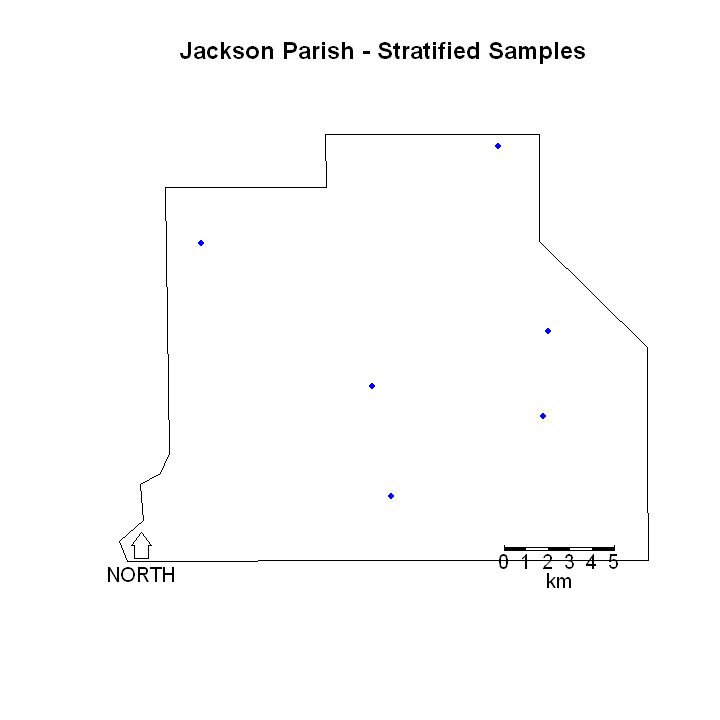

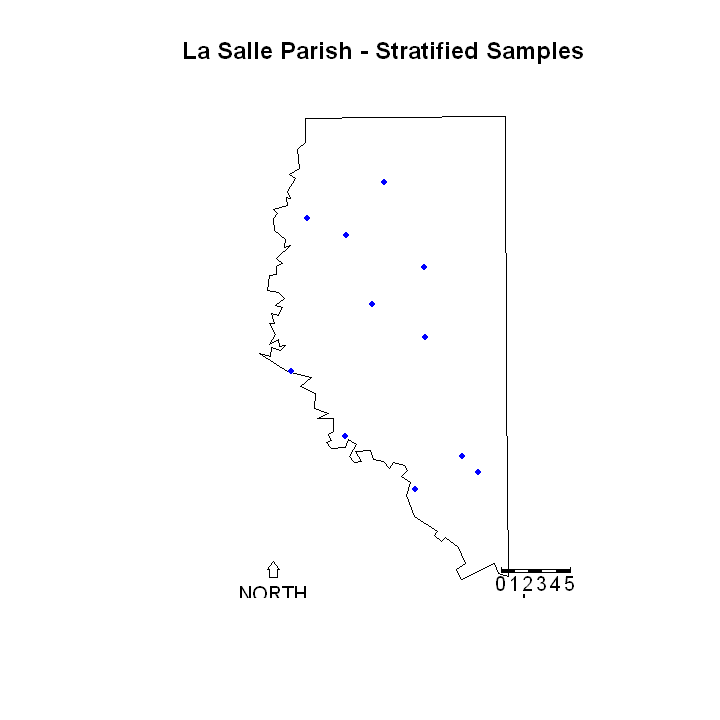

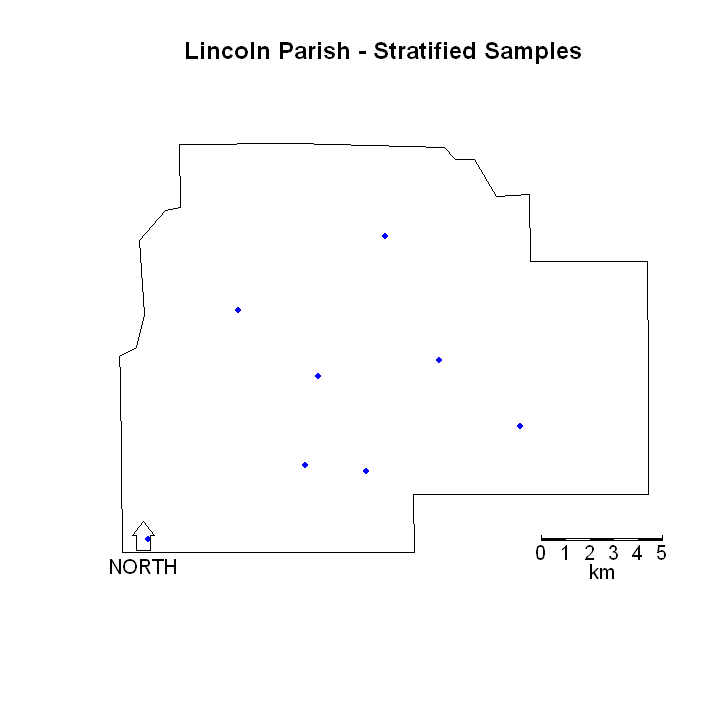

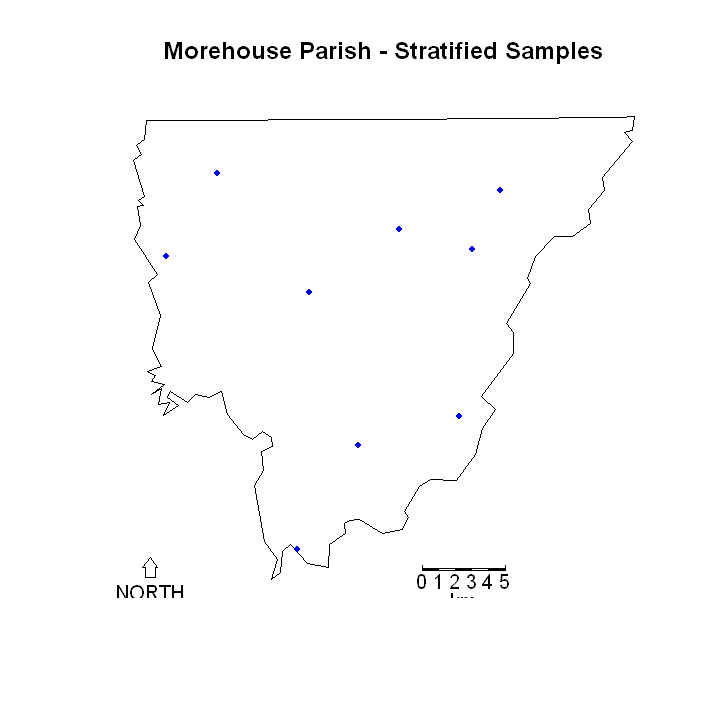

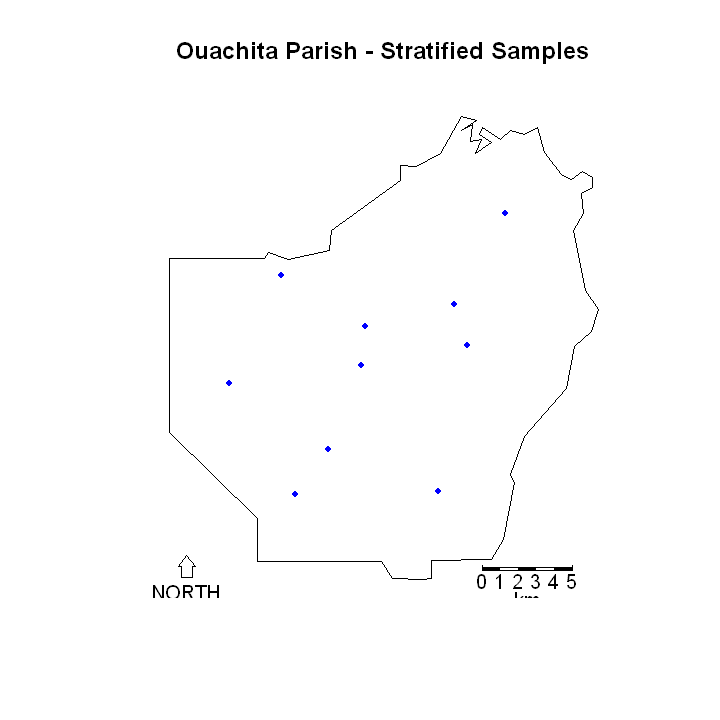

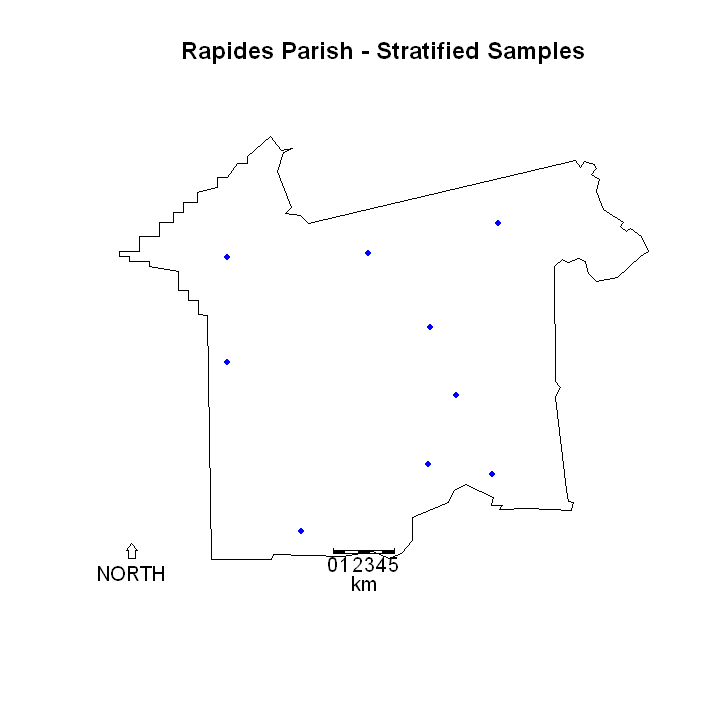

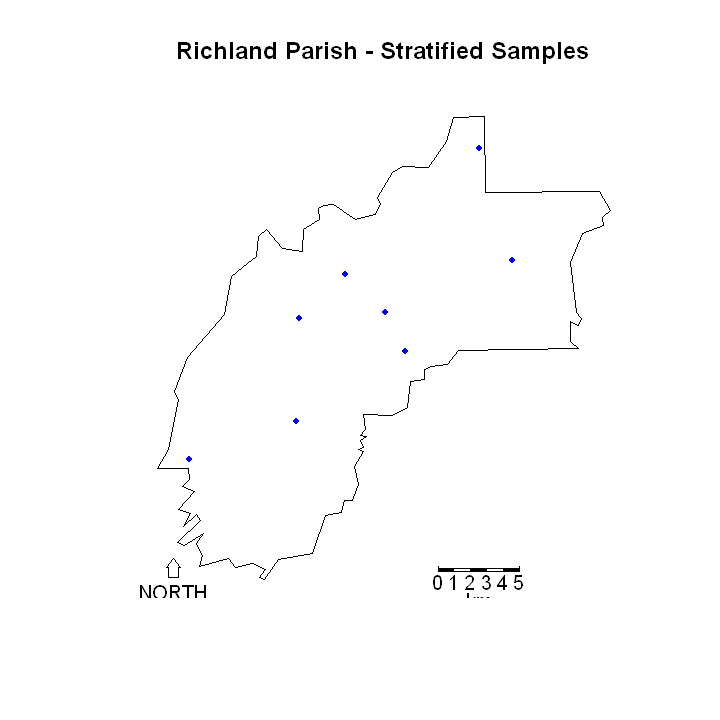

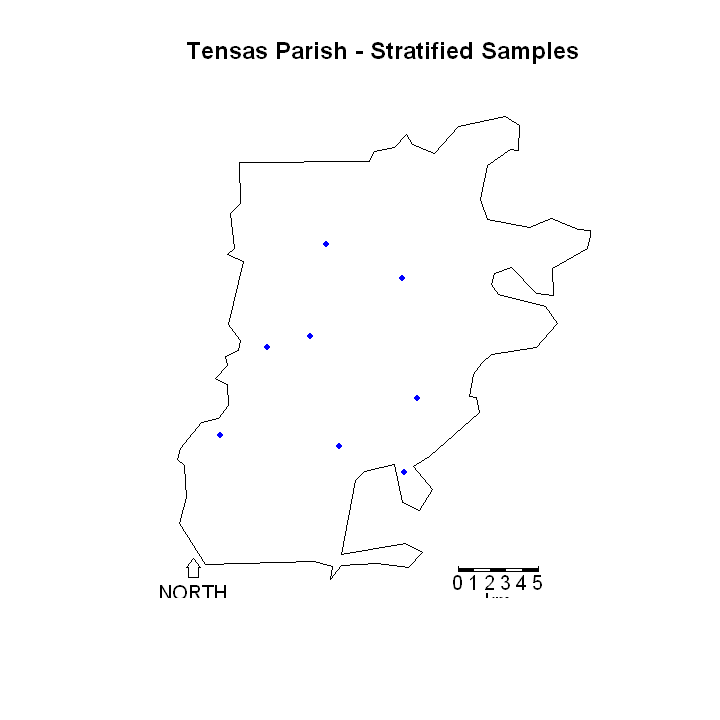

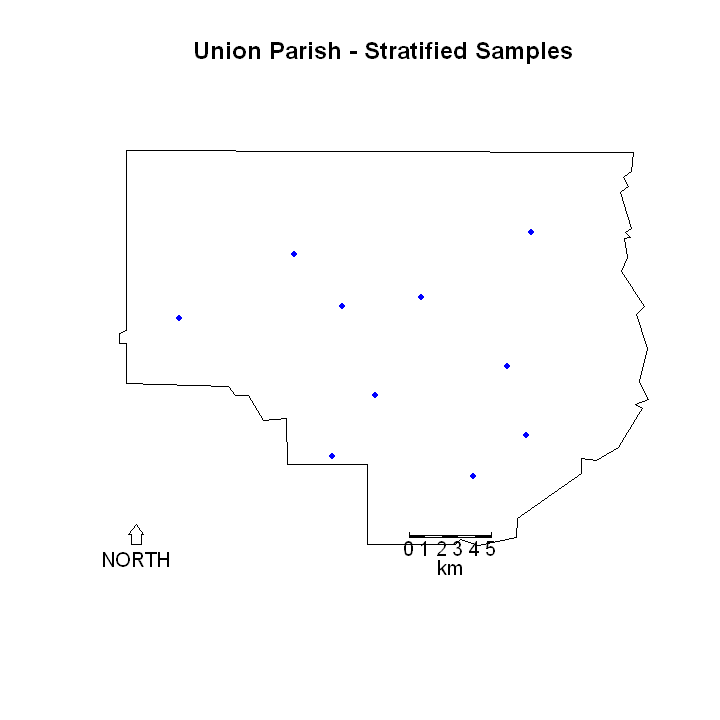

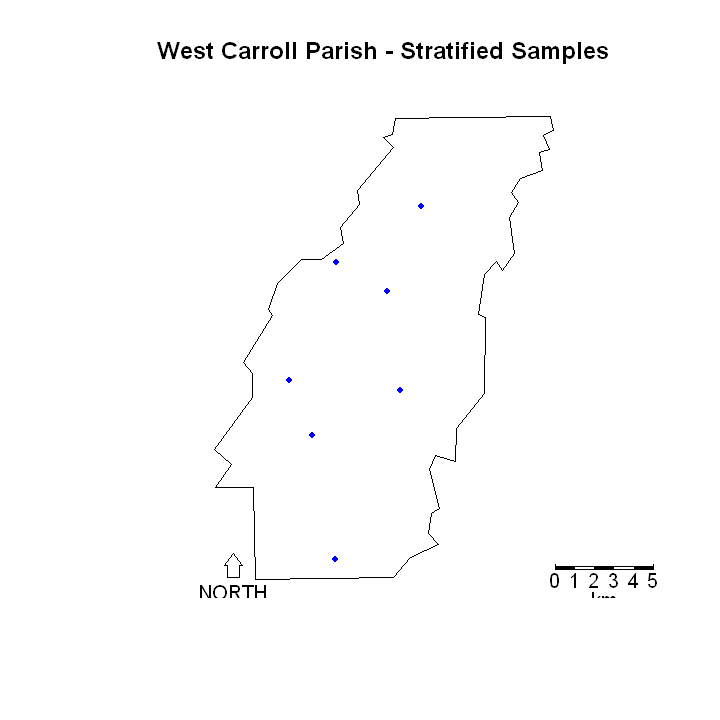

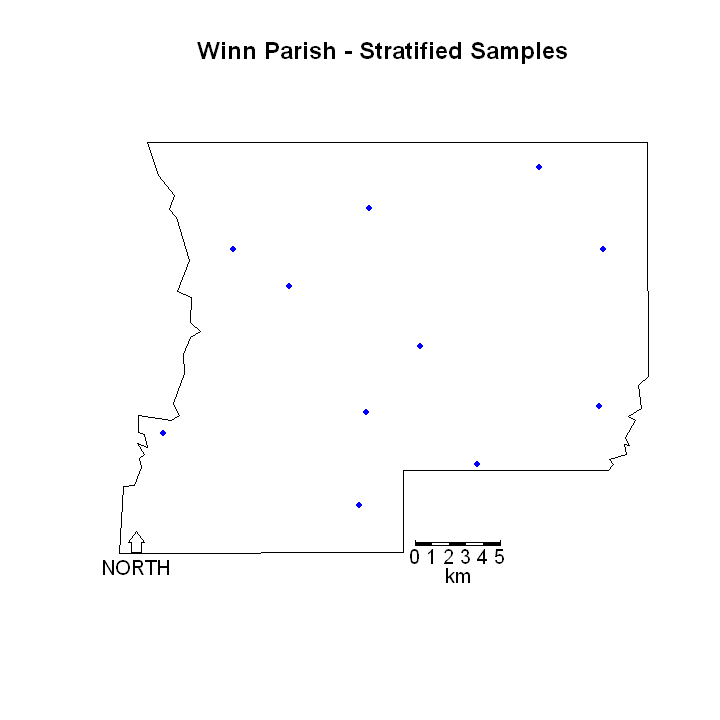

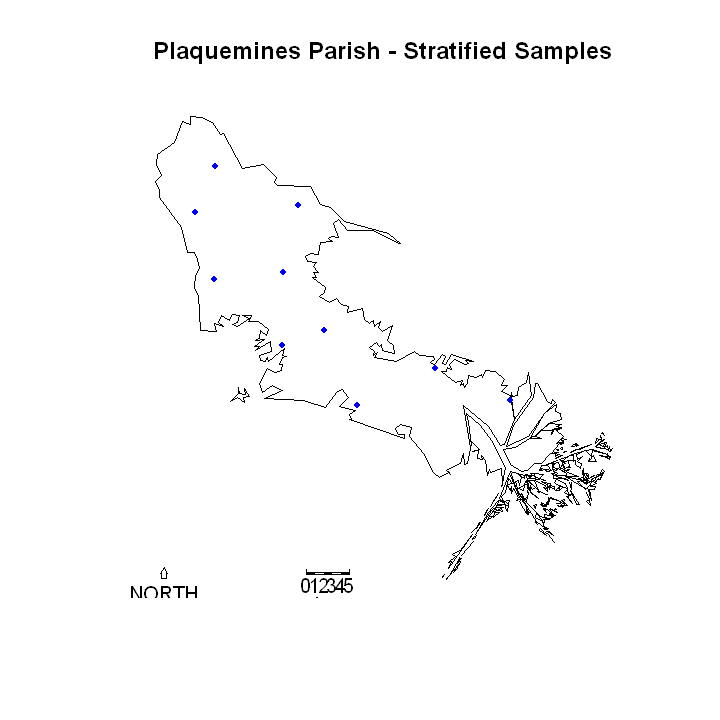

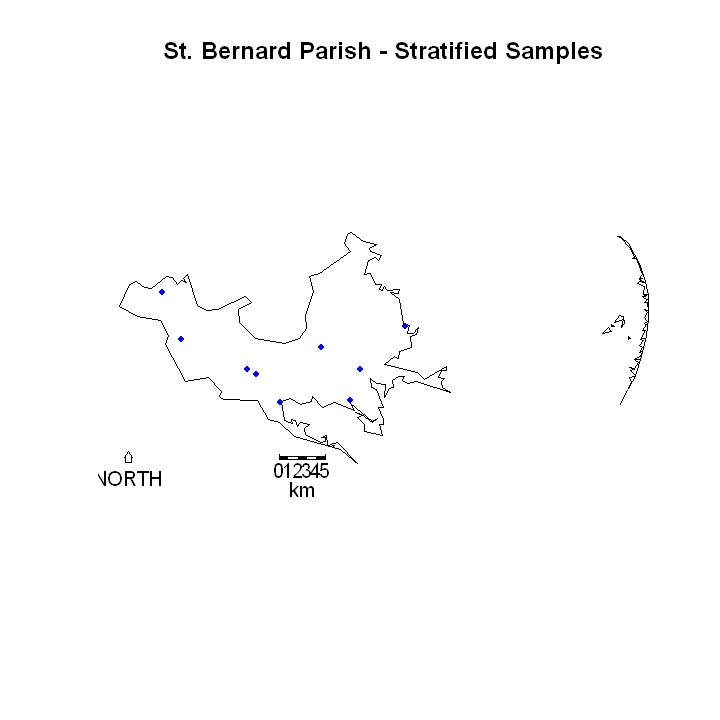

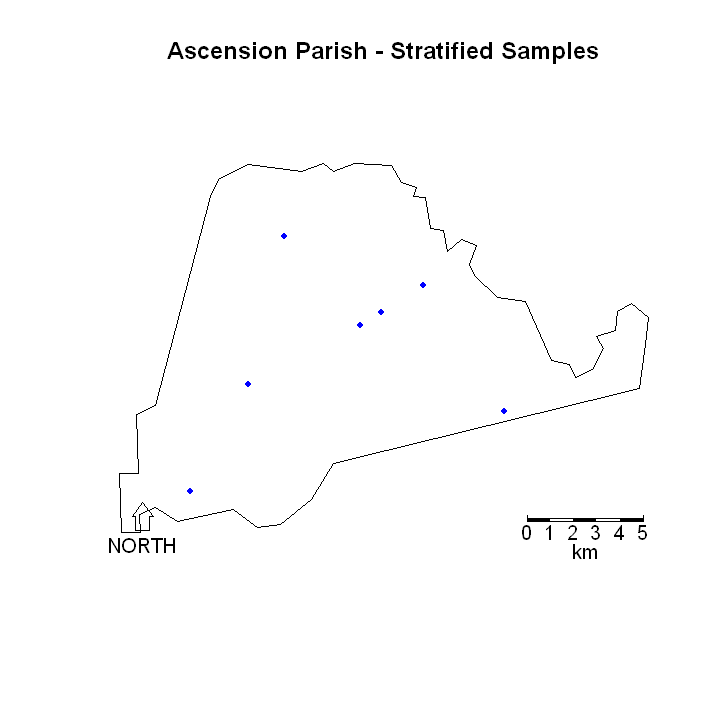

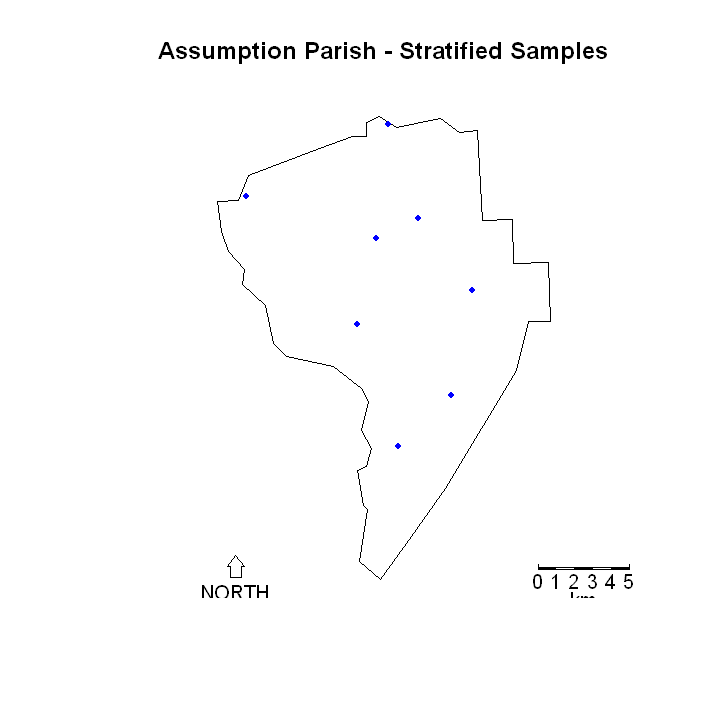

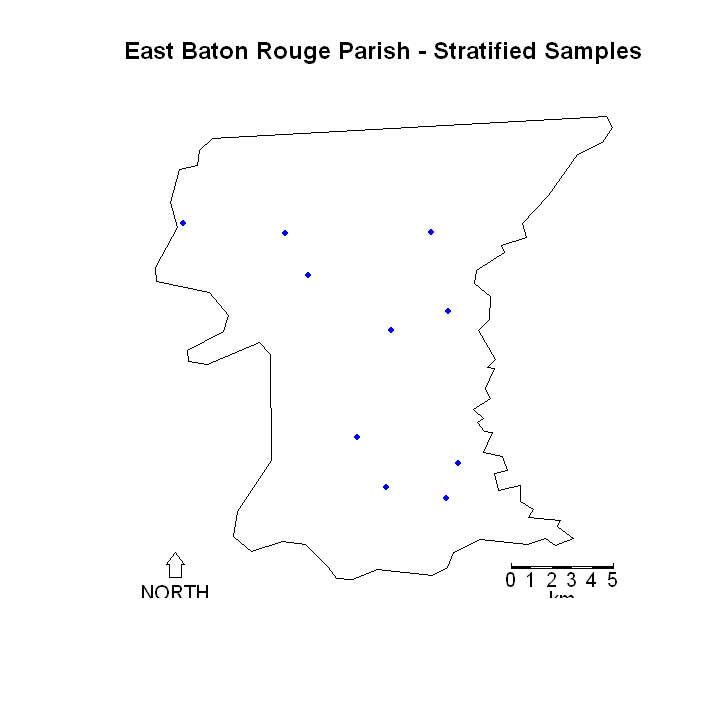

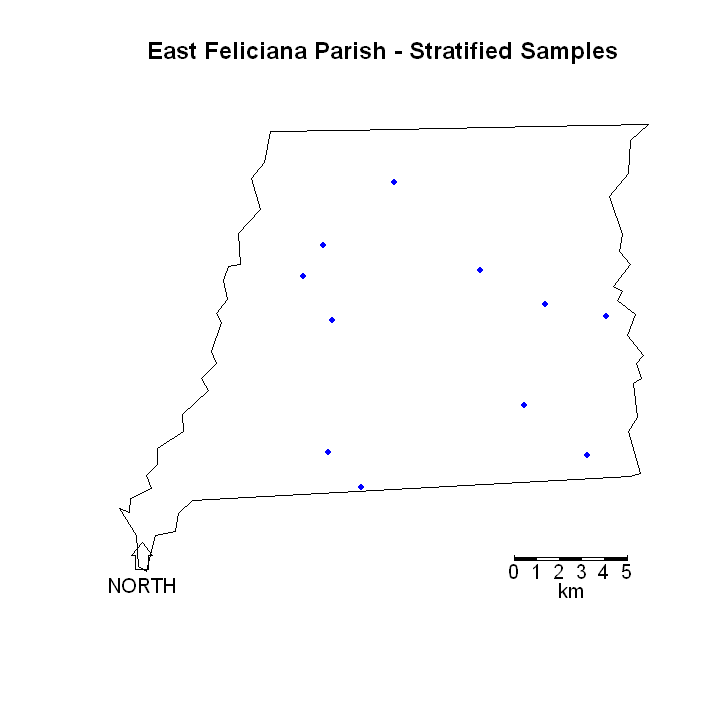

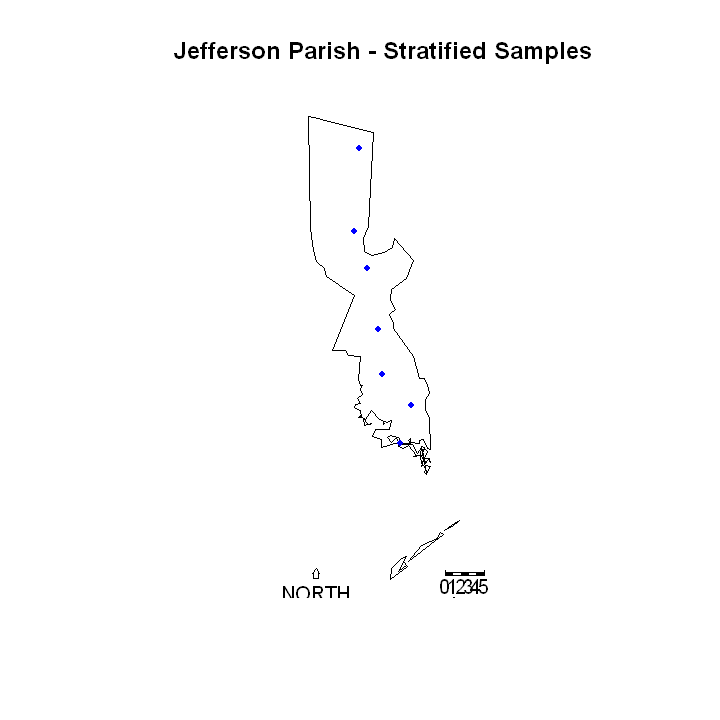

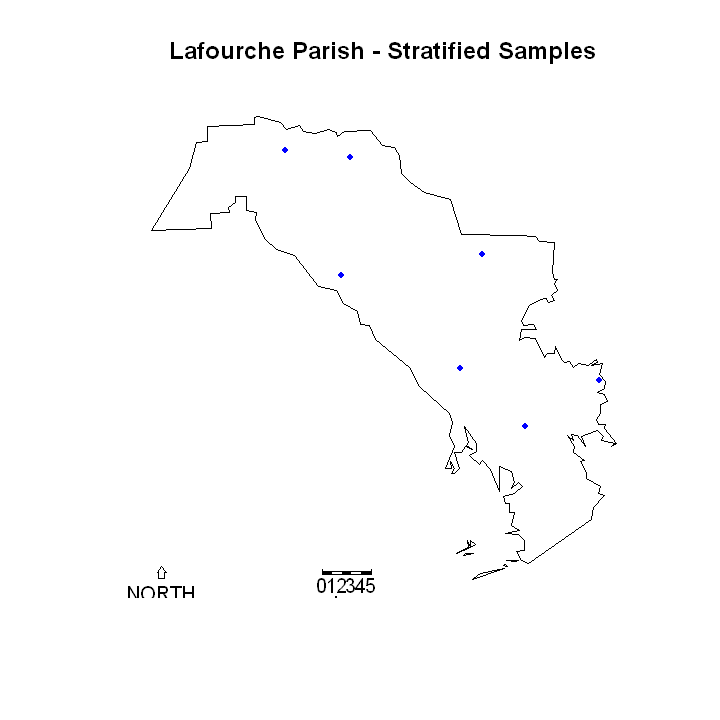

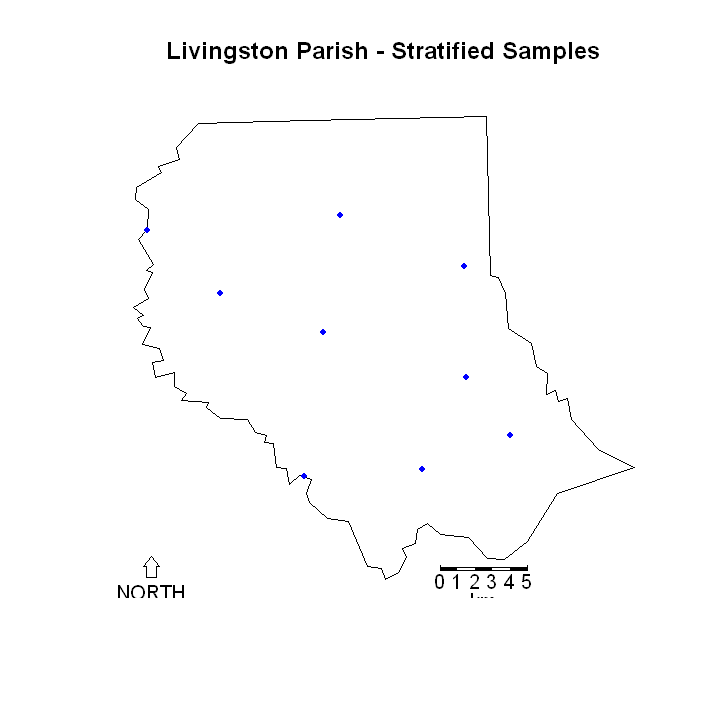

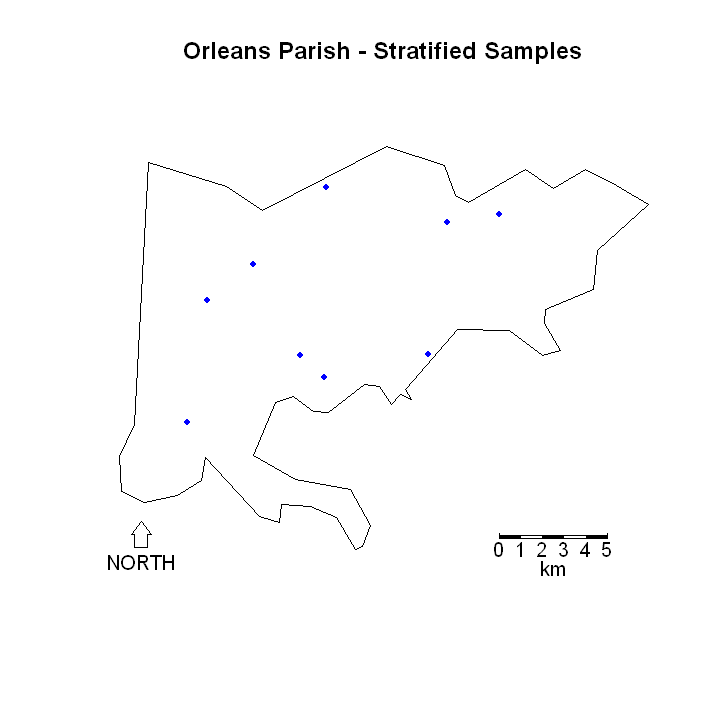

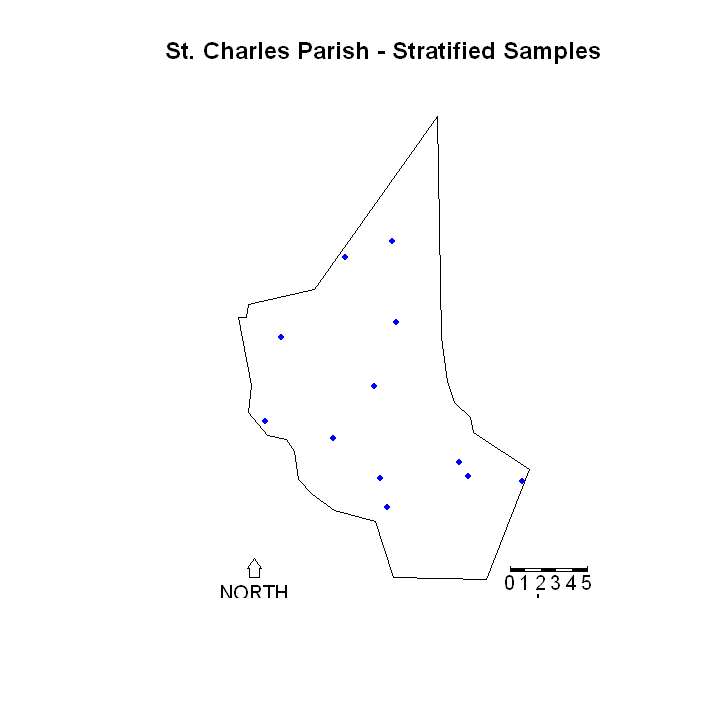

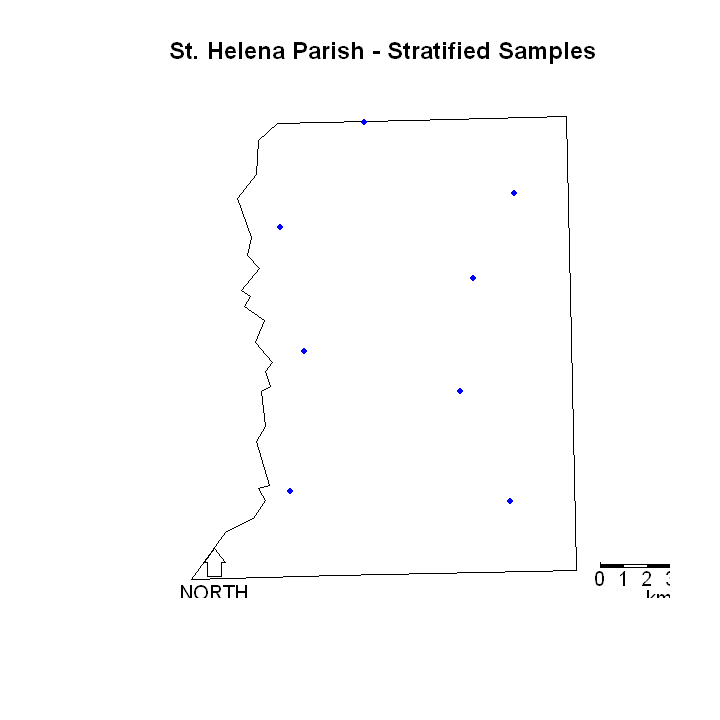

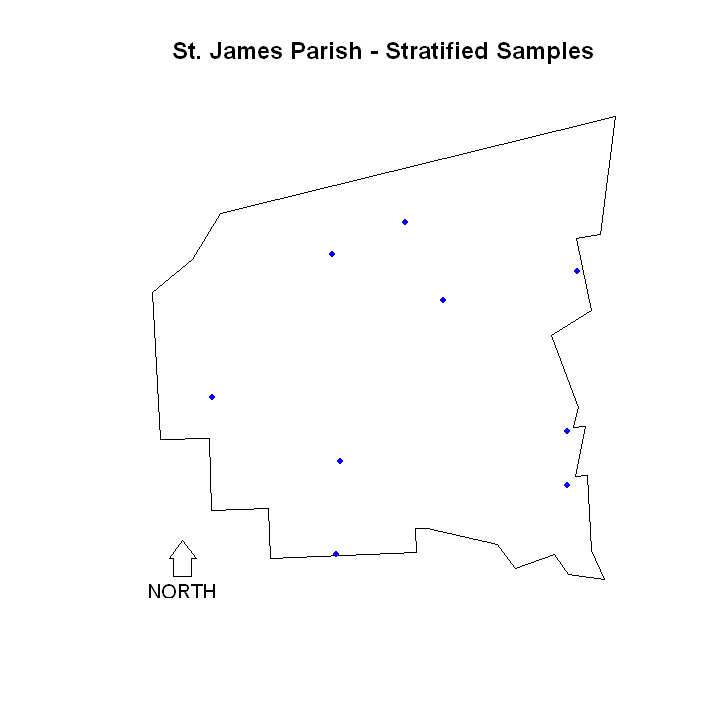

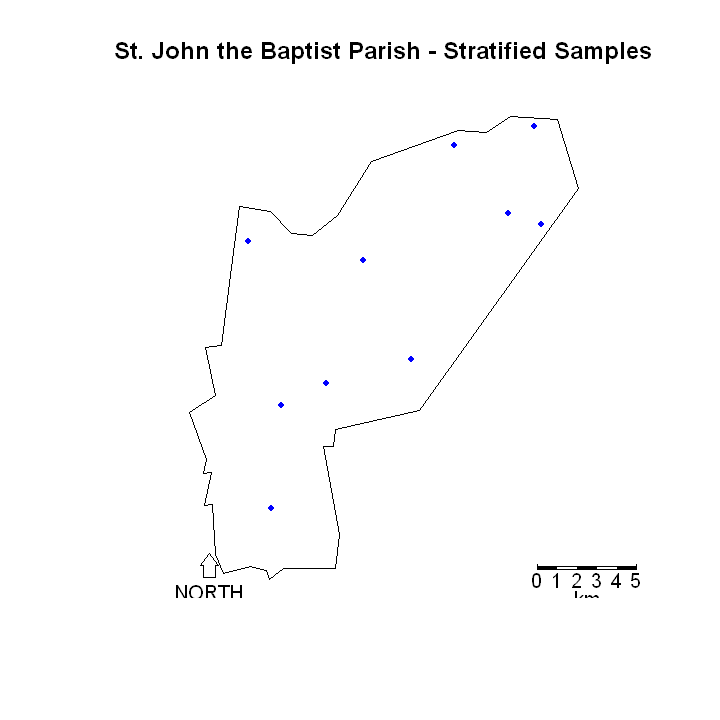

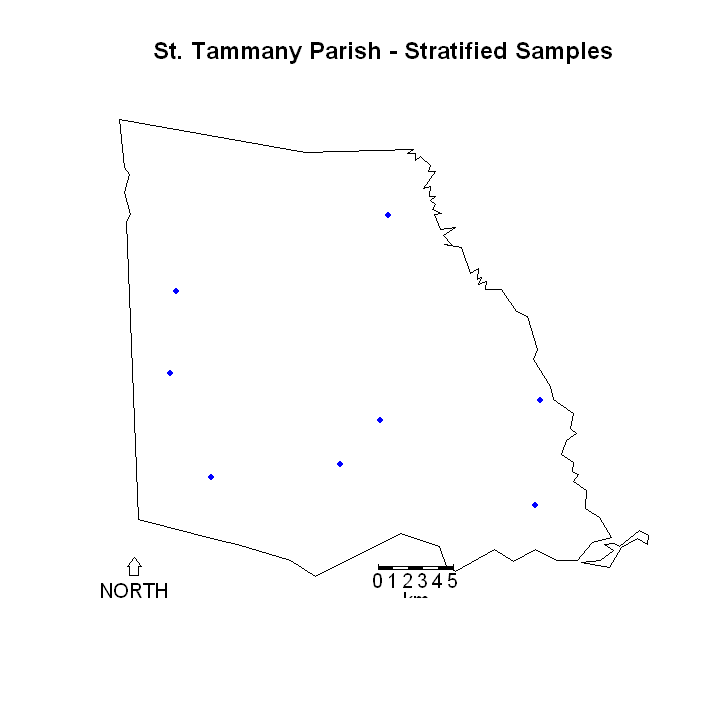

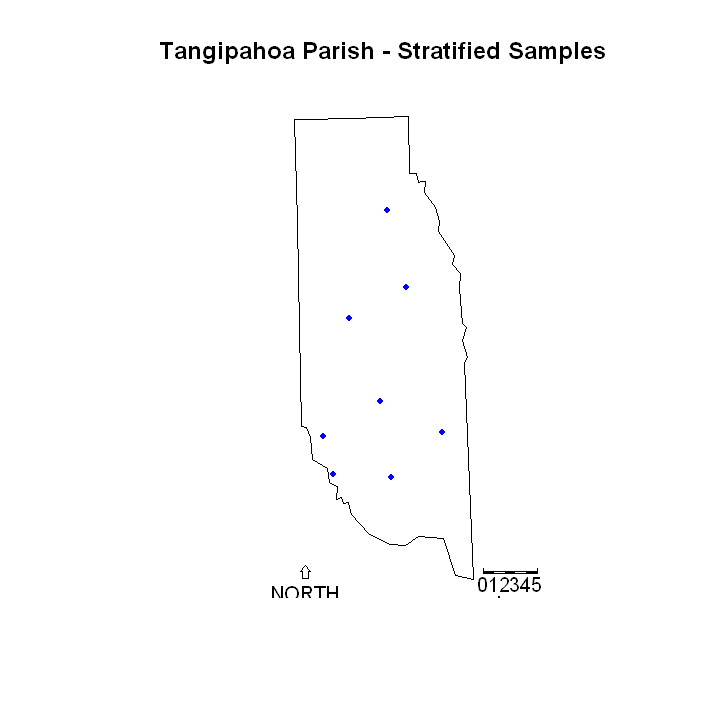

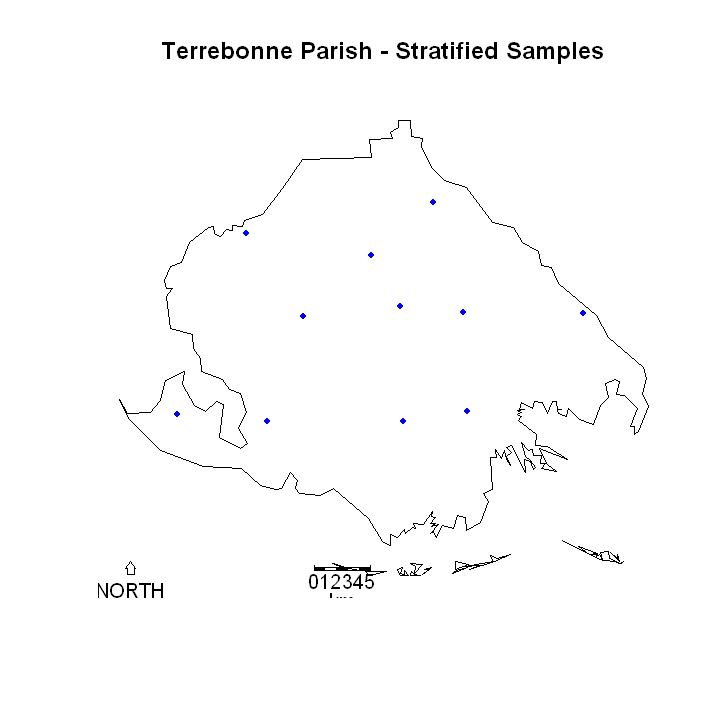

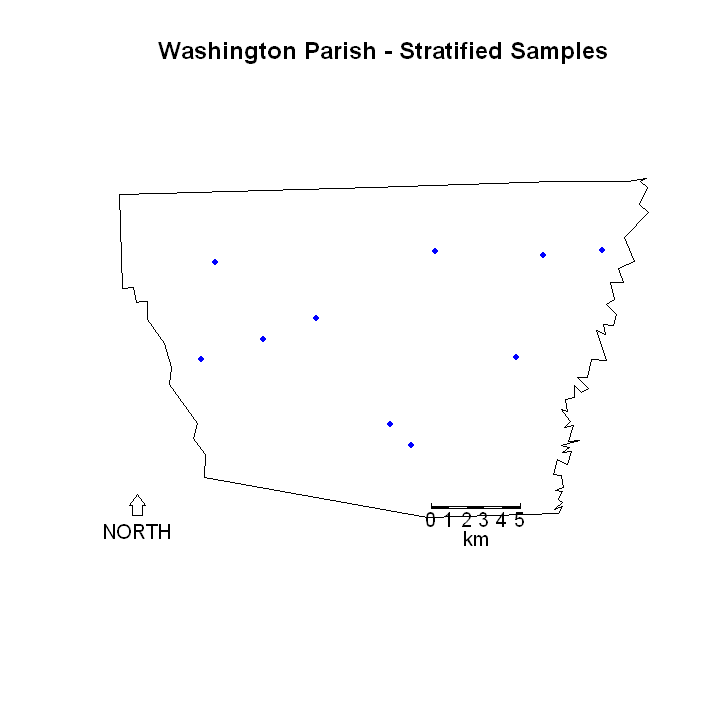

In [20]:
samp.counts <- list()
i <- 1

for (s in sampStrats10){
    strat <- s[[1]]
    samps <- s[[2]]
    samp.count <- s[[3]]
    
    samp.counts[i] <- samp.count
    
    title <- paste(strat$NAME, "- Stratified Samples")
    
    plot(strat, main = title)
    plot(samps, add = TRUE, pch = 20, col = "blue")
    
    bb <- bbox(strat)
    xb_min <- bb[1, 1]
    yb_min <- bb[2, 1]
    
    north.arrow(xb_min + 2000, yb_min + 200, len = 600, lab = "NORTH")

    map.scale(xb_min + 40000, yb_min + 1000, len = 10000, 
          units = "km", ndiv = 5)
    
    i <- i + 1
}

In [21]:
paste("Mean Number of Samples:", mean(as.numeric(samp.counts)))

[1] "Mean Number of Samples: 9.125"